In [92]:
#Load Data
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Finding Regular Expresion for data transformation
import re

# modelling
import statsmodels.api as sm
import statsmodels.formula.api as smf

# statistics 
import scipy.stats as stats

#For regularization
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [93]:
#Load the dataset
df=pd.read_csv('semarang_resto_dataset.csv')

In [94]:
#Check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   resto_id                        1311 non-null   int64  
 1   resto_name                      1311 non-null   object 
 2   resto_type                      1310 non-null   object 
 3   resto_rating                    1311 non-null   float64
 4   rating_numbers                  1311 non-null   int64  
 5   average_operation_hours         1311 non-null   float64
 6   resto_address                   1311 non-null   object 
 7   check_payment                   1311 non-null   float64
 8   cash_payment_only               1311 non-null   float64
 9   debit_card_payment              1311 non-null   float64
 10  credit_card_payment             1311 non-null   float64
 11  voucher_payment                 1311 non-null   float64
 12  phone_NFC_payment               13

In [95]:
#Check duplicated data
df[df.duplicated(subset=['resto_name', 'resto_address'], keep=False)].sort_values(by='resto_name').head(10)

resto_id                          resto_name  \
188       246                Assalamu SAMBEL JOSS   
622       848                Assalamu SAMBEL JOSS   
346       474                Ayam Bakar Primarasa   
913      1351                Ayam Bakar Primarasa   
416       567                Ayam Bakar Primarasa   
190       250                Ayam Geprek Mbak Nuk   
637       868                Ayam Geprek Mbak Nuk   
679       925  Ayam Geprek dan Aneka Nasi Bungkus   
205       276  Ayam Geprek dan Aneka Nasi Bungkus   
324       442     Ayam Goreng Spesial Lombok Idjo   

                        resto_type  resto_rating  rating_numbers  \
188                       Restoran           5.0              11   
622                       Restoran           5.0              11   
346          Restoran Masakan Ayam           4.4            2826   
913          Restoran Masakan Ayam           4.4            2826   
416          Restoran Masakan Ayam           4.4            2827   
190          Restoran Masakan Ayam           4.9              57   
637          Restoran Masakan Ayam           4.9              57   
679          Restoran Masakan Ayam           5.0               3   
205          Restoran Masakan Ayam           5.0               3   
324  Restoran takeaway ayam goreng           4.4            5421   

     average_operation_hours  \
188                11.000000   
622                11.000000   
346                15.000000   
913                15.000000   
416                15.000000   
190                15.000000   
637                15.000000   
679                 7.857143   
205                 7.857143   
324                11.500000   

                                         resto_address  check_payment  \
188  Jl. Prof. Dr. Hamka No.6, Ngaliyan, Kec. Ngali...            0.0   
622  Jl. Prof. Dr. Hamka No.6, Ngaliyan, Kec. Ngali...            0.0   
346  Jl. Gajahmada No.99D, Miroto, Kec. Semarang Te...            0.0   
913  Jl. Gajahmada No.99D, Miroto, Kec. Semarang Te...            0.0   
416  Jl. Gajahmada No.99D, Miroto, Kec. Semarang Te...            0.0   
190  285V+787, Jl. Kliwonan Baru, Tambakaji, Kec. N...            0.0   
637  285V+787, Jl. Kliwonan Baru, Tambakaji, Kec. N...            0.0   
679  Samping PT, Aneka Gas Industri Jl. Tambak Aji ...            0.0   
205  Samping PT, Aneka Gas Industri Jl. Tambak Aji ...            0.0   
324  Jl. Gajahmada No.158, Brumbungan, Kec. Semaran...            0.0   

     cash_payment_only  debit_card_payment  ...  menu_for_childern  \
188                1.0                 0.0  ...                0.0   
622                1.0                 0.0  ...                0.0   
346                0.0                 1.0  ...                1.0   
913                0.0                 1.0  ...                1.0   
416                0.0                 1.0  ...                1.0   
190                0.0                 0.0  ...                1.0   
637                0.0                 0.0  ...                1.0   
679                0.0                 0.0  ...                0.0   
205                0.0                 0.0  ...                0.0   
324                0.0                 1.0  ...                1.0   

     healty_menu  vegetarian_menu  sell_wine  contactless_deliverys_services  \
188          0.0              0.0        0.0                             0.0   
622          0.0              0.0        0.0                             0.0   
346          0.0              0.0        0.0                             1.0   
913          0.0              0.0        0.0                             1.0   
416          0.0              0.0        0.0                             1.0   
190          0.0              0.0        0.0                             0.0   
637          0.0              0.0        0.0                             0.0   
679          0.0              0.0        0.0                             0.0   
205          0.0        

There are several duplicate resto in this data. So We need to clean this data

In [96]:
#Drop duplicate data
df_new=df.drop_duplicates(subset=['resto_name', 'resto_address'])

In [97]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1179 entries, 0 to 1310
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   resto_id                        1179 non-null   int64  
 1   resto_name                      1179 non-null   object 
 2   resto_type                      1178 non-null   object 
 3   resto_rating                    1179 non-null   float64
 4   rating_numbers                  1179 non-null   int64  
 5   average_operation_hours         1179 non-null   float64
 6   resto_address                   1179 non-null   object 
 7   check_payment                   1179 non-null   float64
 8   cash_payment_only               1179 non-null   float64
 9   debit_card_payment              1179 non-null   float64
 10  credit_card_payment             1179 non-null   float64
 11  voucher_payment                 1179 non-null   float64
 12  phone_NFC_payment               11

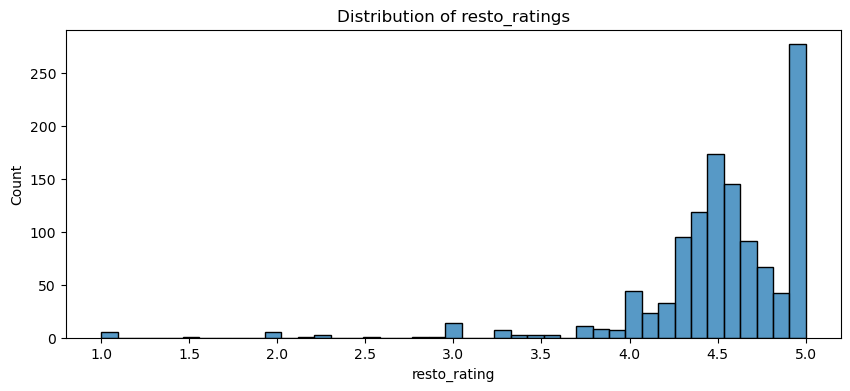

In [98]:
#Check Distribution of Rating
fig = plt.figure(figsize=(10, 4))  # Specify width and height in inches

# Create a subplot within the figure
ax = fig.add_subplot(1, 1, 1)

sns.histplot(data=df_new, x='resto_rating')
plt.title('Distribution of resto_ratings')
plt.show()

There are relatively high number of rating 5 because there are several resto that have low number of review but have rating 5

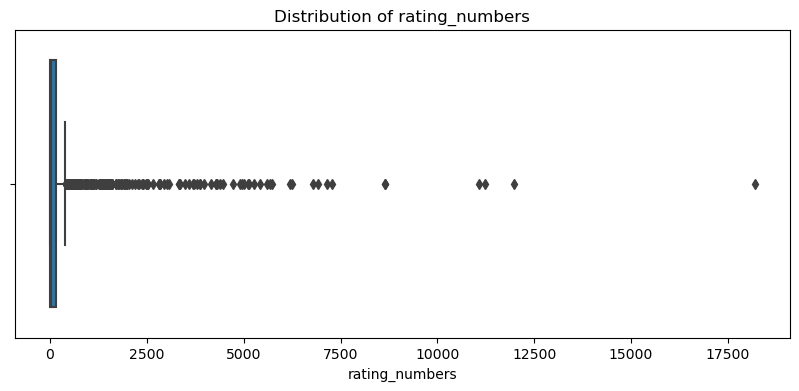

In [99]:
#Check distribution of rating_numbers
fig = plt.figure(figsize=(10, 4))  # Specify width and height in inches

# Create a subplot within the figure
ax = fig.add_subplot(1, 1, 1)

sns.boxplot(data=df_new, x='rating_numbers')
plt.title('Distribution of rating_numbers')
plt.show()

There are outliers in numbers of reviews. We need to clean this data,

In [100]:
#Split data to check distribution of resto_rating
low_rating=df_new[df_new.rating_numbers < 30]
big_rating=df_new[df_new.rating_numbers >= 30]

rating resto is average rating of ratings for customer/ reviewers in google maps. For make sure that the rating resto is representative, we try to set threshold of the rating numbers. When the sample size is relatively large (above 30), the data are more likely to exhibit a bell-shaped or approximately normal distribution. This is due to the central limit theorem, which states that the sampling distribution of a sample mean will become approximately normal as the sample size increases, regardless of the shape of the population distribution. So we set the threshold to 30.

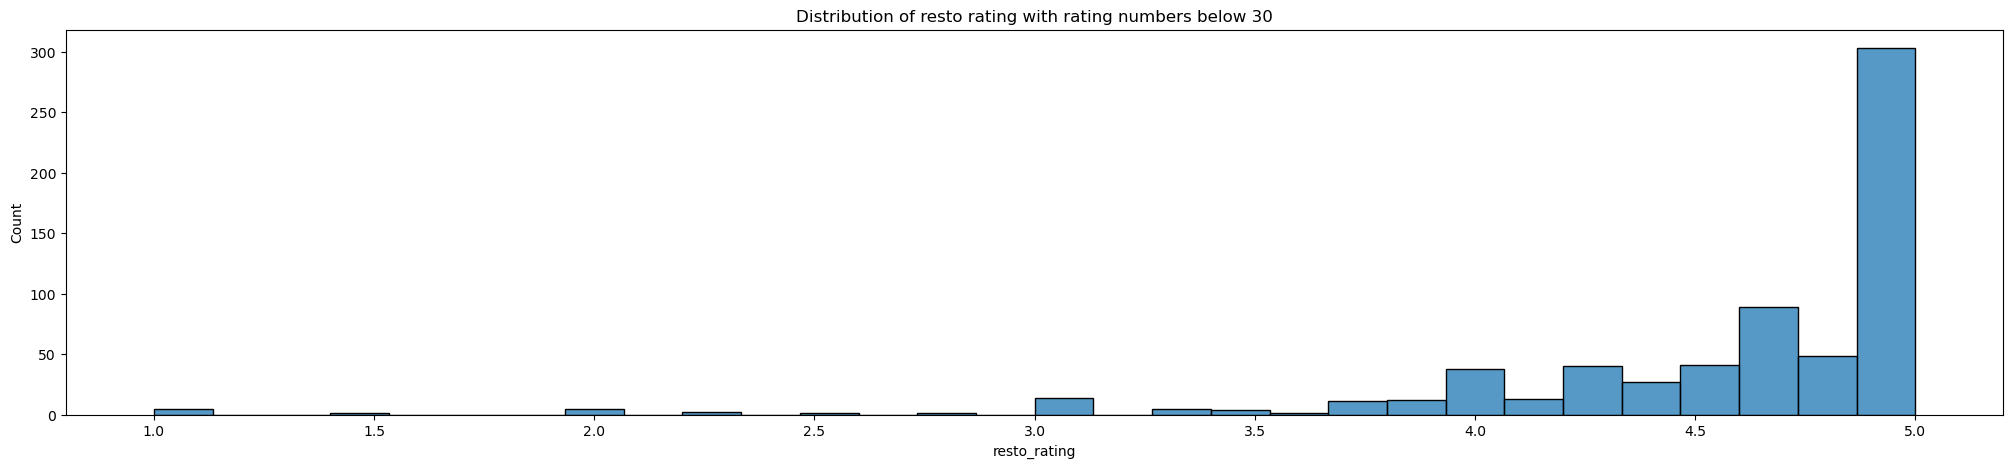

In [101]:
fig = plt.figure(figsize=(25, 5))  # Specify width and height in inches

# Create a subplot within the figure
ax = fig.add_subplot(1, 1, 1)

sns.histplot(data=low_rating, x='resto_rating')
plt.title('Distribution of resto rating with rating numbers below 30')
plt.show()

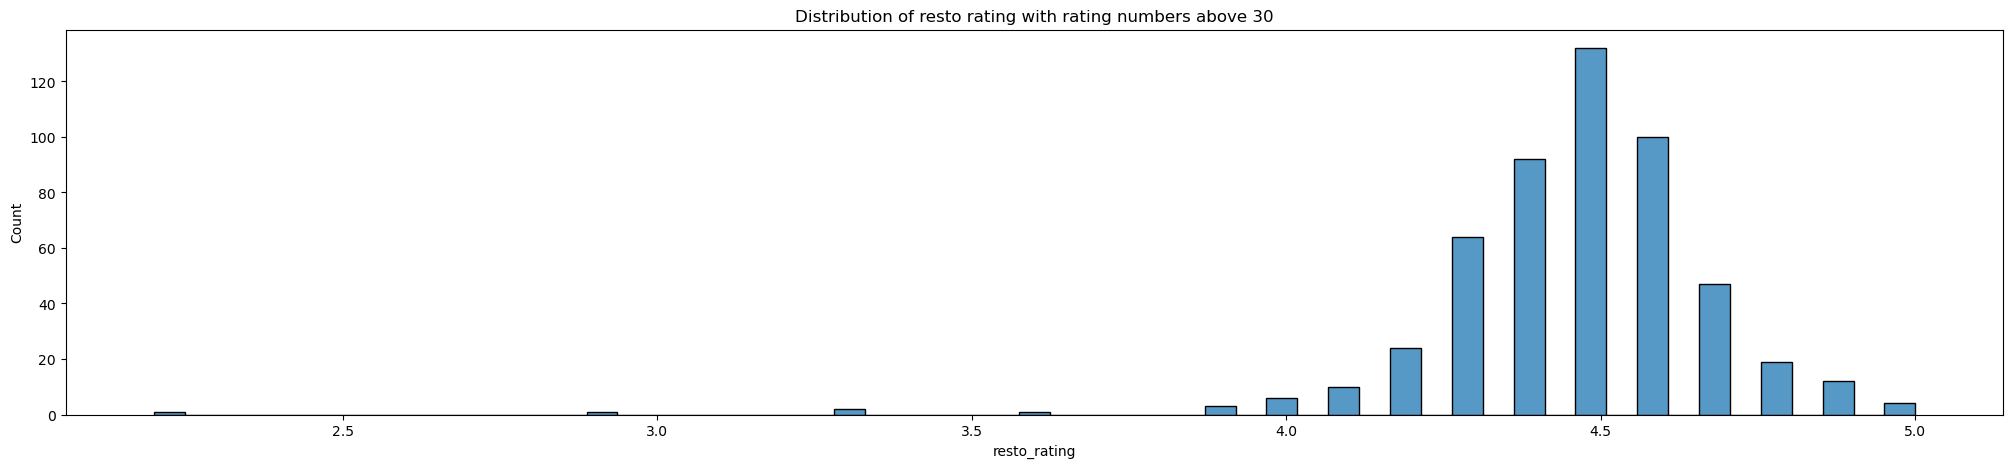

In [102]:
fig = plt.figure(figsize=(25, 5))  # Specify width and height in inches

# Create a subplot within the figure
ax = fig.add_subplot(1, 1, 1)

sns.histplot(data=big_rating, x='resto_rating')
plt.title('Distribution of resto rating with rating numbers above 30')
plt.show()

Data with rating_numbers more that 30 trend to normal

In [103]:
#Set threshold
df_newer=df_new[df_new.rating_numbers >= 30]

In [104]:
df_newer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518 entries, 0 to 1289
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   resto_id                        518 non-null    int64  
 1   resto_name                      518 non-null    object 
 2   resto_type                      518 non-null    object 
 3   resto_rating                    518 non-null    float64
 4   rating_numbers                  518 non-null    int64  
 5   average_operation_hours         518 non-null    float64
 6   resto_address                   518 non-null    object 
 7   check_payment                   518 non-null    float64
 8   cash_payment_only               518 non-null    float64
 9   debit_card_payment              518 non-null    float64
 10  credit_card_payment             518 non-null    float64
 11  voucher_payment                 518 non-null    float64
 12  phone_NFC_payment               518

In [105]:
#Make threshold for remove outlier resto rating.
q1 = np.percentile(df_newer.resto_rating,25)
q3 = np.percentile(df_newer.resto_rating,75)
iqr = q3 - q1
upper_limit= q3 + 1.5*iqr
lower_limit= q1 - 1.5*iqr
print(f'upper limit of this resto_rating is {upper_limit} and lower limit is {lower_limit}')

upper limit of this resto_rating is 4.899999999999999 and lower limit is 4.100000000000001


In [106]:
#drop resto rating outlier
df_new_wo_outlier=df_newer.drop(
    df_newer[df_newer.resto_rating < lower_limit].index
    )
df_new_wo_outlier=df_new_wo_outlier.drop(
    df_new_wo_outlier[df_new_wo_outlier.resto_rating > upper_limit].index
    )

In [107]:
df_new_wo_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 1 to 1289
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   resto_id                        478 non-null    int64  
 1   resto_name                      478 non-null    object 
 2   resto_type                      478 non-null    object 
 3   resto_rating                    478 non-null    float64
 4   rating_numbers                  478 non-null    int64  
 5   average_operation_hours         478 non-null    float64
 6   resto_address                   478 non-null    object 
 7   check_payment                   478 non-null    float64
 8   cash_payment_only               478 non-null    float64
 9   debit_card_payment              478 non-null    float64
 10  credit_card_payment             478 non-null    float64
 11  voucher_payment                 478 non-null    float64
 12  phone_NFC_payment               478

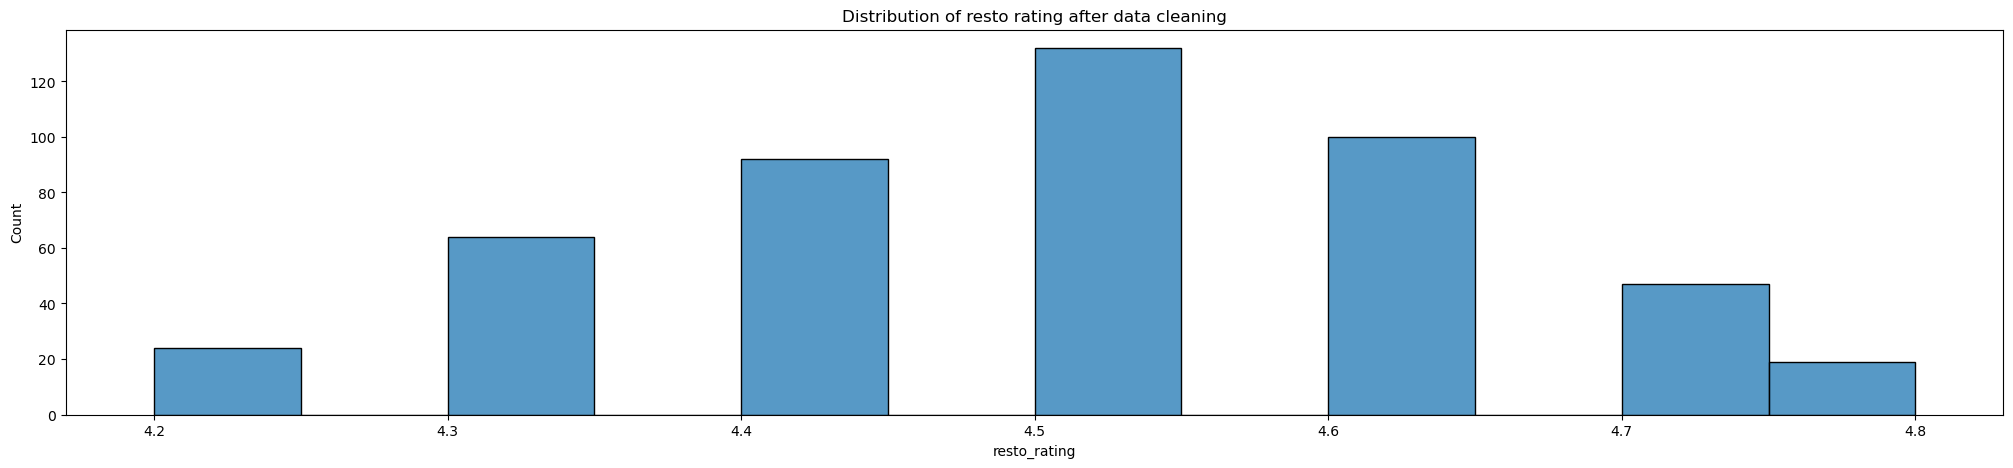

In [109]:
#Check the distribution of resto rating
fig = plt.figure(figsize=(25, 5))  

# Create a subplot within the figure
ax = fig.add_subplot(1, 1, 1)

sns.histplot(data=df_new_wo_outlier, x='resto_rating')
plt.title('Distribution of resto rating after data cleaning')
plt.show()

The rating become normally distributed

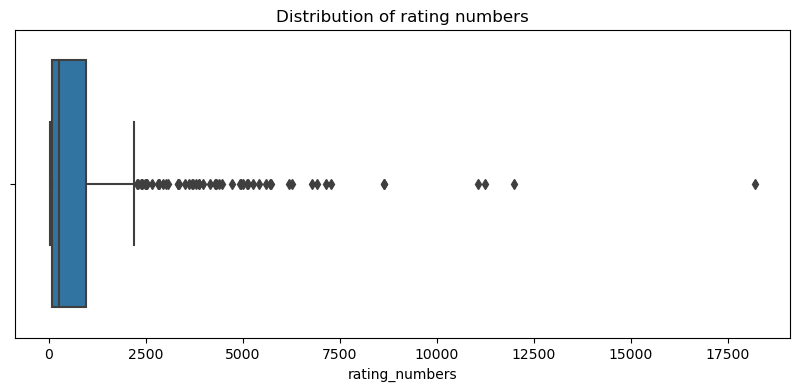

In [110]:
#Check distribution of rating_numbers
fig = plt.figure(figsize=(10, 4))  # Specify width and height in inches

# Create a subplot within the figure
ax = fig.add_subplot(1, 1, 1)

sns.boxplot(data=df_new_wo_outlier, x='rating_numbers')
plt.title('Distribution of rating numbers')
plt.show()

In [111]:
df_new_wo_outlier['rating_numbers'].describe()

count      478.000000
mean       947.663180
std       1813.911579
min         30.000000
25%         82.250000
50%        255.500000
75%        944.750000
max      18193.000000
Name: rating_numbers, dtype: float64

In [116]:
df_new_wo_outlier['log_rating_numbers']=df_new_wo_outlier['rating_numbers'].apply(lambda x: np.log(x))

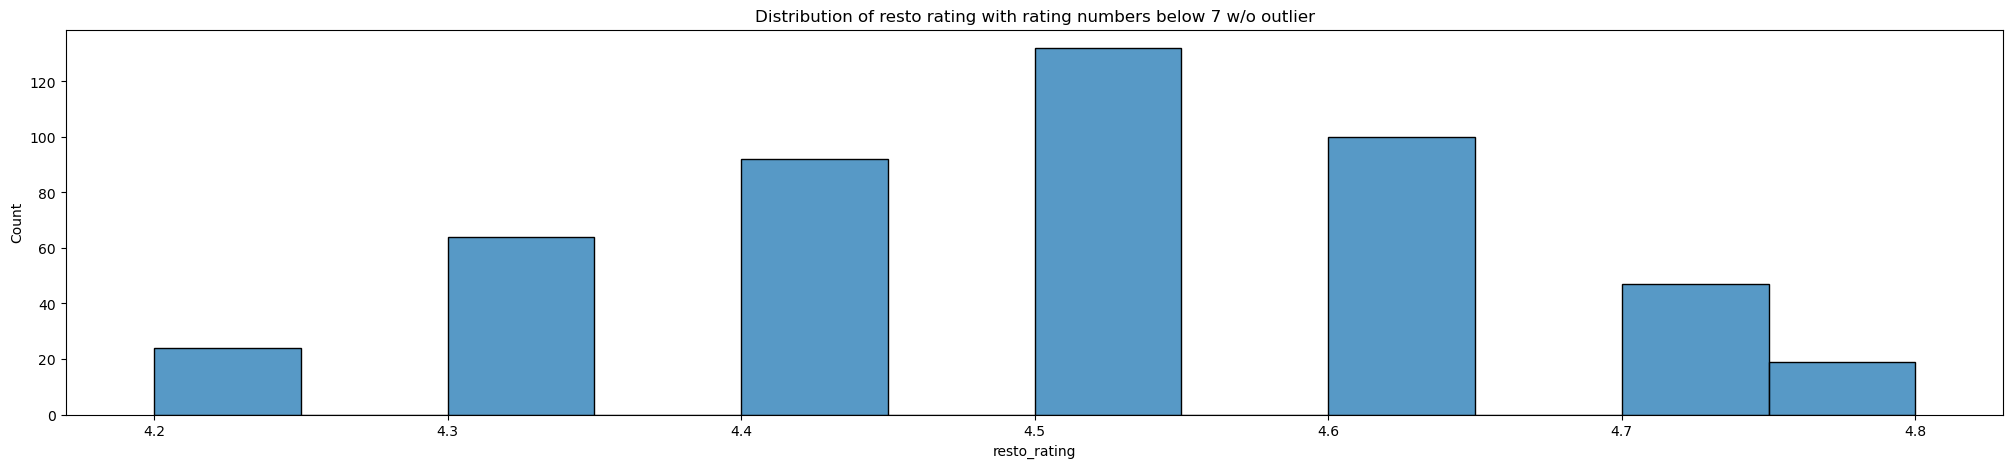

In [117]:
#Check the distribution of resto rating
fig = plt.figure(figsize=(25, 5))  # Specify width and height in inches

# Create a subplot within the figure
ax = fig.add_subplot(1, 1, 1)

sns.histplot(data=df_new_wo_outlier, x='resto_rating')
plt.title('Distribution of resto rating with rating numbers below 7 w/o outlier')
plt.show()

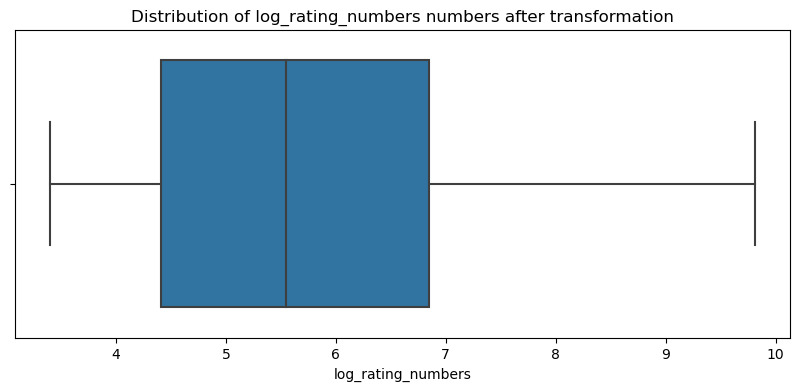

In [121]:
#Check distribution of rating_numbers
fig = plt.figure(figsize=(10, 4))  # Specify width and height in inches

# Create a subplot within the figure
ax = fig.add_subplot(1, 1, 1)

sns.boxplot(data=df_new_wo_outlier, x='log_rating_numbers')
plt.title('Distribution of log_rating_numbers numbers after transformation')
plt.show()

In [23]:
df_new_wo_outlier.log_rating_numbers.describe()

count    478.000000
mean       5.702524
std        1.512286
min        3.401197
25%        4.409750
50%        5.543220
75%        6.850903
max        9.808792
Name: log_rating_numbers, dtype: float64

The data still have relatively high range of rating_numbers, so we decided to make new variable that combine the resto_rating and the rating_numbers. The rating number will give weight to resto_rating, so restaurant that has more rating numbers potentially has more resto_rating. We called this variable 'real_rating'.

In [122]:
# Calculate the Z-score for Rating Numbers
df_new_wo_outlier['review_Zscore'] = (df_new_wo_outlier['log_rating_numbers'] - df_new_wo_outlier['log_rating_numbers'].mean()) / df_new_wo_outlier['log_rating_numbers'].std()

# Calculate the real rating
df_new_wo_outlier['real_rating'] = df_new_wo_outlier['resto_rating'] + df_new_wo_outlier['review_Zscore']

# Display the DataFrame with the real rating
result=df_new_wo_outlier[['resto_id','resto_name','resto_rating','rating_numbers','real_rating','review_Zscore','log_rating_numbers']]
result.sort_values(by='real_rating',ascending=False).head(30)

resto_id                                  resto_name  resto_rating  \
290        398              Restoran Kampung Laut Semarang           4.4   
888       1323                              Kedai Beringin           4.6   
726        990               McDonald's Majapahit Semarang           4.5   
976       1421                              KFC Pandanaran           4.5   
904       1340                          Waroeng Kaligarong           4.5   
1158      1681                        Spiegel Bar & Bistro           4.6   
493        689                           Kampoeng Semarang           4.3   
278        384                                  The Tavern           4.7   
837       1130              McDonald's Pamularsih Semarang           4.5   
110        132            BSB Sport Club and Lakers' Resto           4.5   
9           11                            Mr.K Cafe Gombel           4.5   
1005      1457                       Nasi Gandul Pak Memet           4.6   
902       1338                                    Toko Oen           4.4   
877       1187                        Bakso Geger Semarang           4.4   
201        269                McDonald's Ngaliyan Semarang           4.5   
943       1385                       Depot Sukses Semarang           4.5   
15          19                      Super Penyet Setiabudi           4.4   
106        128               Eden International Daily Food           4.6   
324        442             Ayam Goreng Spesial Lombok Idjo           4.4   
410        556                       Shabu Auce Restaurant           4.6   
129        157                     Koenokoeni Cafe Gallery           4.4   
710        967                          Pizza Hut Restoran           4.5   
890       1325                         Holliday Restaurant           4.5   
922       1363                             Kedai Gula Jawa           4.5   
14          18  Sim Six (Sim-6) garden Resto Ngesrep timur           4.5   
618        844            Waroeng Steak and Shake Ngaliyan           4.4   
935       1376          Waroeng Steak Imam Bonjol Semarang           4.4   
189        247                 Ayam Goreng Suharti Krapyak           4.3   
150        186                D'Blasteran "Nostalgia Rasa"           4.5   
293        402                    Lind's Ice Cream & Resto           4.5   

      rating_numbers  real_rating  review_Zscore  log_rating_numbers  
290            18193     7.115272       2.715272            9.808792  
888            11992     7.039665       2.439665            9.391995  
726            11242     6.896959       2.396959            9.327412  
976             8646     6.723341       2.223341            9.064852  
904             8639     6.722806       2.222806            9.064042  
1158            7152     6.697899       2.097899            8.875147  
493            11070     6.686764       2.386764            9.311994  
278             5606     6.636848       1.936848            8.631593  
837             7275     6.609175       2.109175            8.892199  
110             6922     6.576285       2.076285            8.842460  
9               6259     6.509707       2.009707            8.741776  
1005            5141     6.479591       1.879591            8.545003  
902             6781     6.462676       2.062676            8.821880  
877             6184     6.401736       2.001736            8.729721  
201             5117     6.376497       1.876497            8.540324  
943             5007     6.362127       1.862127            8.518592  
15              5722     6.350391       1.950391            8.652074  
106             4154     6.338628       1.738628            8.331827  
324             5421     6.314659       1.914659            8.598036  
410             3969     6.308503       1.708503            8.286269  
129             5273     6.296355       1.896355            8.570355  
710             4468     6.286813       1.786813            8.404696  
890             

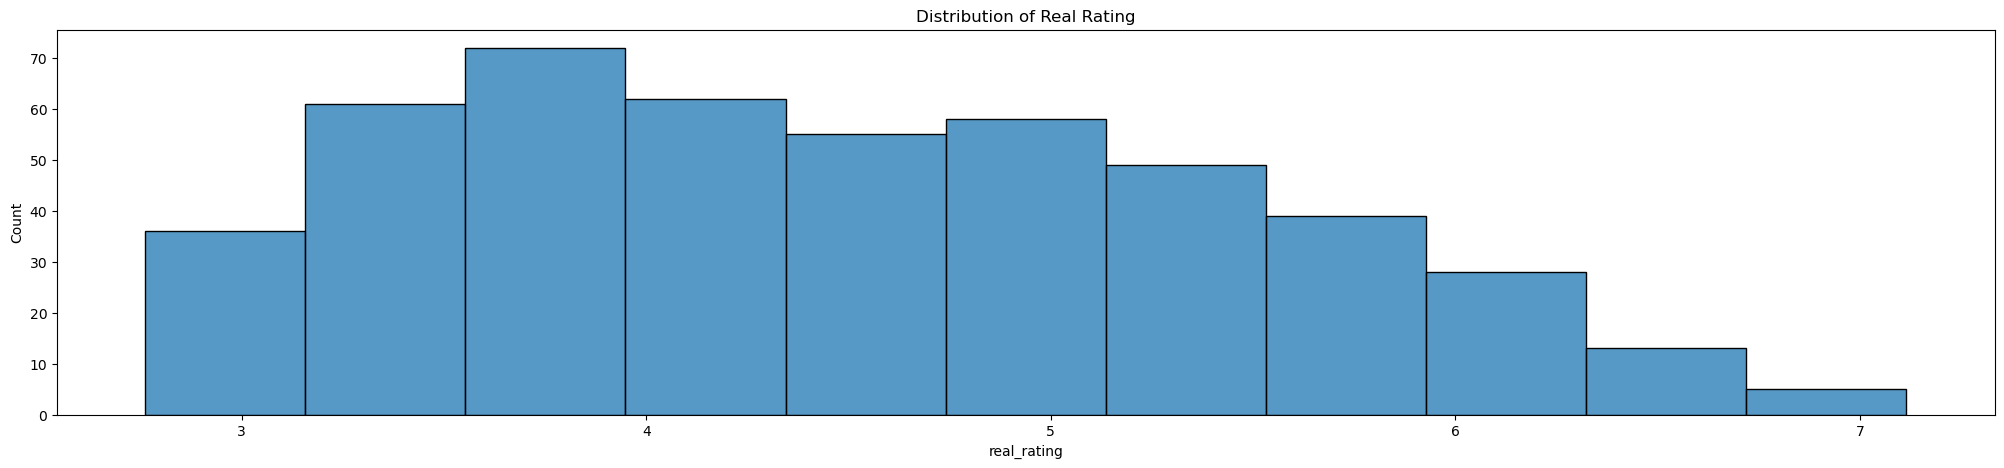

In [123]:
#Check the distribution of real rating
fig = plt.figure(figsize=(25, 5))  # Specify width and height in inches

# Create a subplot within the figure
ax = fig.add_subplot(1, 1, 1)

sns.histplot(data=result, x='real_rating')
plt.title('Distribution of Real Rating')
plt.show()

The data become relatively right skewed. But we think this is variable is more representative to describe resto rating.

In [124]:
df_new_wo_outlier=df_new_wo_outlier.reset_index(drop=True)

In [127]:
df_new_wo_outlier['resto_type'].nunique()

56

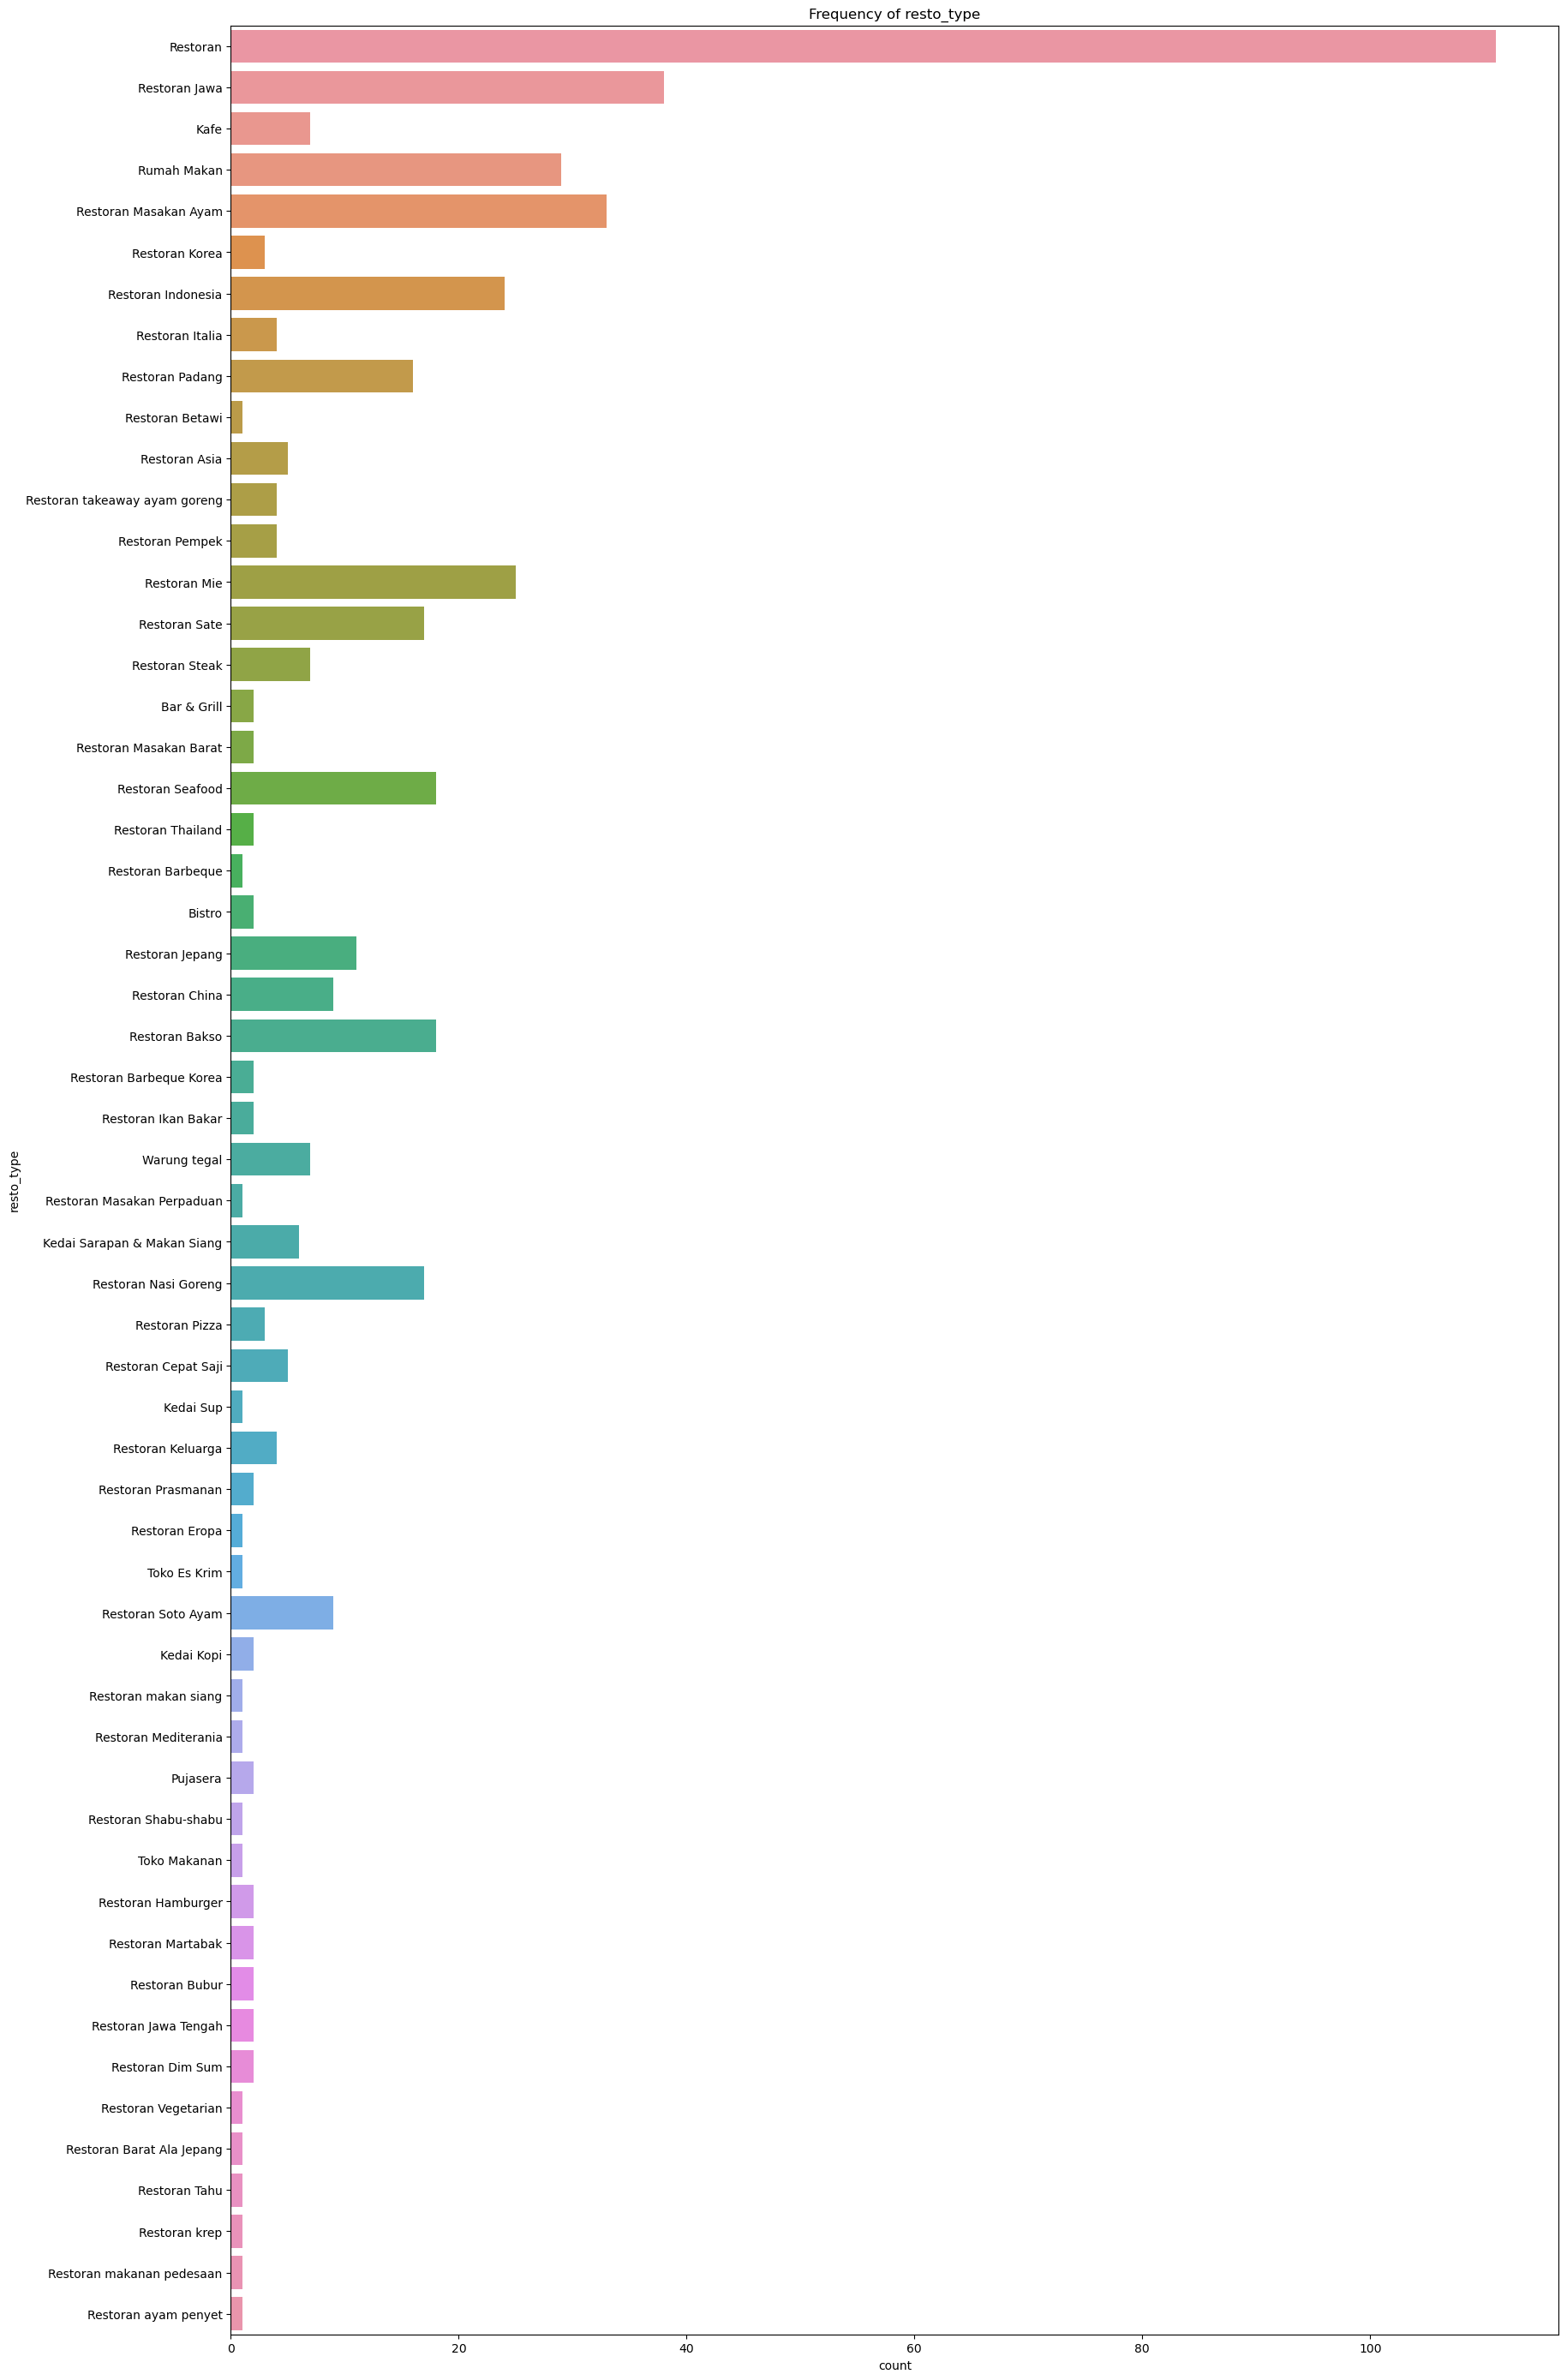

In [129]:
fig, ax = plt.subplots(1, 1, figsize=(20, 35))

sns.countplot(data=df_new_wo_outlier, y='resto_type')
plt.title('Frequency of resto_type')
plt.show()

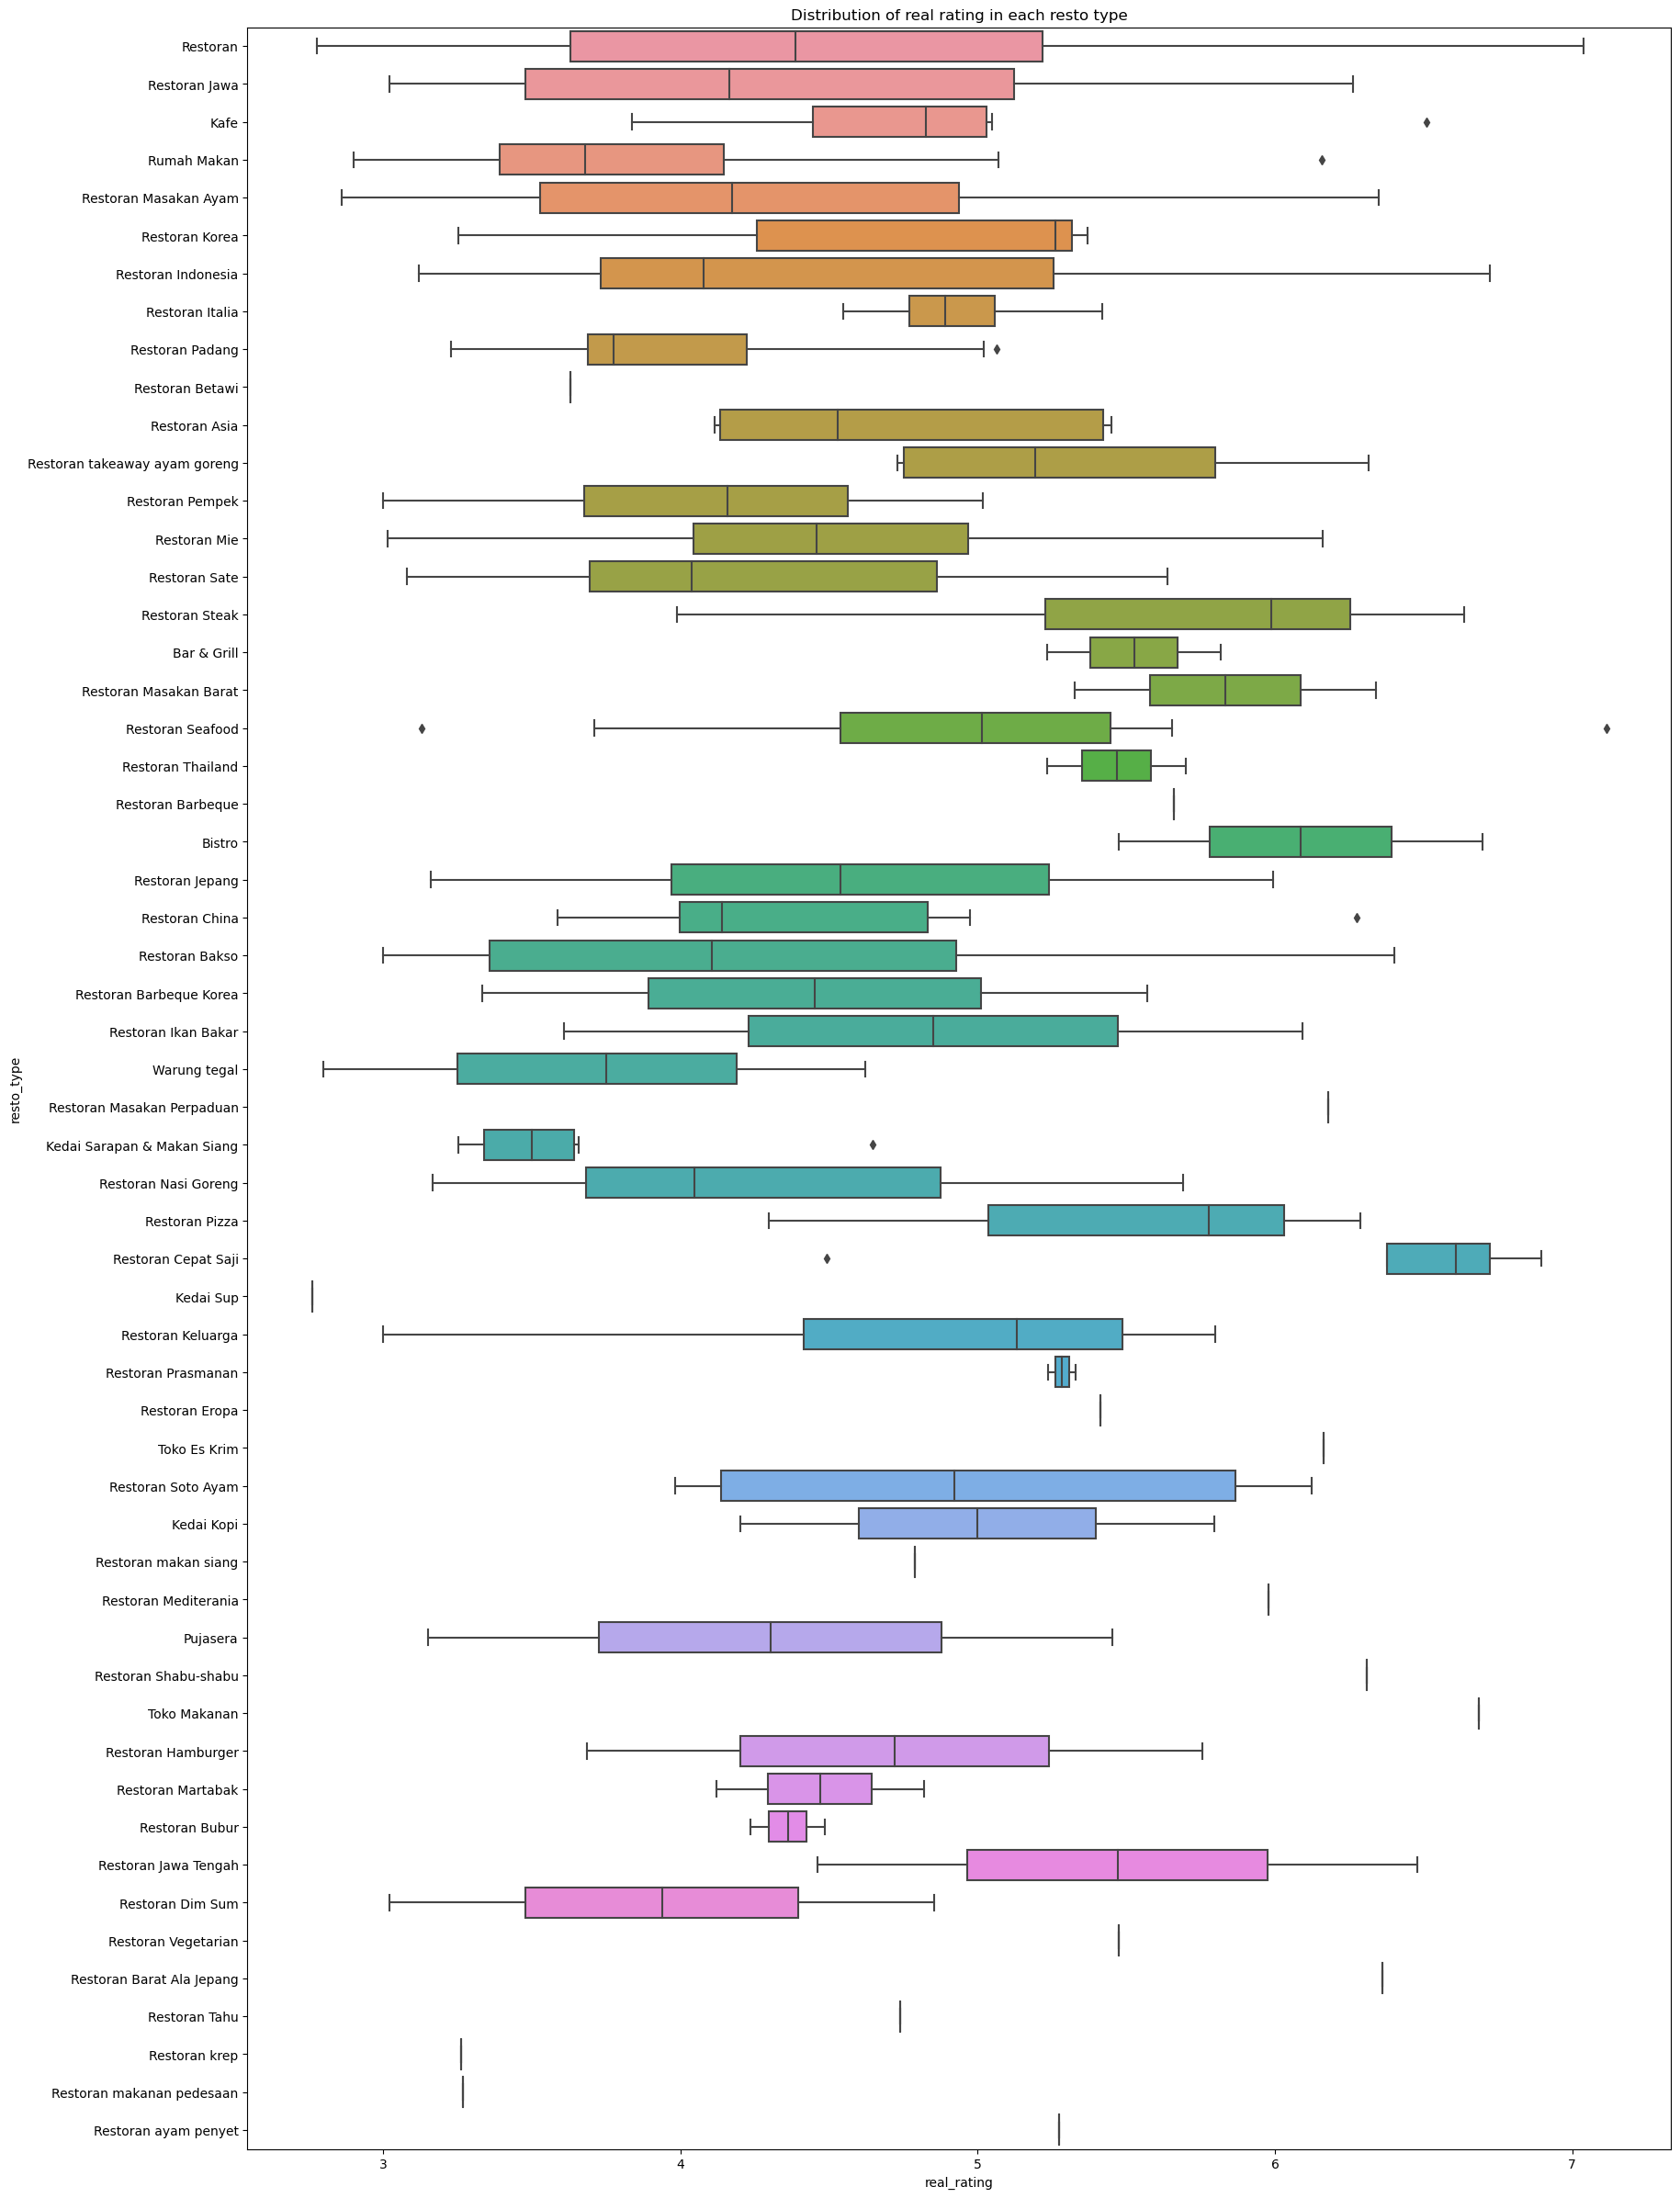

In [130]:
fig, ax = plt.subplots(1, 1, figsize=(20, 30))

sns.boxplot(data=df_new_wo_outlier, x='real_rating', y='resto_type')
plt.title('Distribution of real rating in each resto type')
plt.show()


plt.show()

In [131]:
model_trial = smf.ols('real_rating ~ C(resto_type)',df_new_wo_outlier)
results_trial = model_trial.fit()

results_trial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            real_rating   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     2.535
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           1.01e-07
Time:                        09:01:48   Log-Likelihood:                -606.01
No. Observations:                 478   AIC:                             1324.
Df Residuals:                     422   BIC:                             1558.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                          5.5262      0.647      8.541      0.000       4.254       6.798
C(resto_type)[T.Bistro]                            0.5608      0.915      0.613      0.540      -1.238       2.359
C(resto_type)[T.Kafe]                             -0.6509      0.734     -0.887      0.375      -2.093       0.791
C(resto_type)[T.Kedai Kopi]                       -0.5266      0.915     -0.576      0.565      -2.325       1.272
C(resto_type)[T.Kedai Sarapan & Makan Siang]      -1.8811      0.747     -2.518      0.012      -3.350      -0.413
C(resto_type)[T.Kedai Sup]                        -2.7652      1.121     -2.468      0.014      -4.968      -0.562
C(resto_type)[T.Pujasera]                         -1.2239      0.915     -1.338      0.182      -3.022       0.575
C(resto_type)[T.Restoran]                         -1.1115      0.653     -1.703      0.089      -2.395       0.172
C(resto_type)[T.Restoran Asia]                    -0.7965      0.766     -1.040      0.299      -2.301       0.708
C(resto_type)[T.Restoran Bakso]                   -1.2588      0.682     -1.846      0.066      -2.599       0.082
C(resto_type)[T.Restoran Barat Ala Jepang]         0.8359      1.121      0.746      0.456      -1.367       3.039
C(resto_type)[T.Restoran Barbeque]                 0.1330      1.121      0.119      0.906      -2.070       2.336
C(resto_type)[T.Restoran Barbeque Korea]          -1.0744      0.915     -1.174      0.241      -2.873       0.724
C(resto_type)[T.Restoran Betawi]                  -1.8972      1.121     -1.693      0.091      -4.100       0.306
C(resto_type)[T.Restoran Bubur]                   -1.1654      0.915     -1.274      0.203      -2.964       0.633
C(resto_type)[T.Restoran Cepat Saji]               0.6934      0.766      0.906      0.366      -0.811       2.198
C(resto_type)[T.Restoran China]                   -1.0312      0.715     -1.442      0.150      -2.437       0.375
C(resto_type)[T.Restoran Dim Sum]                 -1.5884      0.915     -1.736      0.083      -3.387       0.210
C(resto_type)[T.Restoran Eropa]                   -0.1148      1.121     -0.102      0.918      -2.317       2.088
C(resto_type)[T.Restoran Hamburger]               -0.8060      0.915     -0.881      0.379      -2.605       0.992
C(resto_type)[T.Restoran Ikan Bakar]              -0.6752      0.915     -0.738      0.461      -2.474       1.123
C(resto_type)[T.Restoran Indonesia]               -1.0027      0.673     -1.489      0.137      -2.326       0.321
C(resto_type)[T.Restoran Italia]                  -0.5896      0.792     -0.744      0.457      -2.147       0.968
C(resto_type)[T.Restoran Jawa]                    -1.1288      0.664     -1.700      0.090   

/var/folders/j8/y_9b3dcx03nct600zgv3jf_80000gn/T/ipykernel_8240/1083963252.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


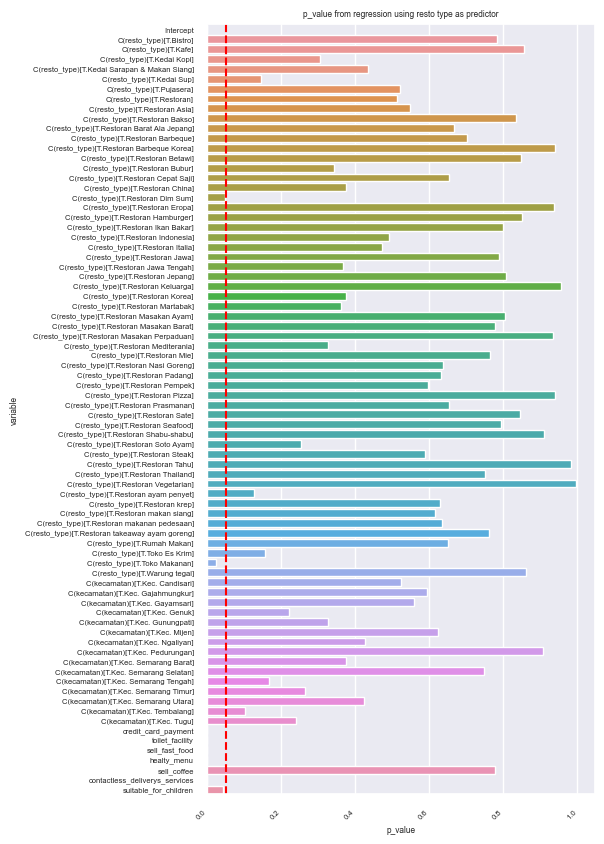

In [300]:
list_of_variable=[]
list_of_pvalue=[]
list_of_coeff=[]
for i in range (len(results_trial.summary().tables[1].data)-1):
    a=i+1
    list_of_variable.append(results_trial.summary().tables[1].data[a][0])
    list_of_pvalue.append(float(results_trial.summary().tables[1].data[a][4]))
    list_of_coeff.append(float(results_trial.summary().tables[1].data[a][1]))
dataframe_result=pd.DataFrame({'variable':list_of_variable,'p_value':list_of_pvalue,'coeff':list_of_coeff})
fig, ax = plt.subplots(1, 1, figsize=(5, 10))
sns.set(font_scale = 0.5)
threshold=0.05
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.axvline(threshold, color='red', linestyle='--')
sns.barplot(ax=ax,data=dataframe_result, y='variable', x='p_value')
plt.title('p_value from regression using resto type as predictor')
plt.show()

Dari hasil OLS di atas, hanya beberapa tipe restoran yang menunjukkan perbedaan rating yang signifikan. Hal tersebut disebabkan karena beberapa tipe restoran mempunyai range rating yang lebar, sehingga tidak dapat digunakan menjelaskan variasi pada rating restoran

In [132]:
#Create function to extract name of kecamatan from address
def find_kecamatan(address):
    match = re.search(r'Kec.\ (\w+)\ (\w+.,)', address)
    if match:
        kecamatan=match.group(0)
        if kecamatan == 'Kec. Semarang Tim.,':
            kecamatan ='Kec. Semarang Timur'
        elif kecamatan == 'Kec. Semarang Sel.,':
            kecamatan = 'Kec. Semarang Selatan'
    else:
        matching = re.search(r'Kec.\ (\w+.)', address)
        if matching:
            kecamatan=matching.group(0)
            if kecamatan == 'Kec. Gn.':
                kecamatan ='Kec. Gunungpati'
            else:
                kecamatan=kecamatan
        else:
            kecamatan='Semarang'
    return kecamatan

In [135]:
#Adding new variable Kecamatan
df_new_wo_outlier['kecamatan']=df_new_wo_outlier['resto_address'].apply(lambda x: find_kecamatan(x))

In [140]:
df_new_wo_outlier[df_new_wo_outlier.kecamatan =='Semarang']

resto_id           resto_name          resto_type  resto_rating  \
194       744  BURKETSU Gunungpati            Restoran           4.3   
237       837          Bomah Resto            Restoran           4.6   
244       852        Selera Sambal  Restoran Indonesia           4.3   
265       936            heyd cafe            Restoran           4.3   
273       955       RM.Moro Seneng     Restoran Padang           4.2   
367      1371          PTH Kitchen      Restoran China           4.3   

     rating_numbers  average_operation_hours  \
194             316                 6.000000   
237             489                12.500000   
244            1499                11.000000   
265              37                 7.714286   
273             156                13.500000   
367             102                10.285714   

                                         resto_address  check_payment  \
194  Depan Anhesa Gym, Jl. Kolonel Hardiyanto, Rt 3...            0.0   
237  Jl. Taman Siswa No.9, Sekaran, Kec.Gunungpati,...            0.0   
244  Villa Ngaliyan Permai, Jl. Prof. Dr. Hamka, RT...            0.0   
265  bukit permata puri B 15 no 25 ngaliyan semaran...            0.0   
273  JL Honggowongso No. 18 RT 002/09, Semarang, 50...            0.0   
367  Komplek, Jl. Tanah Mas Raya Jl. Selomas Raya N...            0.0   

     cash_payment_only  debit_card_payment  ...  \
194                0.0                 0.0  ...   
237                0.0                 0.0  ...   
244                0.0                 0.0  ...   
265                1.0                 0.0  ...   
273                1.0                 0.0  ...   
367                0.0                 0.0  ...   

     contactless_deliverys_services  take_away  drive_through  dine_in  \
194                             1.0        1.0            0.0      1.0   
237                             1.0        1.0            0.0      1.0   
244                             1.0        1.0            0.0      1.0   
265                             0.0        1.0            0.0      1.0   
273                             0.0        1.0            0.0      1.0   
367                             1.0        1.0            0.0      1.0   

     delivery  open_space  log_rating_numbers  review_Zscore  real_rating  \
194       1.0         1.0            5.755742       0.035190     4.335190   
237       1.0         1.0            6.192362       0.323906     4.923906   
244       1.0         1.0            7.312553       1.064633     5.364633   
265       0.0         0.0            3.610918      -1.383076     2.916924   
273       0.0         1.0            5.049856      -0.431577     3.768423   
367       1.0         0.0            4.624973      -0.712531     3.587469   

     kecamatan  
194   Semarang  
237   Semarang  
244   Semarang  
265   Semarang  
273   Semarang  
367   Semarang  

[6 rows x 49 columns]

In [143]:
df_new_wo_outlier.columns

Index(['resto_id', 'resto_name', 'resto_type', 'resto_rating',
       'rating_numbers', 'average_operation_hours', 'resto_address',
       'check_payment', 'cash_payment_only', 'debit_card_payment',
       'credit_card_payment', 'voucher_payment', 'phone_NFC_payment',
       'dog_allowed', 'suitable_for_children', 'high_chair_facility',
       'bar_facility', 'toilet_facility', 'netral_gender_toilet_facility',
       'wifi_facility', 'paid_wifi_facility', 'free_wifi_facility',
       'high_class_atmosphere', 'viral_atmosphere', 'comfortable_atmosphere',
       'relaxed_atmosphere', 'sell_alcohol', 'sell_beer', 'sell_fast_food',
       'sell_late_night_food', 'sell_organic_food', 'sell_cocktail',
       'sell_coffee', 'all_you_can_eat', 'sell_halal_food',
       'menu_for_childern', 'healty_menu', 'vegetarian_menu', 'sell_wine',
       'contactless_deliverys_services', 'take_away', 'drive_through',
       'dine_in', 'delivery', 'open_space', 'log_rating_numbers',
       'review_Zscore',

In [144]:
#Replace row that has no kecamatan in address
for i in df_new_wo_outlier.index:
    if df_new_wo_outlier.iloc[i, 48] == 'Semarang':
        if df_new_wo_outlier.iloc[i, 6] == 'Depan Anhesa Gym, Jl. Kolonel Hardiyanto, Rt 3 rw 4, Dukuh Mbanaran, Sekaran, Kota Semarang, Jawa Tengah 50229':
            df_new_wo_outlier.iloc[i, 48] = 'Kec. Gunungpati'
        elif df_new_wo_outlier.iloc[i, 6] == 'Jl. Taman Siswa No.9, Sekaran, Kec.Gunungpati, Kota Semarang, Jawa Tengah 59252':
            df_new_wo_outlier.iloc[i, 48] = 'Kec. Gunungpati'
        elif df_new_wo_outlier.iloc[i, 6] == 'Villa Ngaliyan Permai, Jl. Prof. Dr. Hamka, RT.03/RW.14, Ngaliyan, Kota Semarang, Jawa Tengah 50185':
            df_new_wo_outlier.iloc[i, 48] = 'Kec. Ngaliyan'
        elif df_new_wo_outlier.iloc[i, 6] == 'bukit permata puri B 15 no 25 ngaliyan semarang, Bringin, Ngaliyan, Bringin, Ngaliyan, Bringin, Ngaliyan, Semarang City, Central Java 50189':
            df_new_wo_outlier.iloc[i, 48] = 'Kec. Ngaliyan'
        elif df_new_wo_outlier.iloc[i, 6] == 'JL Honggowongso No. 18 RT 002/09, Semarang, 50159, Purwoyoso, Ngaliyan, Semarang City, Central Java 50184':
            df_new_wo_outlier.iloc[i, 48] = 'Kec. Ngaliyan'
        elif df_new_wo_outlier.iloc[i, 6] == 'Komplek, Jl. Tanah Mas Raya Jl. Selomas Raya No.B-21, Panggung Lor, Semarang Utara, Semarang City, Central Java 50177':
            df_new_wo_outlier.iloc[i, 48] = 'Kec. Semarang Utara'
        else:
            continue
    else:
        continue

In [145]:
#Terdapat kecamatan yang mengalami duplikasi
df_new_wo_outlier['kecamatan'].unique()

array(['Kec. Banyumanik,', 'Kec. Tembalang,', 'Kec. Candisari,',
       'Kec. Mijen,', 'Kec. Gajahmungkur,', 'Kec. Semarang Selatan',
       'Kec. Semarang Tengah,', 'Kec. Ngaliyan,', 'Kec. Semarang Barat,',
       'Kec. Gayamsari,', 'Kec. Genuk,', 'Kec. Gunungpati',
       'Kec. Gunungpati,', 'Kec. Ngaliyan', 'Kec. Pedurungan,',
       'Kec. Semarang Utara', 'Kec. Semarang Timur',
       'Kec. Semarang Utara,', 'Kec. Tugu,'], dtype=object)

In [146]:
#Menghilangkan ,
df_new_wo_outlier['kecamatan'] =df_new_wo_outlier['kecamatan'].apply(lambda x: x.replace(',', ''))

In [147]:
df_new_wo_outlier['kecamatan'].unique()

array(['Kec. Banyumanik', 'Kec. Tembalang', 'Kec. Candisari',
       'Kec. Mijen', 'Kec. Gajahmungkur', 'Kec. Semarang Selatan',
       'Kec. Semarang Tengah', 'Kec. Ngaliyan', 'Kec. Semarang Barat',
       'Kec. Gayamsari', 'Kec. Genuk', 'Kec. Gunungpati',
       'Kec. Pedurungan', 'Kec. Semarang Utara', 'Kec. Semarang Timur',
       'Kec. Tugu'], dtype=object)

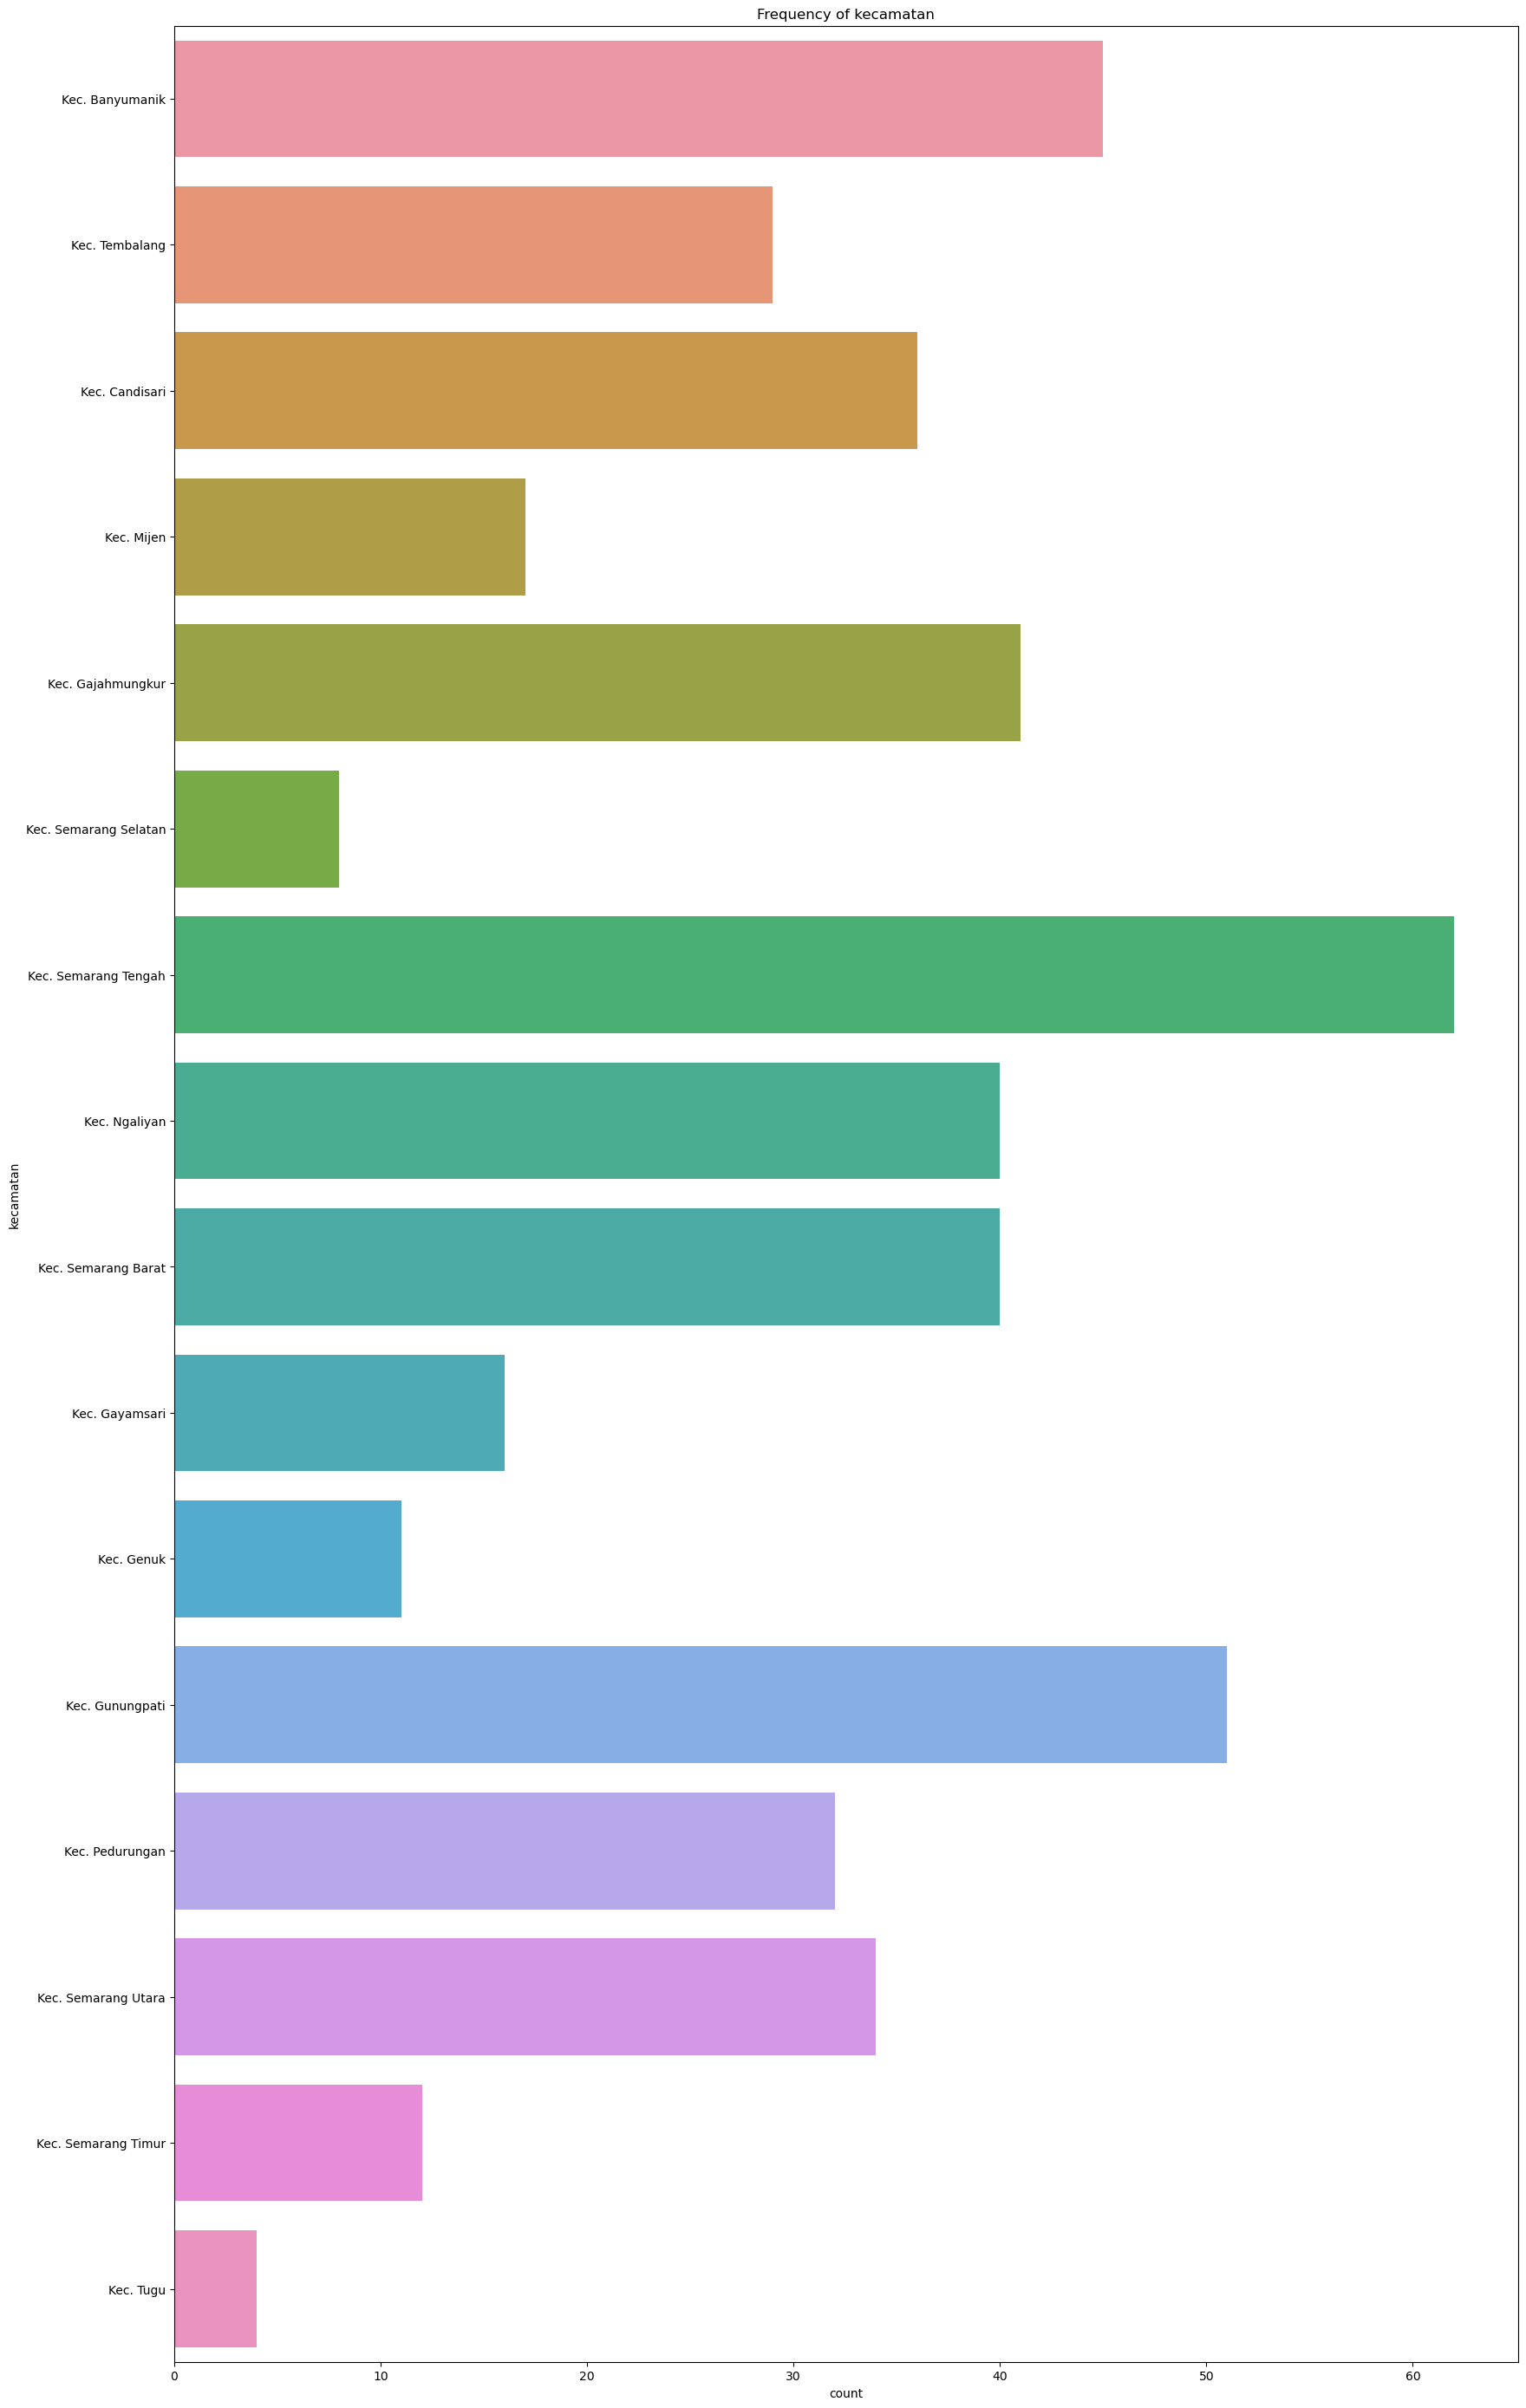

In [148]:
fig, ax = plt.subplots(1, 1, figsize=(20, 35))

sns.countplot(data=df_new_wo_outlier, y='kecamatan')
plt.title('Frequency of kecamatan')
plt.show()

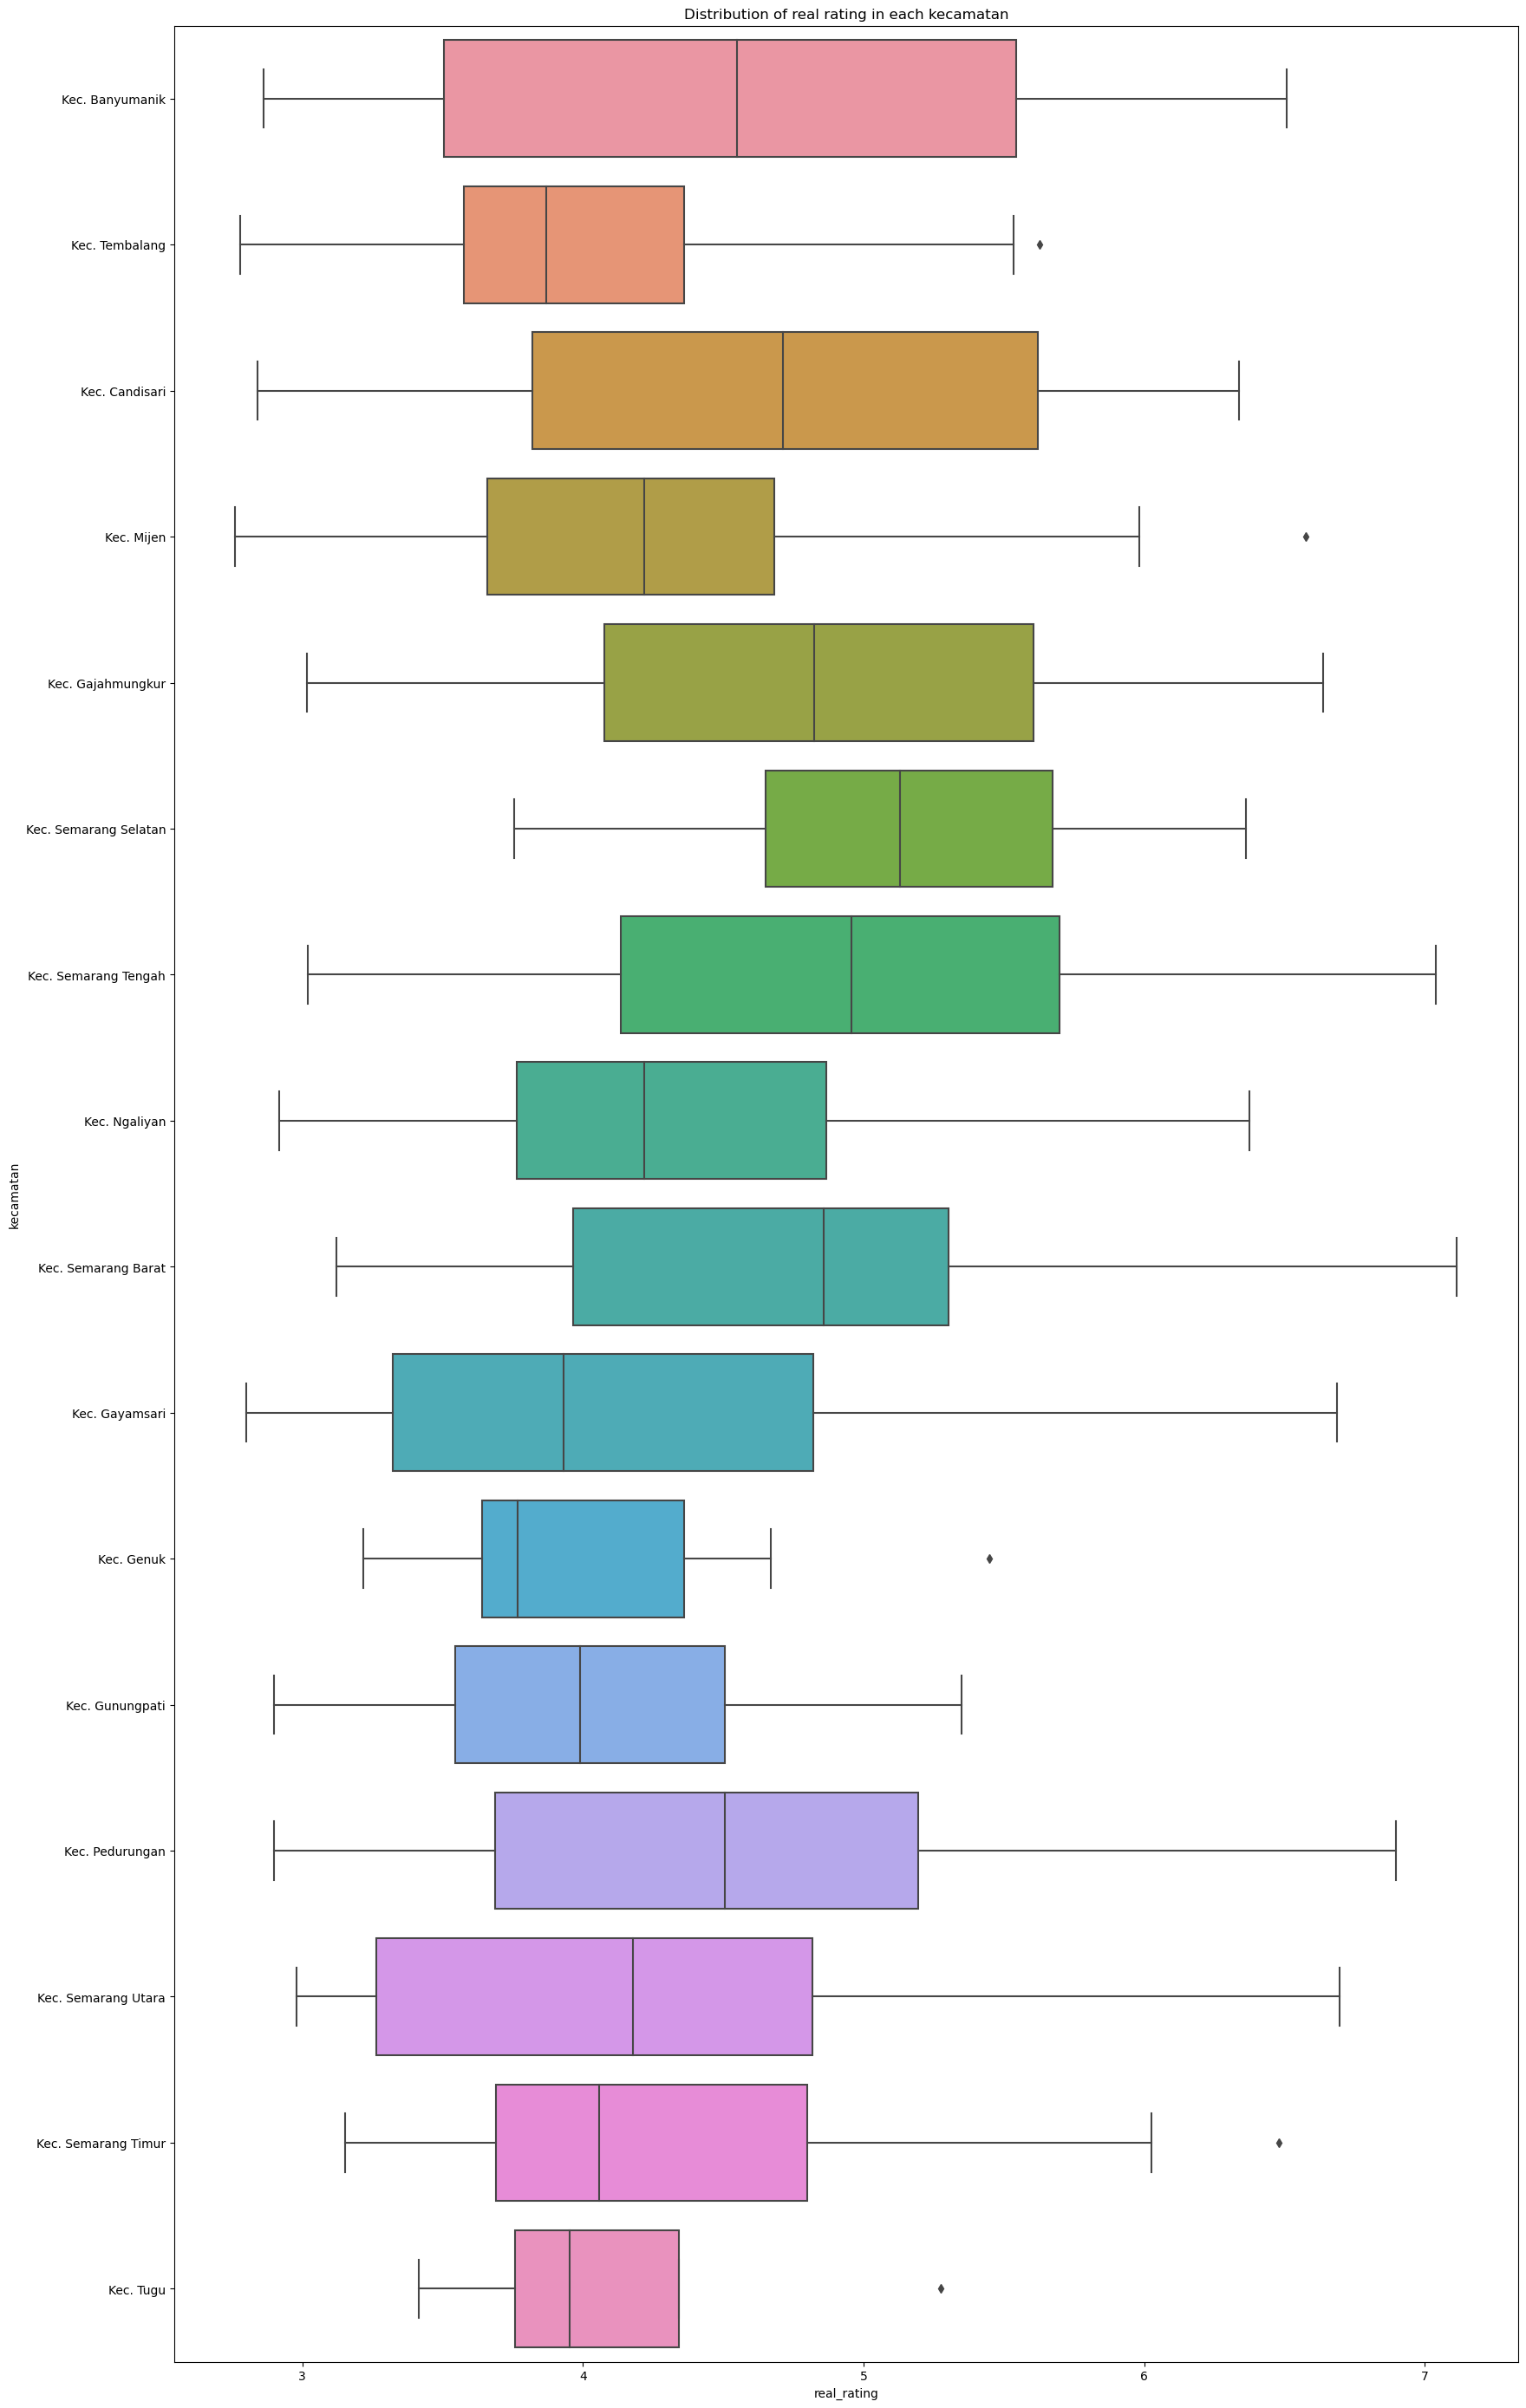

In [149]:
fig, ax = plt.subplots(1, 1, figsize=(20, 35))

sns.boxplot(data=df_new_wo_outlier, x='real_rating', y='kecamatan')
plt.title('Distribution of real rating in each kecamatan')
plt.show()

Secara distribusi rating di tiap kecamatan relatif sama.

In [150]:
model_kecamatan = smf.ols('real_rating ~ C(kecamatan)',df_new_wo_outlier)
results_kecamatan = model_kecamatan.fit()

results_kecamatan.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            real_rating   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     3.664
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           4.41e-06
Time:                        09:22:16   Log-Likelihood:                -647.37
No. Observations:                 478   AIC:                             1327.
Df Residuals:                     462   BIC:                             1393.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 4.6223      0.142     32.518      0.000       4.343       4.902
C(kecamatan)[T.Kec. Candisari]            0.0344      0.213      0.161      0.872      -0.385       0.453
C(kecamatan)[T.Kec. Gajahmungkur]         0.1718      0.206      0.834      0.405      -0.233       0.576
C(kecamatan)[T.Kec. Gayamsari]           -0.4512      0.278     -1.626      0.105      -0.997       0.094
C(kecamatan)[T.Kec. Genuk]               -0.5955      0.321     -1.857      0.064      -1.226       0.035
C(kecamatan)[T.Kec. Gunungpati]          -0.5721      0.195     -2.933      0.004      -0.955      -0.189
C(kecamatan)[T.Kec. Mijen]               -0.2792      0.271     -1.029      0.304      -0.813       0.254
C(kecamatan)[T.Kec. Ngaliyan]            -0.2205      0.207     -1.064      0.288      -0.628       0.187
C(kecamatan)[T.Kec. Pedurungan]          -0.1456      0.220     -0.660      0.509      -0.579       0.288
C(kecamatan)[T.Kec. Semarang Barat]       0.0776      0.207      0.375      0.708      -0.330       0.485
C(kecamatan)[T.Kec. Semarang Selatan]     0.5400      0.366      1.476      0.141      -0.179       1.259
C(kecamatan)[T.Kec. Semarang Tengah]      0.3393      0.187      1.817      0.070      -0.028       0.706
C(kecamatan)[T.Kec. Semarang Timur]      -0.2963      0.310     -0.956      0.339      -0.905       0.313
C(kecamatan)[T.Kec. Semarang Utara]      -0.4382      0.217     -2.022      0.044      -0.864      -0.012
C(kecamatan)[T.Kec. Tembalang]           -0.6139      0.227     -2.703      0.007      -1.060      -0.168
C(kecamatan)[T.Kec. Tugu]                -0.4734      0.498     -0.952      0.342      -1.451       0.504
==============================================================================
Omnibus:                       19.481   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.687
Skew:                           0.228   Prob(JB):                      0.00290
Kurtosis:                       2.384   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/var/folders/j8/y_9b3dcx03nct600zgv3jf_80000gn/T/ipykernel_8240/2912891050.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


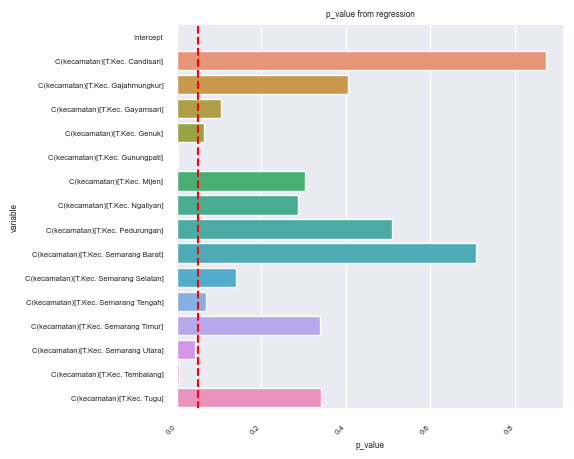

In [294]:
list_of_variable=[]
list_of_pvalue=[]
list_of_coeff=[]
for i in range (len(results_kecamatan.summary().tables[1].data)-1):
    a=i+1
    list_of_variable.append(results_kecamatan.summary().tables[1].data[a][0])
    list_of_pvalue.append(float(results_kecamatan.summary().tables[1].data[a][4]))
    list_of_coeff.append(float(results_kecamatan.summary().tables[1].data[a][1]))
dataframe_result=pd.DataFrame({'variable':list_of_variable,'p_value':list_of_pvalue,'coeff':list_of_coeff})
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.set(font_scale = 0.5)
threshold=0.05
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.axvline(threshold, color='red', linestyle='--')
sns.barplot(ax=ax,data=dataframe_result, y='variable', x='p_value')
plt.title('p_value from regression')
plt.show()

Dari hasil OLS, terlihat bahwa tidak ada beda signifikan pada restoran antar kecamatan. Seluruh kecamatan mempunyai range rating yang relatif sama.

In [151]:
#Choose column
column_selected=[
    'resto_id', 'resto_name', 'real_rating',
    'average_operation_hours','debit_card_payment', 'credit_card_payment',
    'voucher_payment','phone_NFC_payment', 'suitable_for_children','high_chair_facility',
    'bar_facility', 'toilet_facility','netral_gender_toilet_facility',
    'wifi_facility', 'free_wifi_facility','high_class_atmosphere',
    'comfortable_atmosphere', 'relaxed_atmosphere','sell_alcohol',
    'sell_beer', 'sell_fast_food', 'sell_late_night_food',
    'sell_organic_food', 'sell_cocktail', 'sell_coffee', 'all_you_can_eat',
    'sell_halal_food', 'menu_for_childern', 'healty_menu',
    'vegetarian_menu', 'sell_wine', 'contactless_deliverys_services',
    'take_away', 'drive_through', 'dine_in', 'delivery', 'open_space'
]

In [152]:
#Create table in selected column
df1=df_new_wo_outlier[column_selected]

In [153]:
df1.columns

Index(['resto_id', 'resto_name', 'real_rating', 'average_operation_hours',
       'debit_card_payment', 'credit_card_payment', 'voucher_payment',
       'phone_NFC_payment', 'suitable_for_children', 'high_chair_facility',
       'bar_facility', 'toilet_facility', 'netral_gender_toilet_facility',
       'wifi_facility', 'free_wifi_facility', 'high_class_atmosphere',
       'comfortable_atmosphere', 'relaxed_atmosphere', 'sell_alcohol',
       'sell_beer', 'sell_fast_food', 'sell_late_night_food',
       'sell_organic_food', 'sell_cocktail', 'sell_coffee', 'all_you_can_eat',
       'sell_halal_food', 'menu_for_childern', 'healty_menu',
       'vegetarian_menu', 'sell_wine', 'contactless_deliverys_services',
       'take_away', 'drive_through', 'dine_in', 'delivery', 'open_space'],
      dtype='object')

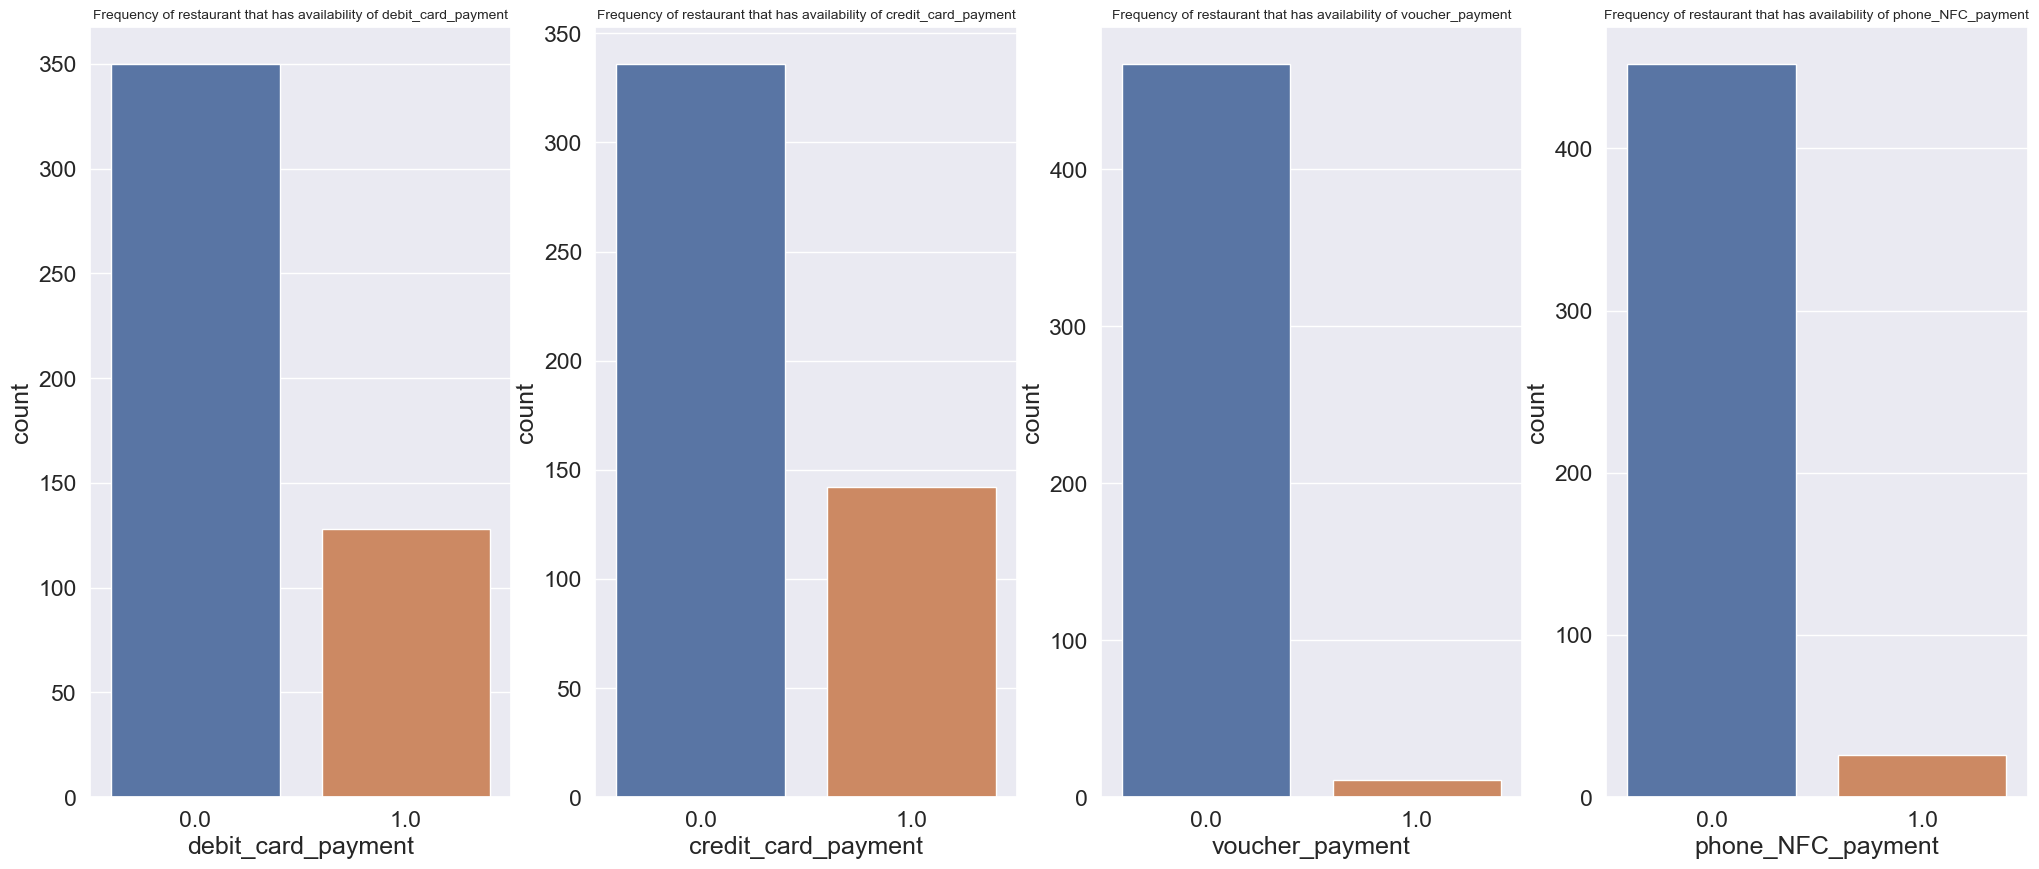

In [206]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25, 10))
sns.set(font_scale = 1.5)

sns.countplot(ax=ax1,data=df1, x='debit_card_payment')
ax1.set_title('Frequency of restaurant that has availability of debit_card_payment',fontsize=10)
sns.countplot(ax=ax2,data=df1, x='credit_card_payment')
ax2.set_title('Frequency of restaurant that has availability of credit_card_payment',fontsize=10)
sns.countplot(ax=ax3,data=df1, x='voucher_payment')
ax3.set_title('Frequency of restaurant that has availability of voucher_payment',fontsize=10)
sns.countplot(ax=ax4,data=df1, x='phone_NFC_payment')
ax4.set_title('Frequency of restaurant that has availability of phone_NFC_payment',fontsize=10)
plt.show()

All condition have relatively low number. But it is not a problem because our goals is determine condition that has contribution in real rating.

Text(0.5, 1.0, 'Distribution of real rating in availability of phone_NFC_payment')

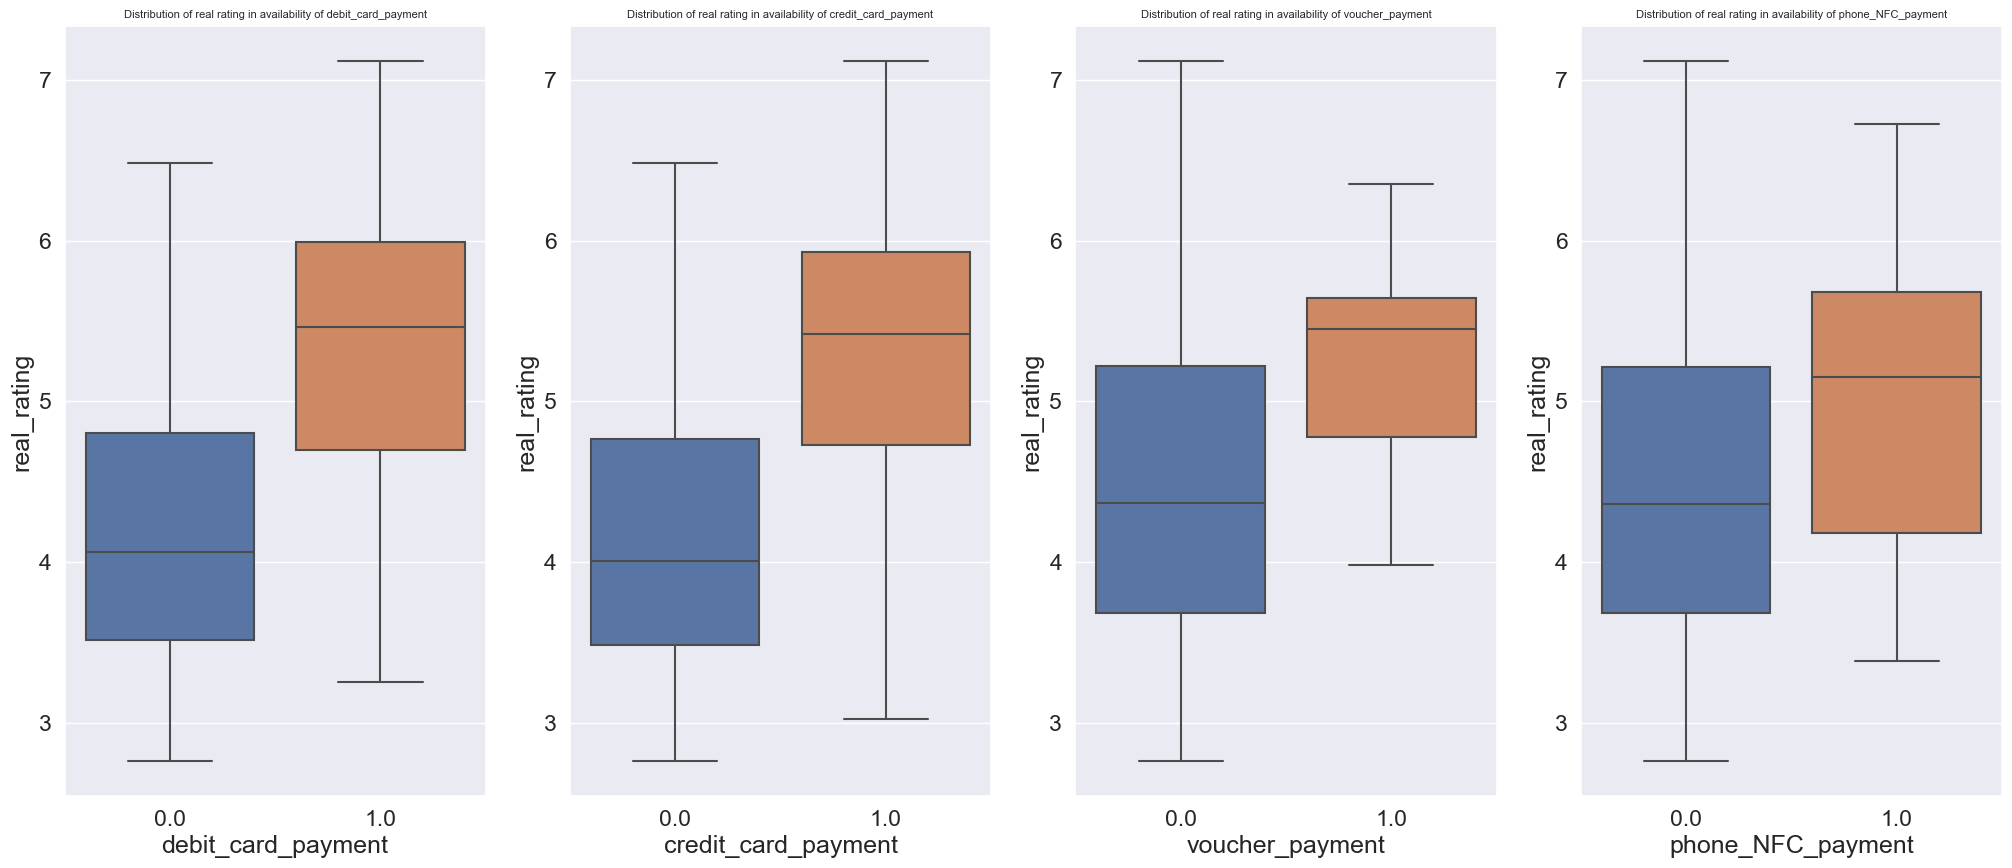

In [207]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25, 10))
sns.set(font_scale = 1.5)
sns.boxplot(ax=ax1,data=df1, x='debit_card_payment',y='real_rating')
ax1.set_title('Distribution of real rating in availability of debit_card_payment',fontsize=8)
sns.boxplot(ax=ax2,data=df1, x='credit_card_payment',y='real_rating')
ax2.set_title('Distribution of real rating in availability of credit_card_payment',fontsize=8)
sns.boxplot(ax=ax3,data=df1, x='voucher_payment', y='real_rating')
ax3.set_title('Distribution of real rating in availability of voucher_payment',fontsize=8)
sns.boxplot(ax=ax4,data=df1, x='phone_NFC_payment', y='real_rating')
ax4.set_title('Distribution of real rating in availability of phone_NFC_payment',fontsize=8)

All condition seems to increase the real rating of the restaurant. We need to make sure that it is statistically significant. We use Generalized linear model to determine which condition is statistically significant to real_rating

Text(0.5, 1.0, 'Regression plot of availability of phone_NFC_payment to real rating')

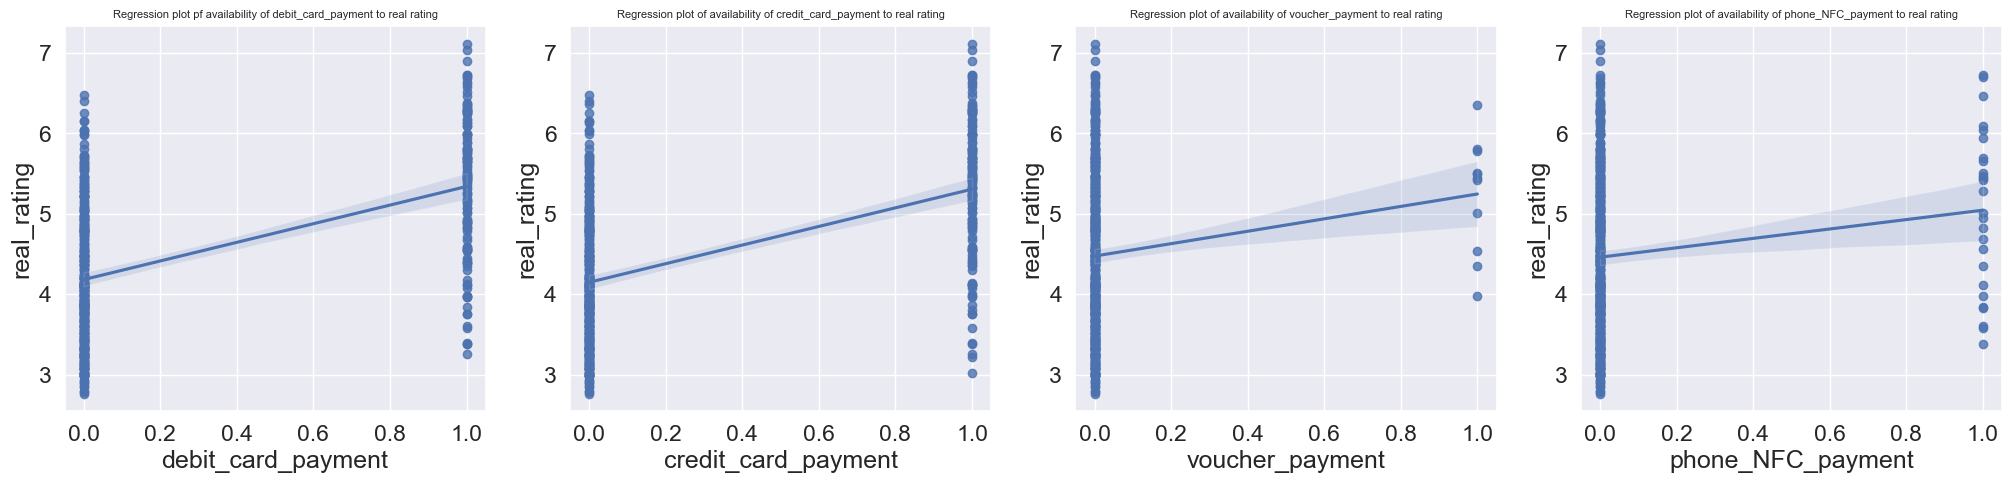

In [306]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25, 5))
sns.set(font_scale = 1.5)
sns.regplot(ax=ax1,data=df1, x='debit_card_payment',y='real_rating')
ax1.set_title('Regression plot pf availability of debit_card_payment to real rating',fontsize=8)
sns.regplot(ax=ax2,data=df1, x='credit_card_payment',y='real_rating')
ax2.set_title('Regression plot of availability of credit_card_payment to real rating',fontsize=8)
sns.regplot(ax=ax3,data=df1, x='voucher_payment', y='real_rating')
ax3.set_title('Regression plot of availability of voucher_payment to real rating',fontsize=8)
sns.regplot(ax=ax4,data=df1, x='phone_NFC_payment', y='real_rating')
ax4.set_title('Regression plot of availability of phone_NFC_payment to real rating',fontsize=8)

In [159]:
X1 = sm.add_constant(df1['debit_card_payment'])
X2 = sm.add_constant(df1['credit_card_payment'])
X3 = sm.add_constant(df1['voucher_payment'])
X4 = sm.add_constant(df1['phone_NFC_payment'])

# Fit the GLM model
model1 = sm.GLM(df1['real_rating'], X1, family=sm.families.Gaussian()).fit()
model2 = sm.GLM(df1['real_rating'], X2, family=sm.families.Gaussian()).fit()
model3 = sm.GLM(df1['real_rating'], X3, family=sm.families.Gaussian()).fit()
model4 = sm.GLM(df1['real_rating'], X4, family=sm.families.Gaussian()).fit()

results1 = model1.summary().tables[1]
results2 = model2.summary().tables[1]
results3 = model3.summary().tables[1]
results4 = model4.summary().tables[1]

print('\n results_debit_rating \n',results1)
print('\n results_credit_rating \n',results2)
print('\n results_voucher_rating \n',results3)
print('\n results_NFC_rating \n',results4)


 results_debit_rating 
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1812      0.045     91.983      0.000       4.092       4.270
debit_card_payment     1.1586      0.088     13.189      0.000       0.986       1.331

 results_credit_rating 
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.1473      0.046     90.469      0.000       4.057       4.237
credit_card_payment     1.1583      0.084     13.772      0.000       0.993       1.323

 results_voucher_rating 
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.4736      0.046     97.958      0.0

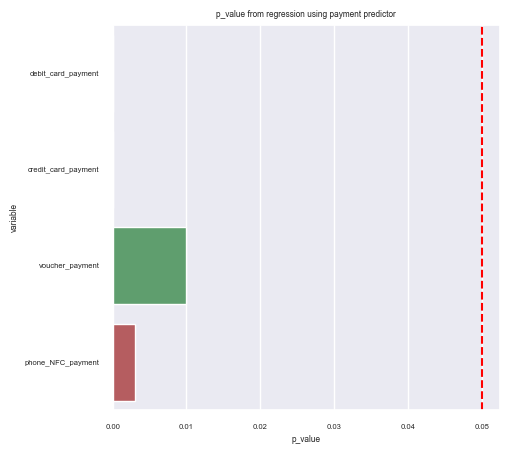

In [321]:
p_value_debit=float(model1.summary().tables[1].data[2][4])
p_value_credit=float(model2.summary().tables[1].data[2][4])
p_value_voucher=float(model3.summary().tables[1].data[2][4])
p_value_nfc=float(model4.summary().tables[1].data[2][4])
var_debit=model1.summary().tables[1].data[2][0]
var_credit=model2.summary().tables[1].data[2][0]
ver_voucher=model3.summary().tables[1].data[2][0]
var_nfc=model4.summary().tables[1].data[2][0]
coeff_debit=float(model1.summary().tables[1].data[2][1])
coeff_credit=float(model2.summary().tables[1].data[2][1])
coeff_voucher=float(model3.summary().tables[1].data[2][1])
coeff_nfc=float(model4.summary().tables[1].data[2][1])
list_p_value_payment=[p_value_debit,p_value_credit,p_value_voucher,p_value_nfc]
list_var_payment=[var_debit,var_credit,ver_voucher,var_nfc]
list_coeff_payment=[coeff_debit,coeff_credit,coeff_voucher,coeff_nfc]
dataframe_result_payment=pd.DataFrame({'variable':list_var_payment,'p_value':list_p_value_payment,'coeff':list_coeff_payment})
fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
sns.set(font_scale = 0.5)
threshold_pvalue=0.05
ax1.axvline(threshold_pvalue, color='red', linestyle='--')
sns.barplot(ax=ax1,data=dataframe_result_payment, y='variable', x='p_value')
plt.title('p_value from regression using payment predictor')
plt.show()


There are enough evidence conclude that debit_card_payment, credit_card_payment ,voucher_payment, phone_NFC_payment increase real rating.

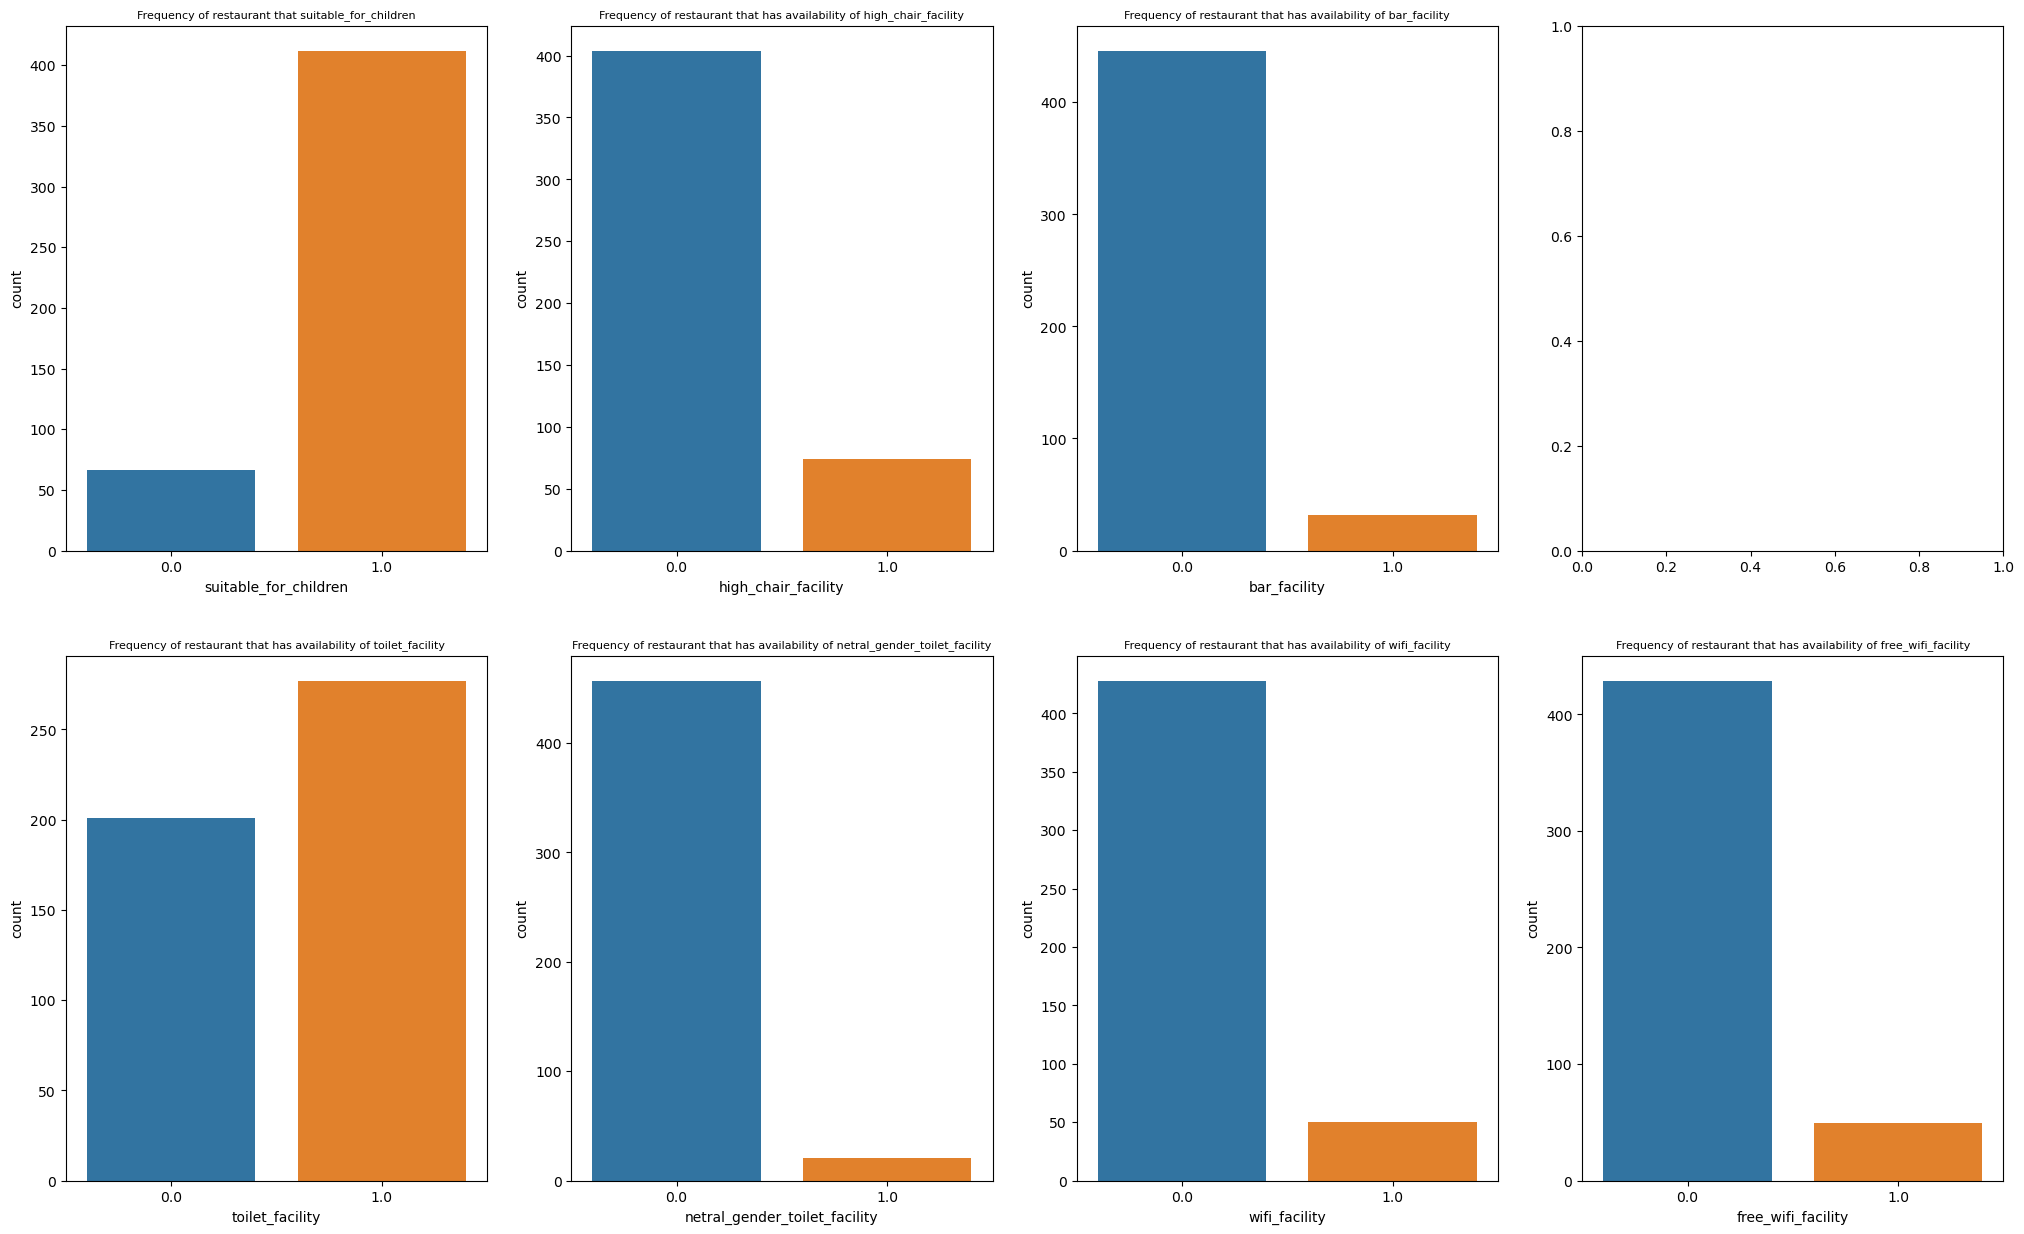

In [161]:
fig, axs = plt.subplots(2, 4, figsize=(25, 15))

sns.countplot(ax=axs[0,0],data=df1, x='suitable_for_children')
axs[0,0].set_title('Frequency of restaurant that suitable_for_children',fontsize=8)
sns.countplot(ax=axs[0,1],data=df1, x='high_chair_facility')
axs[0,1].set_title('Frequency of restaurant that has availability of high_chair_facility',fontsize=8)
sns.countplot(ax=axs[0,2],data=df1, x='bar_facility')
axs[0,2].set_title('Frequency of restaurant that has availability of bar_facility',fontsize=8)
sns.countplot(ax=axs[1,0],data=df1, x='toilet_facility')
axs[1,0].set_title('Frequency of restaurant that has availability of toilet_facility',fontsize=8)
sns.countplot(ax=axs[1,1],data=df1, x='netral_gender_toilet_facility')
axs[1,1].set_title('Frequency of restaurant that has availability of netral_gender_toilet_facility',fontsize=8)
sns.countplot(ax=axs[1,2],data=df1, x='wifi_facility')
axs[1,2].set_title('Frequency of restaurant that has availability of wifi_facility',fontsize=8)
sns.countplot(ax=axs[1,3],data=df1, x='free_wifi_facility')
axs[1,3].set_title('Frequency of restaurant that has availability of free_wifi_facility',fontsize=8)


plt.show()

All condition have relatively low number except suitable_for_children and toilet facility. But it is not a problem because our goals is determine condition that has contribution in real rating.

Text(0.5, 1.0, 'Distribution of real rating in availability of free_wifi_facility')

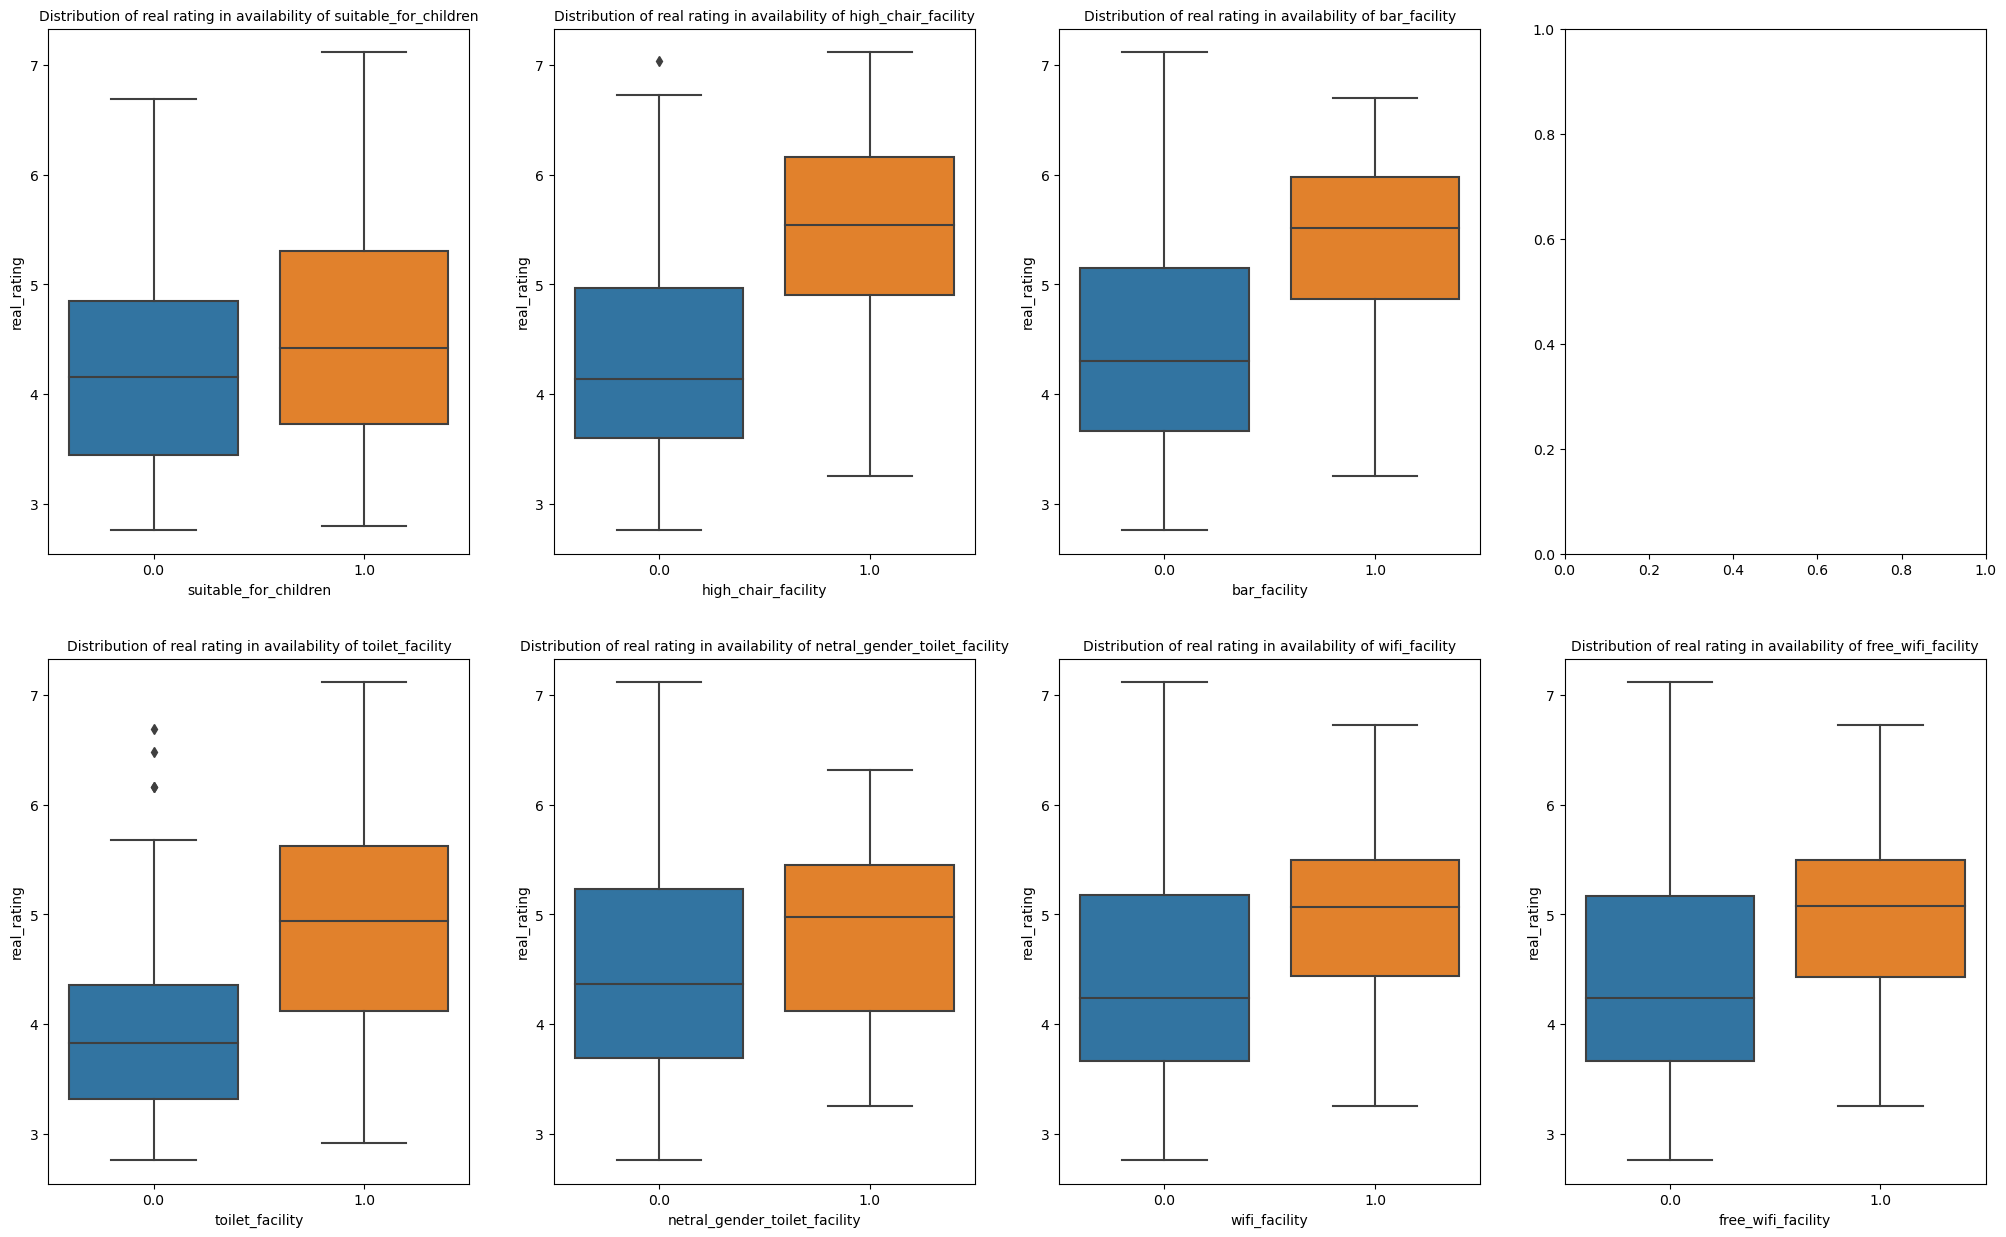

In [162]:
fig,axs = plt.subplots(2, 4, figsize=(25, 15))

sns.boxplot(ax=axs[0,0],data=df1, x='suitable_for_children',y='real_rating')
axs[0,0].set_title('Distribution of real rating in availability of suitable_for_children',fontsize=10)
sns.boxplot(ax=axs[0,1],data=df1, x='high_chair_facility',y='real_rating')
axs[0,1].set_title('Distribution of real rating in availability of high_chair_facility',fontsize=10)
sns.boxplot(ax=axs[0,2],data=df1, x='bar_facility',y='real_rating')
axs[0,2].set_title('Distribution of real rating in availability of bar_facility',fontsize=10)
sns.boxplot(ax=axs[1,0],data=df1, x='toilet_facility',y='real_rating')
axs[1,0].set_title('Distribution of real rating in availability of toilet_facility',fontsize=10)
sns.boxplot(ax=axs[1,1],data=df1, x='netral_gender_toilet_facility',y='real_rating')
axs[1,1].set_title('Distribution of real rating in availability of netral_gender_toilet_facility',fontsize=10)
sns.boxplot(ax=axs[1,2],data=df1, x='wifi_facility',y='real_rating')
axs[1,2].set_title('Distribution of real rating in availability of wifi_facility',fontsize=10)
sns.boxplot(ax=axs[1,3],data=df1, x='free_wifi_facility',y='real_rating')
axs[1,3].set_title('Distribution of real rating in availability of free_wifi_facility',fontsize=10)

All condition seems to increase the real rating of the restaurant. We need to make sure that it is statistically significant. We use Generalized linear model to determine which condition is statistically significant to real_rating

Text(0.5, 1.0, 'Regression plot availability of free_wifi_facility to real rating')

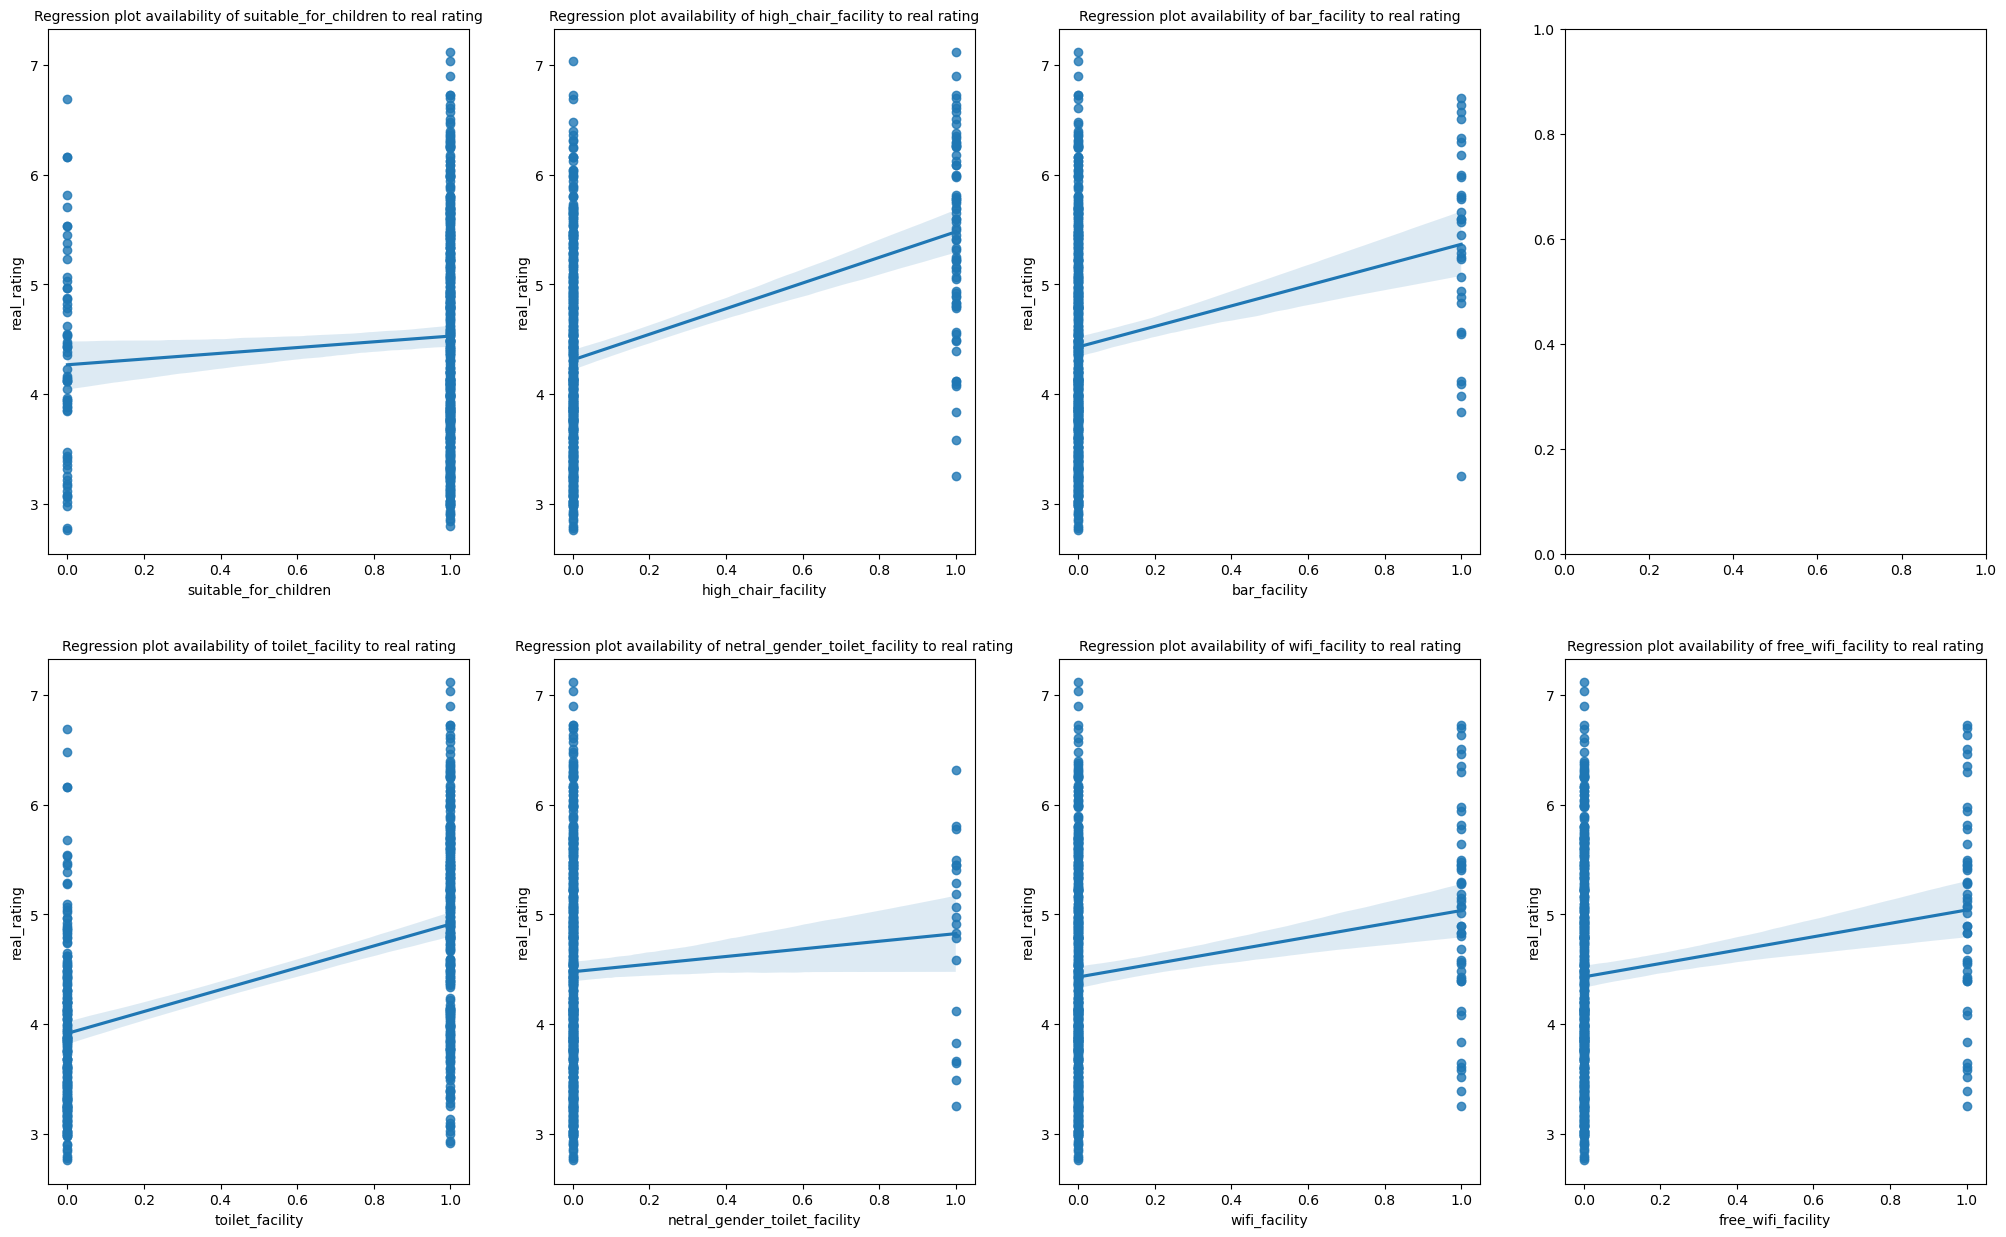

In [163]:
fig, axs = plt.subplots(2, 4, figsize=(25, 15))

sns.regplot(ax=axs[0,0],data=df1, x='suitable_for_children',y='real_rating')
axs[0,0].set_title('Regression plot availability of suitable_for_children to real rating',fontsize=10)
sns.regplot(ax=axs[0,1],data=df1, x='high_chair_facility',y='real_rating')
axs[0,1].set_title('Regression plot availability of high_chair_facility to real rating',fontsize=10)
sns.regplot(ax=axs[0,2],data=df1, x='bar_facility',y='real_rating')
axs[0,2].set_title('Regression plot availability of bar_facility to real rating',fontsize=10)
sns.regplot(ax=axs[1,0],data=df1, x='toilet_facility',y='real_rating')
axs[1,0].set_title('Regression plot availability of toilet_facility to real rating',fontsize=10)
sns.regplot(ax=axs[1,1],data=df1, x='netral_gender_toilet_facility',y='real_rating')
axs[1,1].set_title('Regression plot availability of netral_gender_toilet_facility to real rating',fontsize=10)
sns.regplot(ax=axs[1,2],data=df1, x='wifi_facility',y='real_rating')
axs[1,2].set_title('Regression plot availability of wifi_facility to real rating',fontsize=10)
sns.regplot(ax=axs[1,3],data=df1, x='free_wifi_facility',y='real_rating')
axs[1,3].set_title('Regression plot availability of free_wifi_facility to real rating',fontsize=10)

In [164]:
X5 = sm.add_constant(df1['suitable_for_children'])
X6 = sm.add_constant(df1['high_chair_facility'])
X7 = sm.add_constant(df1['bar_facility'])
X8 = sm.add_constant(df1['toilet_facility'])
X9 = sm.add_constant(df1['netral_gender_toilet_facility'])
X10 = sm.add_constant(df1['wifi_facility'])
X11 = sm.add_constant(df1['free_wifi_facility'])

# Fit the GLM model
model5 = sm.GLM(df1['real_rating'], X5, family=sm.families.Gaussian()).fit()
model6 = sm.GLM(df1['real_rating'], X6, family=sm.families.Gaussian()).fit()
model7 = sm.GLM(df1['real_rating'], X7, family=sm.families.Gaussian()).fit()
model8 = sm.GLM(df1['real_rating'], X8, family=sm.families.Gaussian()).fit()
model9 = sm.GLM(df1['real_rating'], X9, family=sm.families.Gaussian()).fit()
model10 = sm.GLM(df1['real_rating'], X10, family=sm.families.Gaussian()).fit()
model11 = sm.GLM(df1['real_rating'], X11, family=sm.families.Gaussian()).fit()

results5 = model5.summary().tables[1]
results6 = model6.summary().tables[1]
results7 = model7.summary().tables[1]
results8 = model8.summary().tables[1]
results9 = model9.summary().tables[1]
results10 = model10.summary().tables[1]
results11 = model11.summary().tables[1]


print('\n results_suitable_for_children_rating \n',results5)
print('\n results_high_chair_facility_rating \n',results6)
print('\n results_bar_facility_rating \n',results7)
print('\n results_toilet_facility_rating \n',results8)
print('\n results_netral_gender_toilet_facility_rating \n',results9)
print('\n results_wifi_facility_rating \n',results10)
print('\n results_free_wifi_facility_rating \n',results11)


 results_suitable_for_children_rating 
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.2660      0.122     35.021      0.000       4.027       4.505
suitable_for_children     0.2616      0.131      1.994      0.046       0.004       0.519

 results_high_chair_facility_rating 
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.3106      0.045     96.379      0.000       4.223       4.398
high_chair_facility     1.1683      0.114     10.278      0.000       0.946       1.391

 results_bar_facility_rating 
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            

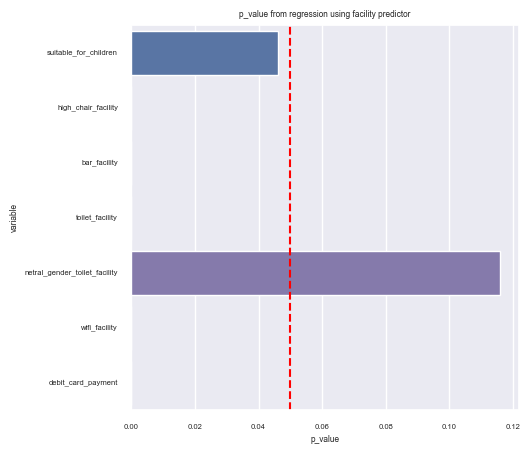

In [323]:
p_value_child=float(model5.summary().tables[1].data[2][4])
p_value_chair=float(model6.summary().tables[1].data[2][4])
p_value_bar=float(model7.summary().tables[1].data[2][4])
p_value_toilet=float(model8.summary().tables[1].data[2][4])
p_value_net_toilet=float(model9.summary().tables[1].data[2][4])
p_value_wifi=float(model10.summary().tables[1].data[2][4])
p_value_free_wifi=float(model1.summary().tables[1].data[2][4])


var_child=model5.summary().tables[1].data[2][0]
var_chair=model6.summary().tables[1].data[2][0]
var_bar=model7.summary().tables[1].data[2][0]
var_toilet=model8.summary().tables[1].data[2][0]
var_net_toilet=model9.summary().tables[1].data[2][0]
var_wifi=model10.summary().tables[1].data[2][0]
var_free_wifi=model1.summary().tables[1].data[2][0]


coeff_child=float(model5.summary().tables[1].data[2][1])
coeff_chair=float(model6.summary().tables[1].data[2][1])
coeff_bar=float(model7.summary().tables[1].data[2][1])
coeff_toilet=float(model8.summary().tables[1].data[2][1])
coeff_net_toilet=float(model9.summary().tables[1].data[2][1])
coeff_wifi=float(model10.summary().tables[1].data[2][1])
coeff_free_wifi=float(model1.summary().tables[1].data[2][1])


list_p_value_payment=[p_value_child,p_value_chair,p_value_bar,p_value_toilet,p_value_net_toilet,p_value_wifi,p_value_free_wifi]
list_var_payment=[var_child,var_chair,var_bar,var_toilet,var_net_toilet,var_wifi,var_free_wifi]
list_coeff_payment=[coeff_child,coeff_chair,coeff_bar,coeff_toilet,coeff_net_toilet,coeff_wifi,coeff_free_wifi]
dataframe_result_facility=pd.DataFrame({'variable':list_var_payment,'p_value':list_p_value_payment,'coeff':list_coeff_payment})
fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
sns.set(font_scale = 0.5)
threshold_pvalue=0.05
ax1.axvline(threshold_pvalue, color='red', linestyle='--')
sns.barplot(ax=ax1,data=dataframe_result_facility, y='variable', x='p_value')
plt.title('p_value from regression using facility predictor')
plt.show()

There are enough evidence conclude that high_chair_facility, bar_facility ,toilet_facility, wifi_facility, free_wifi_facility, suitable_for_children  increase real rating.

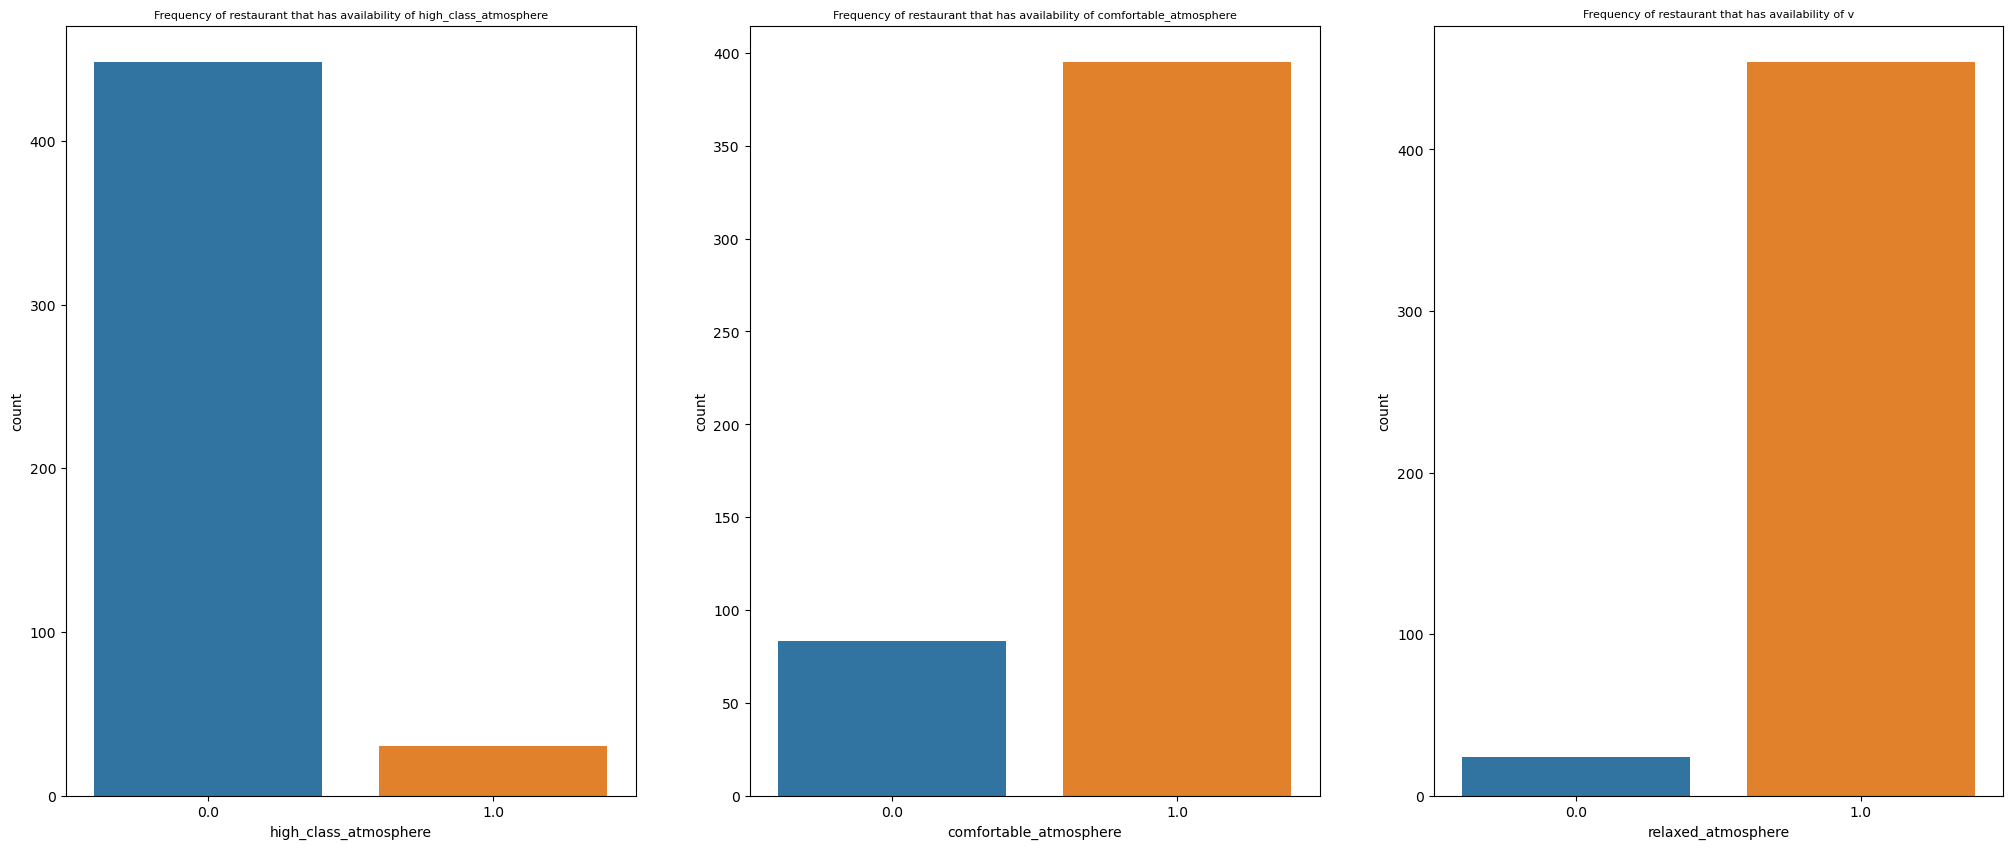

In [183]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 10))

sns.countplot(ax=ax1,data=df1, x='high_class_atmosphere')
ax1.set_title('Frequency of restaurant that has availability of high_class_atmosphere',fontsize=8)
sns.countplot(ax=ax2,data=df1, x='comfortable_atmosphere')
ax2.set_title('Frequency of restaurant that has availability of comfortable_atmosphere',fontsize=8)
sns.countplot(ax=ax3,data=df1, x='relaxed_atmosphere')
ax3.set_title('Frequency of restaurant that has availability of v',fontsize=8)

plt.show()

Text(0.5, 1.0, 'Distribution of real rating in availability of relaxed atmosphere')

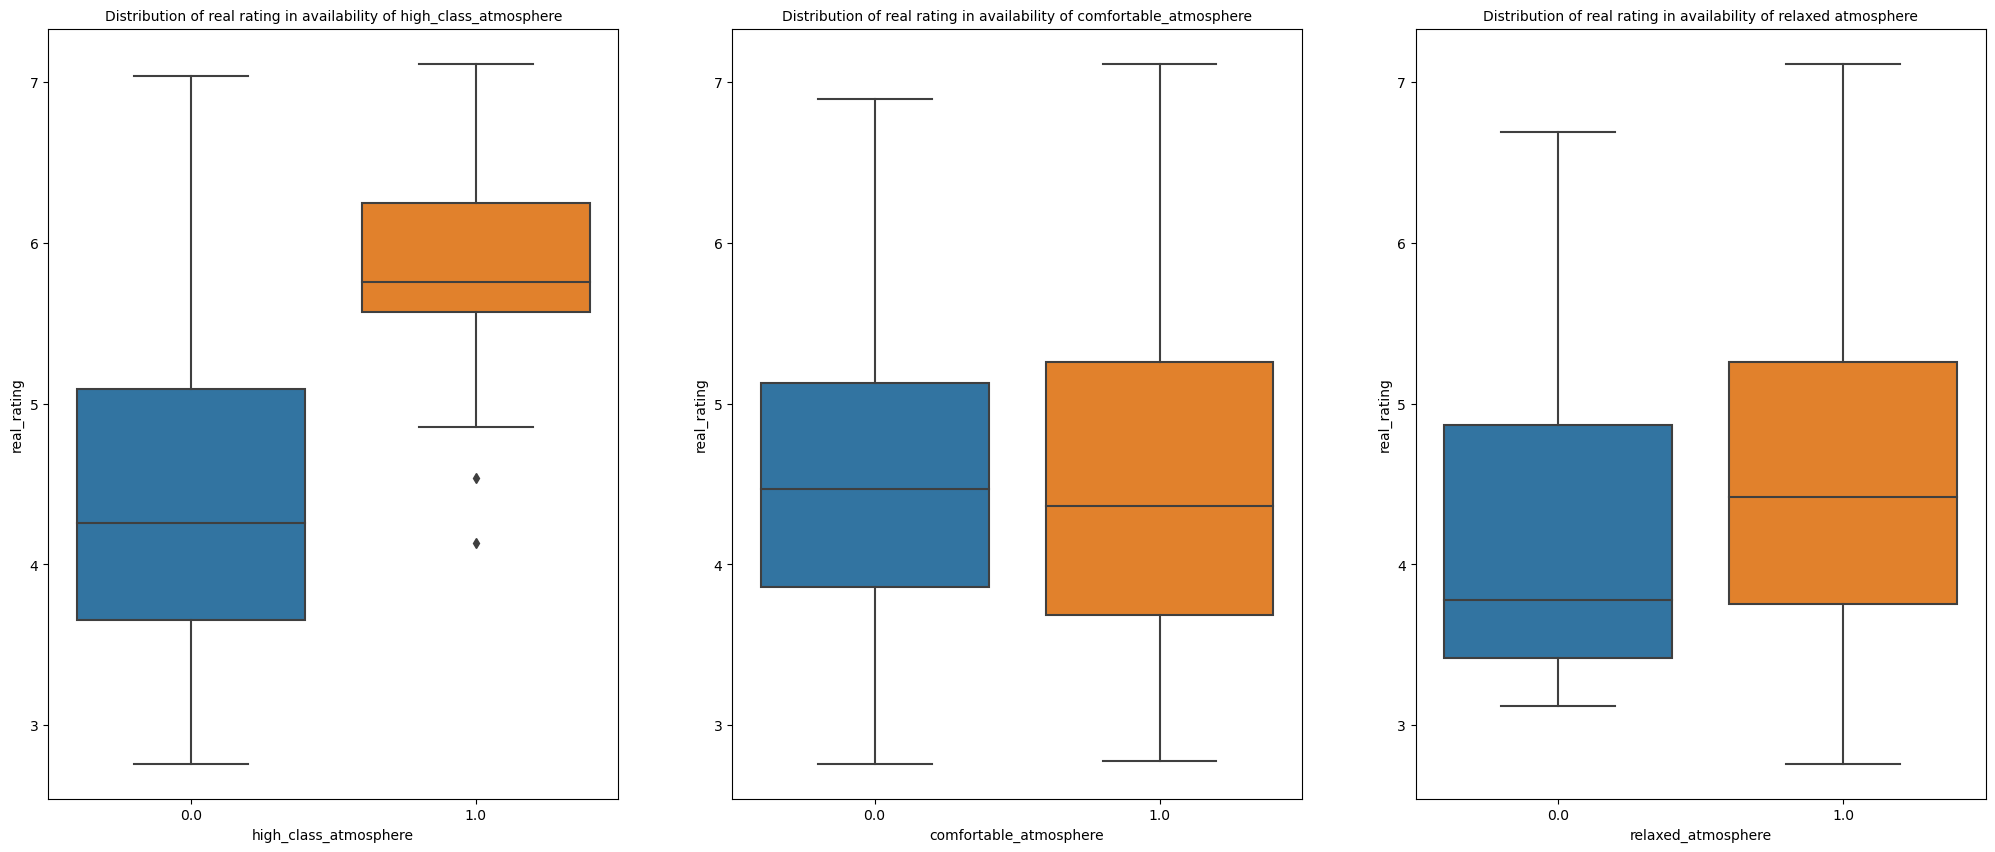

In [184]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(25, 10))

sns.boxplot(ax=ax1,data=df1, x='high_class_atmosphere',y='real_rating')
ax1.set_title('Distribution of real rating in availability of high_class_atmosphere',fontsize=10)
sns.boxplot(ax=ax2,data=df1, x='comfortable_atmosphere',y='real_rating')
ax2.set_title('Distribution of real rating in availability of comfortable_atmosphere',fontsize=10)
sns.boxplot(ax=ax3,data=df1, x='relaxed_atmosphere',y='real_rating')
ax3.set_title('Distribution of real rating in availability of relaxed atmosphere',fontsize=10)


Text(0.5, 1.0, 'Regression plot of availability of relaxed atmosphere to real rating')

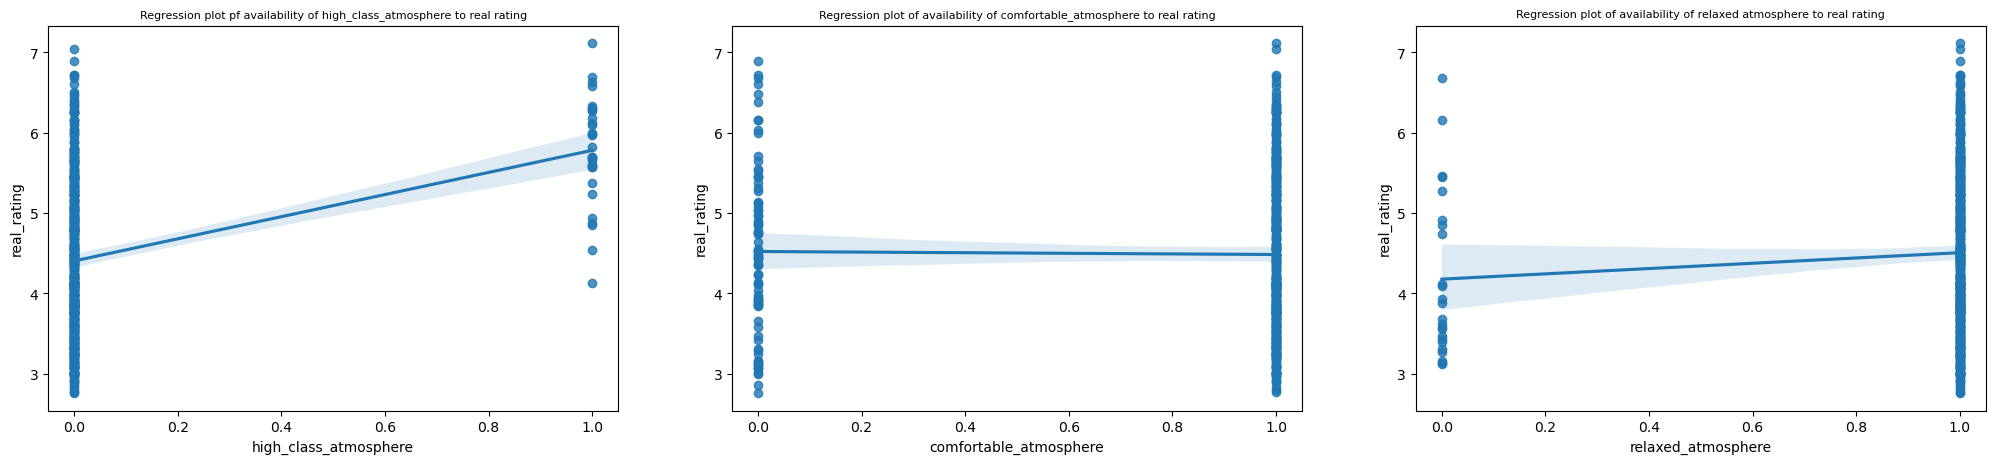

In [58]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 5))
sns.regplot(ax=ax1,data=df1, x='high_class_atmosphere',y='real_rating')
ax1.set_title('Regression plot pf availability of high_class_atmosphere to real rating',fontsize=8)
sns.regplot(ax=ax2,data=df1, x='comfortable_atmosphere',y='real_rating')
ax2.set_title('Regression plot of availability of comfortable_atmosphere to real rating',fontsize=8)
sns.regplot(ax=ax3,data=df1, x='relaxed_atmosphere', y='real_rating')
ax3.set_title('Regression plot of availability of relaxed atmosphere to real rating',fontsize=8)

In [167]:
X12 = sm.add_constant(df1['high_class_atmosphere'])
X13 = sm.add_constant(df1['comfortable_atmosphere'])
X14 = sm.add_constant(df1['relaxed_atmosphere'])


# Fit the GLM model
model12 = sm.GLM(df1['real_rating'], X12, family=sm.families.Gaussian()).fit()
model13 = sm.GLM(df1['real_rating'], X13, family=sm.families.Gaussian()).fit()
model14 = sm.GLM(df1['real_rating'], X14, family=sm.families.Gaussian()).fit()


results12 = model12.summary().tables[1]
results13 = model13.summary().tables[1]
results14 = model14.summary().tables[1]


print('\n results_high_class_atmosphere_rating \n',results12)
print('\n results_comfortable_atmosphere_rating \n',results13)
print('\n results_relaxed atmosphere_rating \n',results14)



 results_high_class_atmosphere_rating 
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.4050      0.044     99.644      0.000       4.318       4.492
high_class_atmosphere     1.3766      0.176      7.801      0.000       1.031       1.722

 results_comfortable_atmosphere_rating 
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4.5224      0.109     41.465      0.000       4.309       4.736
comfortable_atmosphere    -0.0374      0.120     -0.312      0.755      -0.273       0.198

 results_relaxed atmosphere_rating 
                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

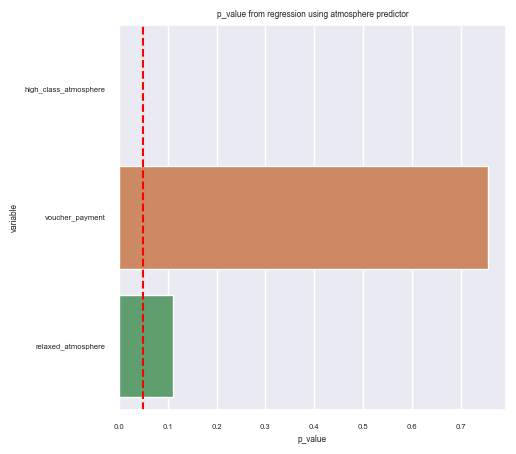

In [326]:
p_value_highclass=float(model12.summary().tables[1].data[2][4])
p_value_comfort=float(model13.summary().tables[1].data[2][4])
p_value_relax=float(model14.summary().tables[1].data[2][4])


var_highclass=model12.summary().tables[1].data[2][0]
var_comfort=model3.summary().tables[1].data[2][0]
ver_relax=model14.summary().tables[1].data[2][0]


coeff_highclass=float(model12.summary().tables[1].data[2][1])
coeff_comfort=float(model13.summary().tables[1].data[2][1])
coeff_relax=float(model14.summary().tables[1].data[2][1])


list_p_value_payment=[p_value_highclass,p_value_comfort,p_value_relax]
list_var_payment=[var_highclass,var_comfort,ver_relax]
list_coeff_payment=[coeff_highclass,coeff_comfort,coeff_relax]

dataframe_result_atmosphere=pd.DataFrame({'variable':list_var_payment,'p_value':list_p_value_payment,'coeff':list_coeff_payment})
fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
sns.set(font_scale = 0.5)
threshold_pvalue=0.05
ax1.axvline(threshold_pvalue, color='red', linestyle='--')
sns.barplot(ax=ax1,data=dataframe_result_atmosphere, y='variable', x='p_value')
plt.title('p_value from regression using atmosphere predictor')
plt.show()


There are enough evidence conclude that high_class_atmosphere increases real rating.

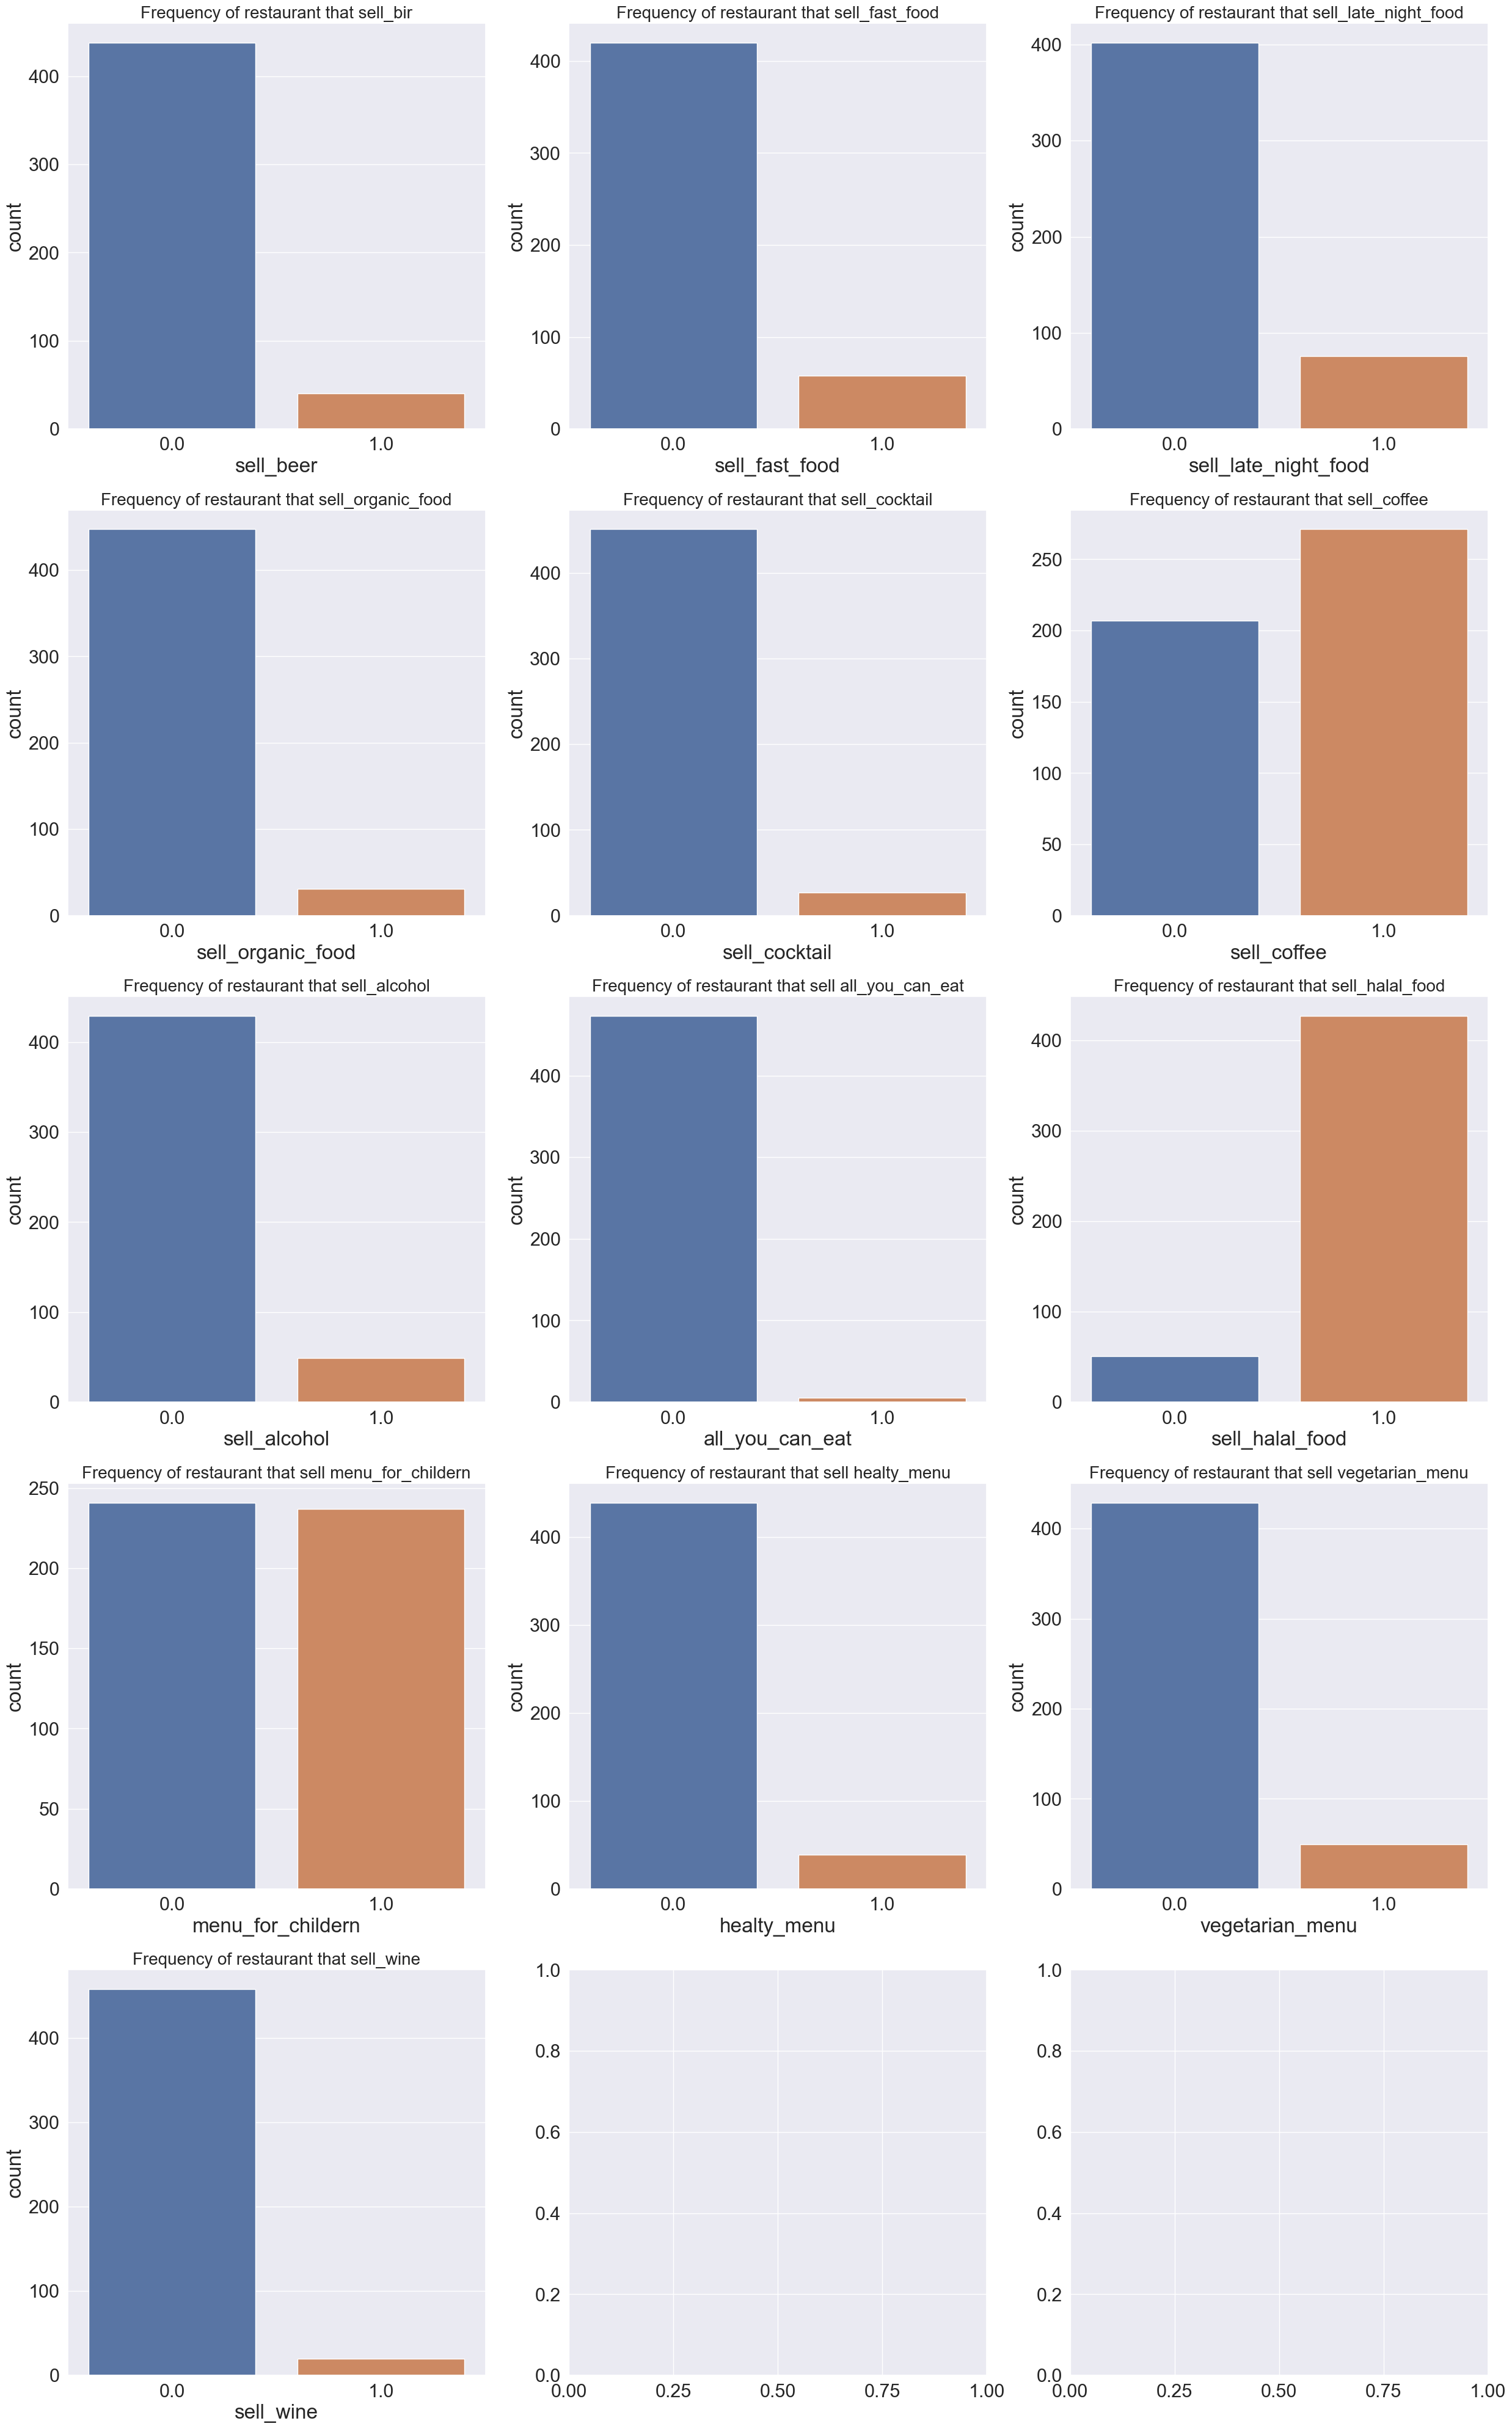

In [215]:
fig, axs = plt.subplots(5, 3, figsize=(30, 50))
sns.set(font_scale = 3)

sns.countplot(ax=axs[0,0],data=df1, x='sell_beer')
axs[0,0].set_title('Frequency of restaurant that sell_bir',fontsize=20)
sns.countplot(ax=axs[0,1],data=df1, x='sell_fast_food')
axs[0,1].set_title('Frequency of restaurant that sell_fast_food',fontsize=20)
sns.countplot(ax=axs[0,2],data=df1, x='sell_late_night_food')
axs[0,2].set_title('Frequency of restaurant that sell_late_night_food',fontsize=20)
sns.countplot(ax=axs[1,0],data=df1, x='sell_organic_food')
axs[1,0].set_title('Frequency of restaurant that sell_organic_food',fontsize=20)
sns.countplot(ax=axs[1,1],data=df1, x='sell_cocktail')
axs[1,1].set_title('Frequency of restaurant that sell_cocktail',fontsize=20)
sns.countplot(ax=axs[1,2],data=df1, x='sell_coffee')
axs[1,2].set_title('Frequency of restaurant that sell_coffee',fontsize=20)
sns.countplot(ax=axs[2,0],data=df1, x='sell_alcohol')
axs[2,0].set_title('Frequency of restaurant that sell_alcohol',fontsize=20)
sns.countplot(ax=axs[2,1],data=df1, x='all_you_can_eat')
axs[2,1].set_title('Frequency of restaurant that sell all_you_can_eat',fontsize=20)
sns.countplot(ax=axs[2,2],data=df1, x='sell_halal_food')
axs[2,2].set_title('Frequency of restaurant that sell_halal_food',fontsize=20)
sns.countplot(ax=axs[3,0],data=df1, x='menu_for_childern')
axs[3,0].set_title('Frequency of restaurant that sell menu_for_childern',fontsize=20)
sns.countplot(ax=axs[3,1],data=df1, x='healty_menu')
axs[3,1].set_title('Frequency of restaurant that sell healty_menu',fontsize=20)
sns.countplot(ax=axs[3,2],data=df1, x='vegetarian_menu')
axs[3,2].set_title('Frequency of restaurant that sell vegetarian_menu',fontsize=20)
sns.countplot(ax=axs[4,0],data=df1, x='sell_wine')
axs[4,0].set_title('Frequency of restaurant that sell_wine',fontsize=20)


plt.show()

Text(0.5, 1.0, 'Distribution of real rating in availability of sell_wine')

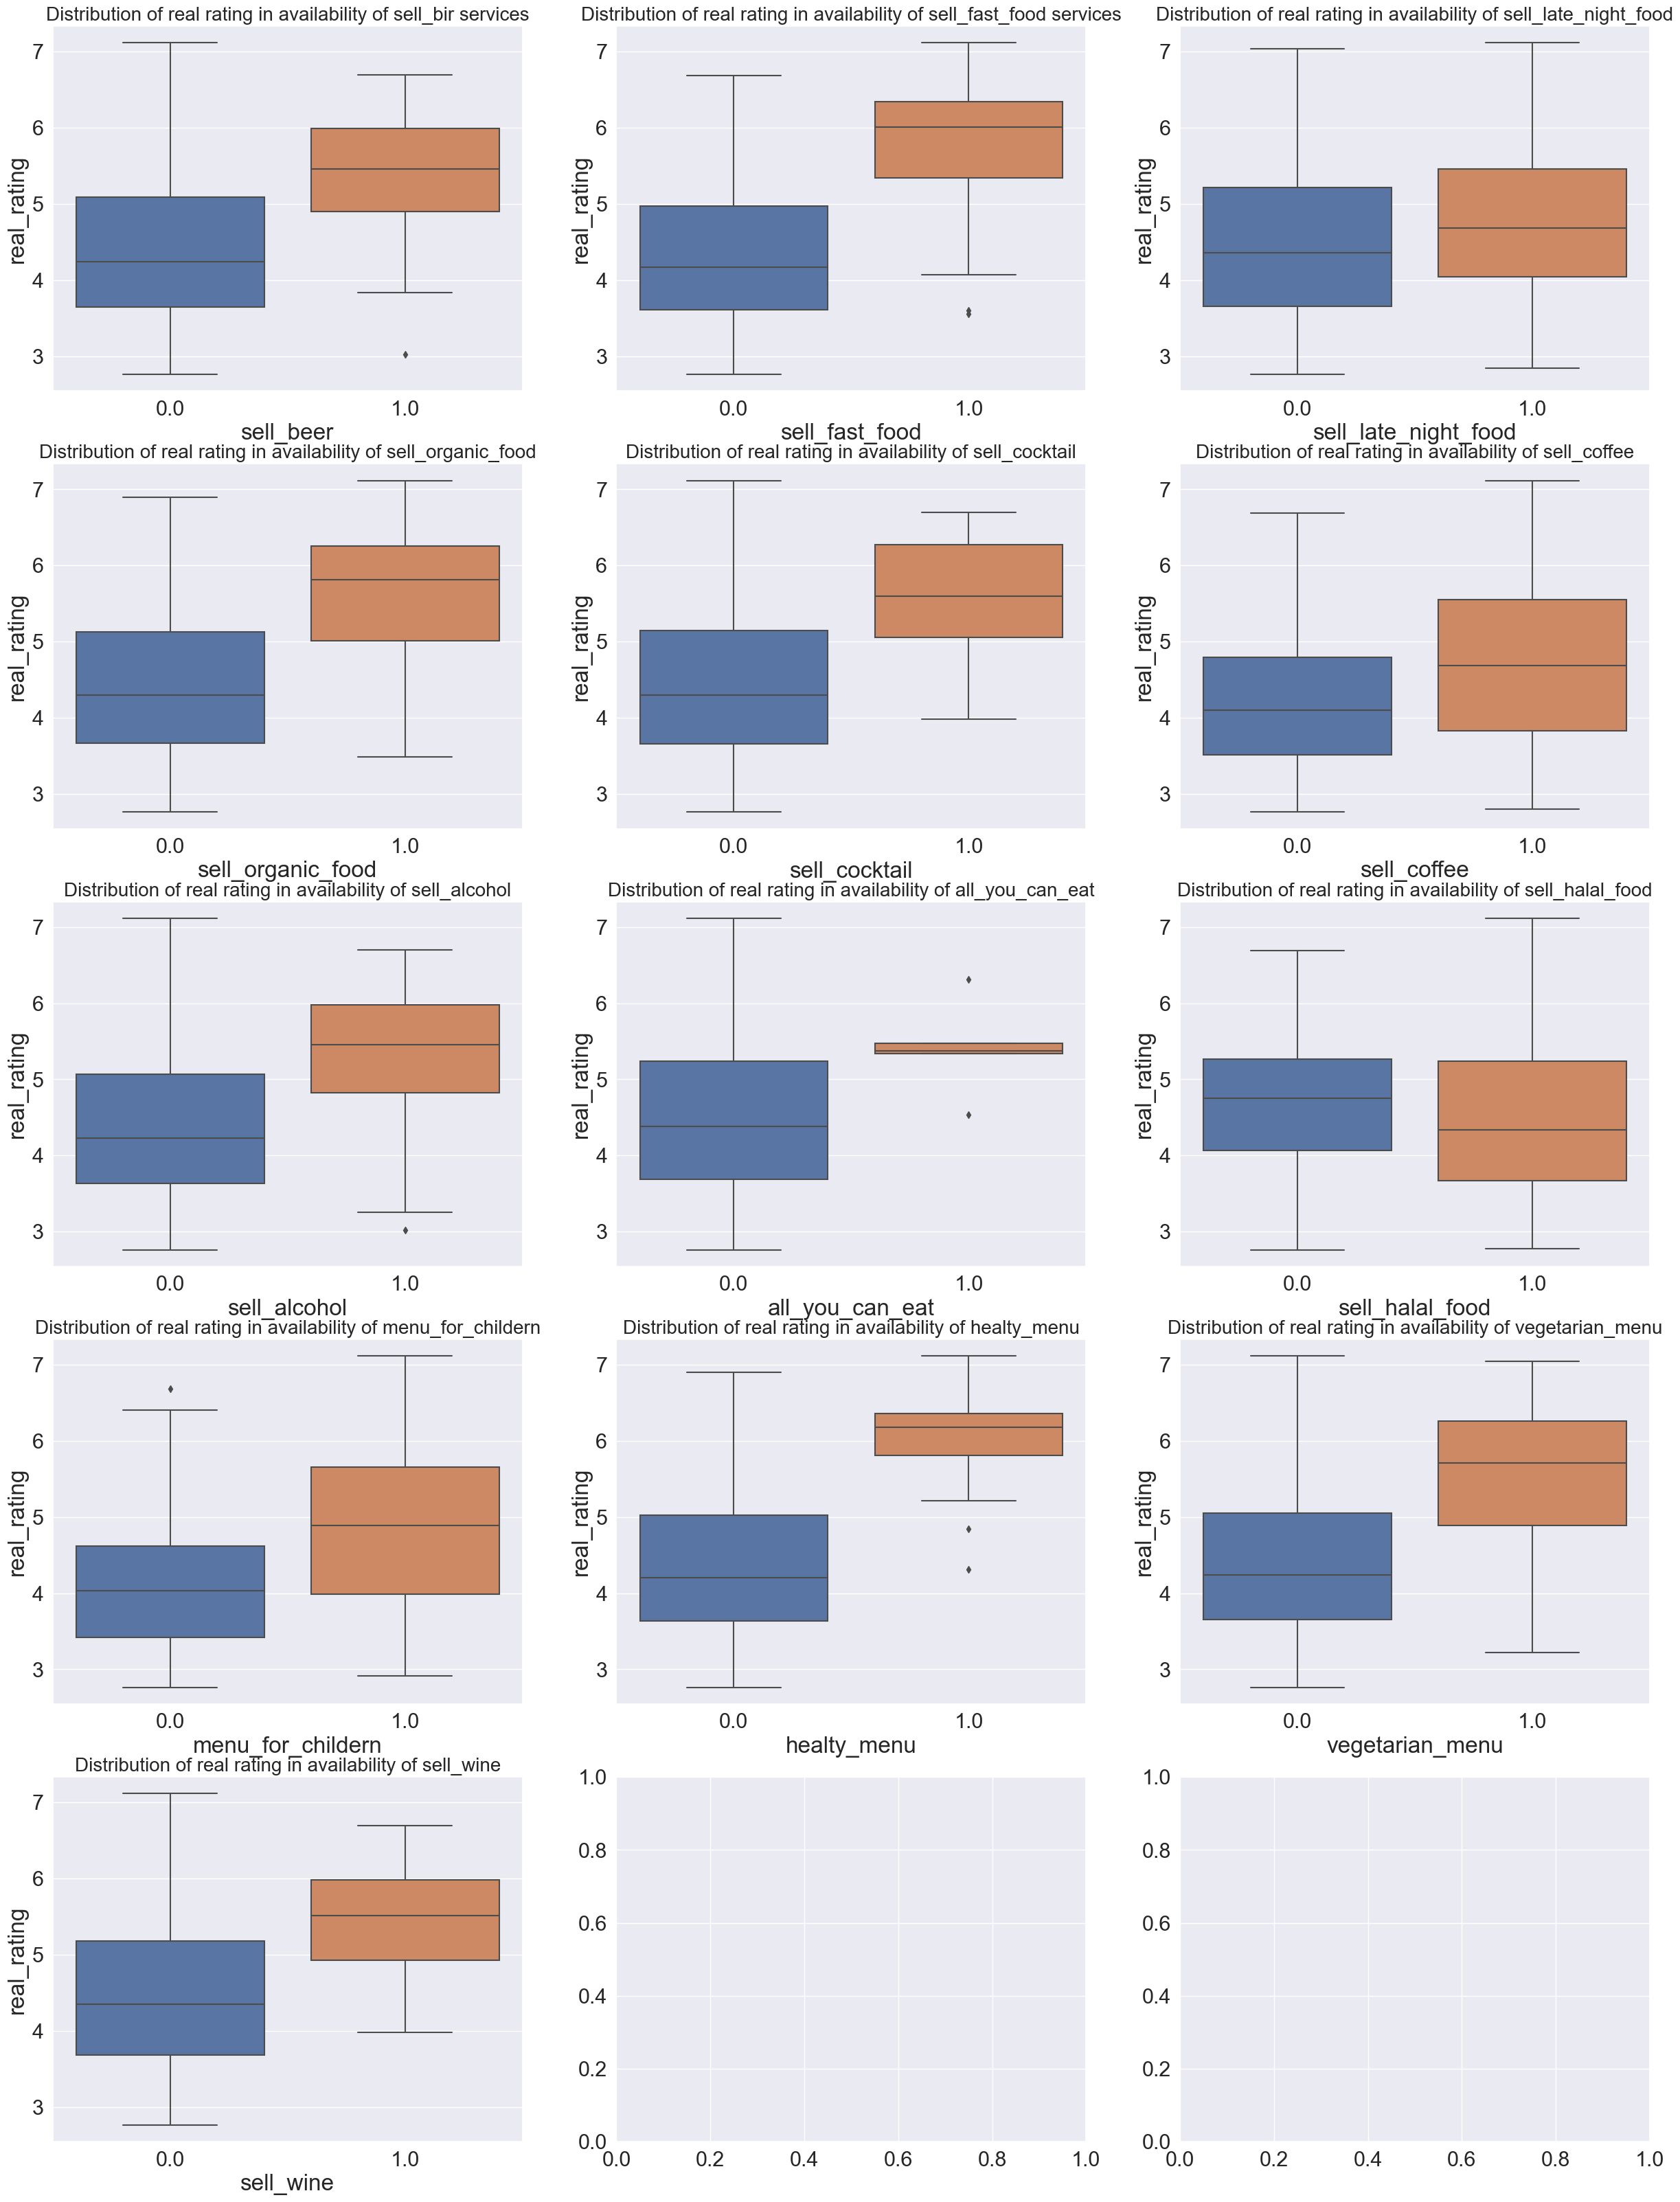

In [224]:
fig, axs = plt.subplots(5, 3, figsize=(30, 40))

sns.set(font_scale = 0.75)

sns.boxplot(ax=axs[0,0],data=df1, x='sell_beer',y='real_rating')
axs[0,0].set_title('Distribution of real rating in availability of sell_bir services',fontsize=20)
sns.boxplot(ax=axs[0,1],data=df1, x='sell_fast_food',y='real_rating')
axs[0,1].set_title('Distribution of real rating in availability of sell_fast_food services',fontsize=20)
sns.boxplot(ax=axs[0,2],data=df1, x='sell_late_night_food',y='real_rating')
axs[0,2].set_title('Distribution of real rating in availability of sell_late_night_food',fontsize=20)
sns.boxplot(ax=axs[1,0],data=df1, x='sell_organic_food',y='real_rating')
axs[1,0].set_title('Distribution of real rating in availability of sell_organic_food',fontsize=20)
sns.boxplot(ax=axs[1,1],data=df1, x='sell_cocktail',y='real_rating')
axs[1,1].set_title('Distribution of real rating in availability of sell_cocktail',fontsize=20)
sns.boxplot(ax=axs[1,2],data=df1, x='sell_coffee',y='real_rating')
axs[1,2].set_title('Distribution of real rating in availability of sell_coffee',fontsize=20)
sns.boxplot(ax=axs[2,0],data=df1, x='sell_alcohol',y='real_rating')
axs[2,0].set_title('Distribution of real rating in availability of sell_alcohol',fontsize=20)
sns.boxplot(ax=axs[2,1],data=df1, x='all_you_can_eat',y='real_rating')
axs[2,1].set_title('Distribution of real rating in availability of all_you_can_eat',fontsize=20)
sns.boxplot(ax=axs[2,2],data=df1, x='sell_halal_food',y='real_rating')
axs[2,2].set_title('Distribution of real rating in availability of sell_halal_food',fontsize=20)
sns.boxplot(ax=axs[3,0],data=df1, x='menu_for_childern',y='real_rating')
axs[3,0].set_title('Distribution of real rating in availability of menu_for_childern',fontsize=20)
sns.boxplot(ax=axs[3,1],data=df1, x='healty_menu',y='real_rating')
axs[3,1].set_title('Distribution of real rating in availability of healty_menu',fontsize=20)
sns.boxplot(ax=axs[3,2],data=df1, x='vegetarian_menu',y='real_rating')
axs[3,2].set_title('Distribution of real rating in availability of vegetarian_menu',fontsize=20)
sns.boxplot(ax=axs[4,0],data=df1, x='sell_wine',y='real_rating')
axs[4,0].set_title('Distribution of real rating in availability of sell_wine',fontsize=20)

Text(0.5, 1.0, 'Regression plot availability of sell_wine to real rating')

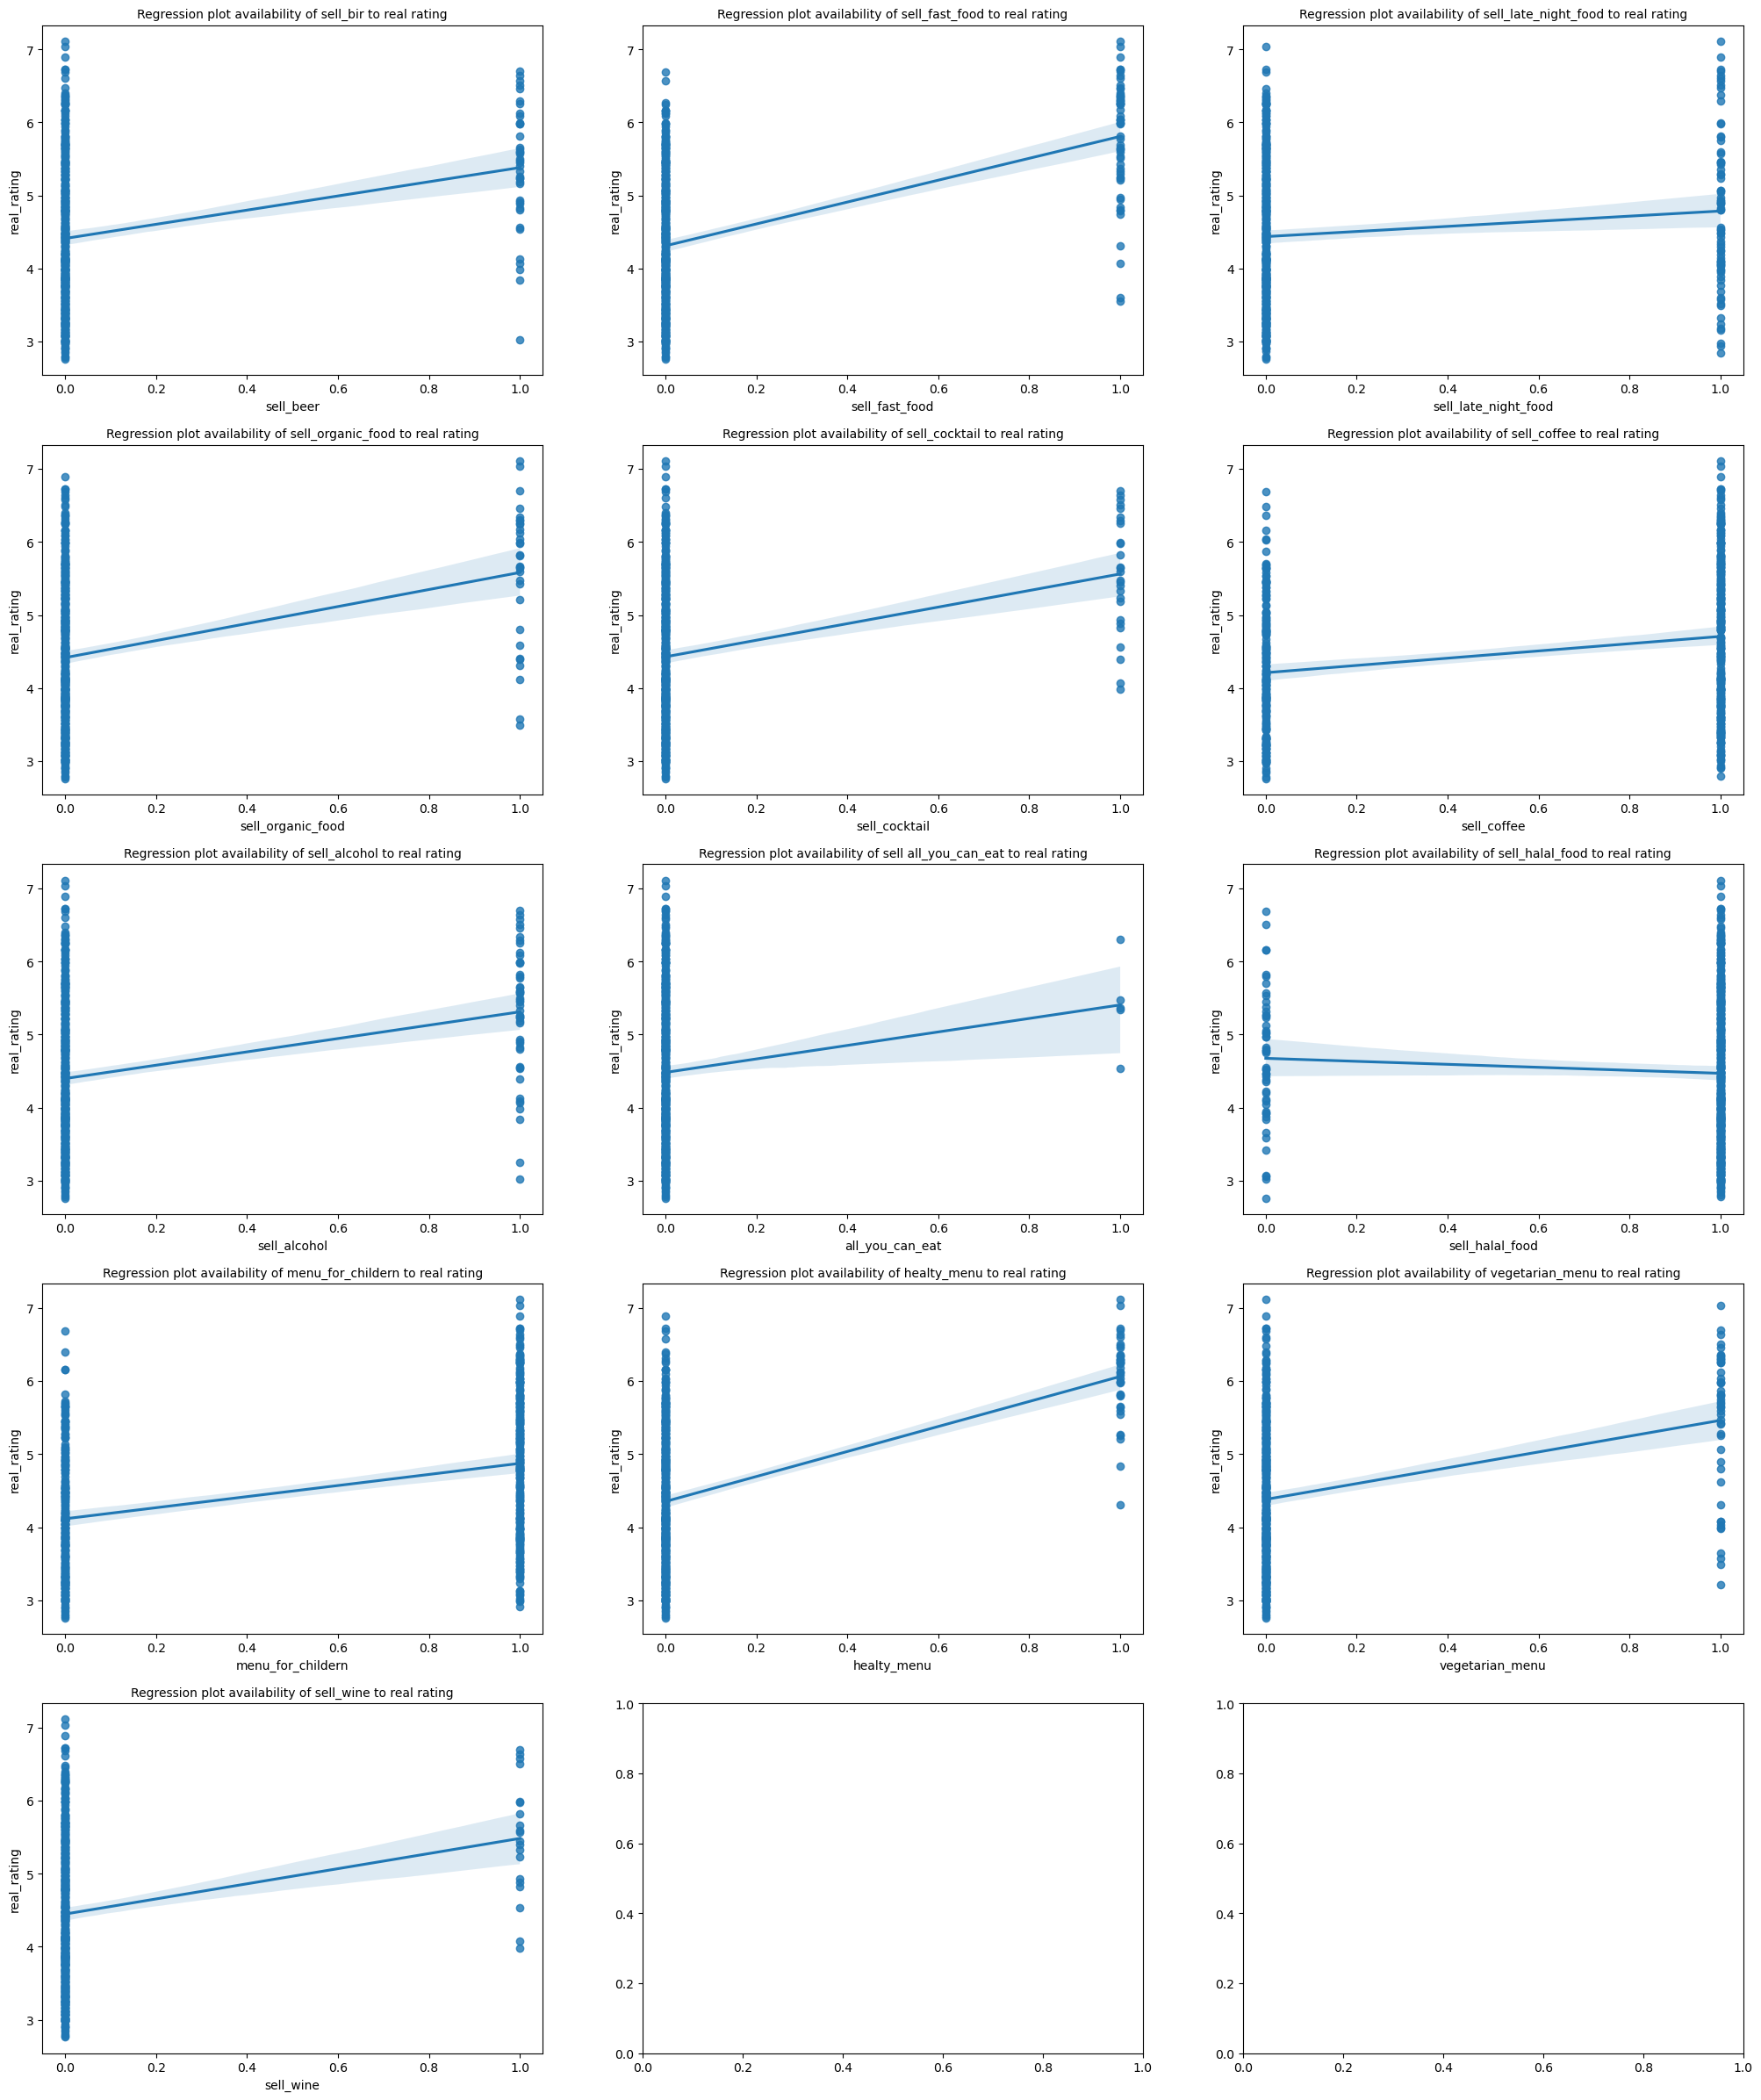

In [169]:
fig, axs = plt.subplots(5, 3, figsize=(25, 30))

sns.regplot(ax=axs[0,0],data=df1, x='sell_beer',y='real_rating')
axs[0,0].set_title('Regression plot availability of sell_bir to real rating',fontsize=10)
sns.regplot(ax=axs[0,1],data=df1, x='sell_fast_food',y='real_rating')
axs[0,1].set_title('Regression plot availability of sell_fast_food to real rating',fontsize=10)
sns.regplot(ax=axs[0,2],data=df1, x='sell_late_night_food',y='real_rating')
axs[0,2].set_title('Regression plot availability of sell_late_night_food to real rating',fontsize=10)
sns.regplot(ax=axs[1,0],data=df1, x='sell_organic_food',y='real_rating')
axs[1,0].set_title('Regression plot availability of sell_organic_food to real rating',fontsize=10)
sns.regplot(ax=axs[1,1],data=df1, x='sell_cocktail',y='real_rating')
axs[1,1].set_title('Regression plot availability of sell_cocktail to real rating',fontsize=10)
sns.regplot(ax=axs[1,2],data=df1, x='sell_coffee',y='real_rating')
axs[1,2].set_title('Regression plot availability of sell_coffee to real rating',fontsize=10)
sns.regplot(ax=axs[2,0],data=df1, x='sell_alcohol',y='real_rating')
axs[2,0].set_title('Regression plot availability of sell_alcohol to real rating',fontsize=10)
sns.regplot(ax=axs[2,1],data=df1, x='all_you_can_eat',y='real_rating')
axs[2,1].set_title('Regression plot availability of sell all_you_can_eat to real rating',fontsize=10)
sns.regplot(ax=axs[2,2],data=df1, x='sell_halal_food',y='real_rating')
axs[2,2].set_title('Regression plot availability of sell_halal_food to real rating',fontsize=10)
sns.regplot(ax=axs[3,0],data=df1, x='menu_for_childern',y='real_rating')
axs[3,0].set_title('Regression plot availability of menu_for_childern to real rating',fontsize=10)
sns.regplot(ax=axs[3,1],data=df1, x='healty_menu',y='real_rating')
axs[3,1].set_title('Regression plot availability of healty_menu to real rating',fontsize=10)
sns.regplot(ax=axs[3,2],data=df1, x='vegetarian_menu',y='real_rating')
axs[3,2].set_title('Regression plot availability of vegetarian_menu to real rating',fontsize=10)
sns.regplot(ax=axs[4,0],data=df1, x='sell_wine',y='real_rating')
axs[4,0].set_title('Regression plot availability of sell_wine to real rating',fontsize=10)

In [170]:
X15 = sm.add_constant(df1['sell_beer'])
X16 = sm.add_constant(df1['sell_fast_food'])
X17 = sm.add_constant(df1['sell_late_night_food'])
X18 = sm.add_constant(df1['sell_organic_food'])
X19 = sm.add_constant(df1['sell_cocktail'])
X20 = sm.add_constant(df1['sell_coffee'])
X21 = sm.add_constant(df1['sell_alcohol'])
X22 = sm.add_constant(df1['all_you_can_eat'])
X23 = sm.add_constant(df1['sell_halal_food'])
X24 = sm.add_constant(df1['menu_for_childern'])
X25 = sm.add_constant(df1['healty_menu'])
X26 = sm.add_constant(df1['vegetarian_menu'])
X27 = sm.add_constant(df1['sell_wine'])


# Fit the GLM model
model15 = sm.GLM(df1['real_rating'], X15, family=sm.families.Gaussian()).fit()
model16 = sm.GLM(df1['real_rating'], X16, family=sm.families.Gaussian()).fit()
model17 = sm.GLM(df1['real_rating'], X17, family=sm.families.Gaussian()).fit()
model18 = sm.GLM(df1['real_rating'], X18, family=sm.families.Gaussian()).fit()
model19 = sm.GLM(df1['real_rating'], X19, family=sm.families.Gaussian()).fit()
model20 = sm.GLM(df1['real_rating'], X20, family=sm.families.Gaussian()).fit()
model21 = sm.GLM(df1['real_rating'], X21, family=sm.families.Gaussian()).fit()
model22 = sm.GLM(df1['real_rating'], X22, family=sm.families.Gaussian()).fit()
model23 = sm.GLM(df1['real_rating'], X23, family=sm.families.Gaussian()).fit()
model24 = sm.GLM(df1['real_rating'], X24, family=sm.families.Gaussian()).fit()
model25 = sm.GLM(df1['real_rating'], X25, family=sm.families.Gaussian()).fit()
model26 = sm.GLM(df1['real_rating'], X26, family=sm.families.Gaussian()).fit()
model27 = sm.GLM(df1['real_rating'], X26, family=sm.families.Gaussian()).fit()

results15 = model15.summary().tables[1]
results16 = model16.summary().tables[1]
results17 = model17.summary().tables[1]
results18 = model18.summary().tables[1]
results19 = model19.summary().tables[1]
results20 = model20.summary().tables[1]
results21 = model21.summary().tables[1]
results22 = model22.summary().tables[1]
results23 = model23.summary().tables[1]
results24 = model24.summary().tables[1]
results25 = model25.summary().tables[1]
results26 = model26.summary().tables[1]
results27 = model26.summary().tables[1]

p_value15=results15.data[2][4]
p_value16=results16.data[2][4]
p_value17=results17.data[2][4]
p_value18=results18.data[2][4]
p_value19=results19.data[2][4]
p_value20=results20.data[2][4]
p_value21=results21.data[2][4]
p_value22=results22.data[2][4]
p_value23=results23.data[2][4]
p_value24=results24.data[2][4]
p_value25=results25.data[2][4]
p_value26=results26.data[2][4]
p_value27=results27.data[2][4]



print('\n results_sell_bir_rating \n',results15)
print('p_value = ',p_value15)
print('\n results_sell_fast_food_rating \n',results16)
print('p_value = ',p_value16)
print('\n results_sell_late_night_food_rating \n',results17)
print('p_value = ',p_value17)
print('\n results_sell_organic_food_rating \n',results18)
print('p_value = ',p_value18)
print('\n results_sell_cocktail_rating \n',results19)
print('p_value = ',p_value19)
print('\n results_sell_coffee_rating \n',results20)
print('p_value = ',p_value20)
print('\n results_free_sell_alcohol_rating \n',results21)
print('p_value = ',p_value21)
print('\n results_all_you_can_eat_rating \n',results22)
print('p_value = ',p_value22)
print('\n results_sell_halal_food_rating \n',results23)
print('p_value = ',p_value23)
print('\n results_menu_for_childern_rating \n',results24)
print('p_value = ',p_value24)
print('\n results_healthy_menu_rating \n',results25)
print('p_value = ',p_value25)
print('\n results_sell_vegetarian_rating \n',results26)
print('p_value = ',p_value26)
print('\n results_sell_wine_rating \n',results27)
print('p_value = ',p_value27)


 results_sell_bir_rating 
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4102      0.046     96.495      0.000       4.321       4.500
sell_beer      0.9709      0.158      6.145      0.000       0.661       1.281
p_value =   0.000

 results_sell_fast_food_rating 
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.3096      0.042    102.182      0.000       4.227       4.392
sell_fast_food     1.4984      0.121     12.376      0.000       1.261       1.736
p_value =   0.000

 results_sell_late_night_food_rating 
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.4357      0.

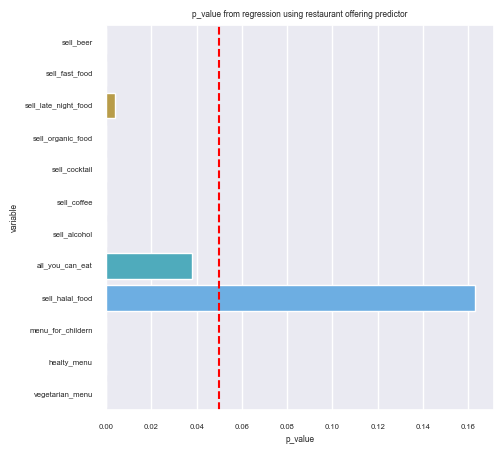

In [329]:
p_value_beer=float(model15.summary().tables[1].data[2][4])
p_value_fast=float(model16.summary().tables[1].data[2][4])
p_value_late=float(model17.summary().tables[1].data[2][4])
p_value_organic=float(model18.summary().tables[1].data[2][4])
p_value_cocktail=float(model19.summary().tables[1].data[2][4])
p_value_coffee=float(model20.summary().tables[1].data[2][4])
p_value_alcohol=float(model21.summary().tables[1].data[2][4])
p_value_ayce=float(model22.summary().tables[1].data[2][4])
p_value_halal=float(model23.summary().tables[1].data[2][4])
p_value_child_menu=float(model24.summary().tables[1].data[2][4])
p_value_healthy=float(model25.summary().tables[1].data[2][4])
p_value_vegetarian=float(model26.summary().tables[1].data[2][4])
p_value_wine=float(model27.summary().tables[1].data[2][4])


var_beer=model15.summary().tables[1].data[2][0]
var_fast=model16.summary().tables[1].data[2][0]
var_late=model17.summary().tables[1].data[2][0]
var_organic=model18.summary().tables[1].data[2][0]
var_cocktail=model19.summary().tables[1].data[2][0]
var_coffee=model20.summary().tables[1].data[2][0]
var_alcohol=model21.summary().tables[1].data[2][0]
var_ayce=model22.summary().tables[1].data[2][0]
var_halal=model23.summary().tables[1].data[2][0]
var_child_menu=model24.summary().tables[1].data[2][0]
var_healthy=model25.summary().tables[1].data[2][0]
var_vegetarian=model26.summary().tables[1].data[2][0]
var_wine=model27.summary().tables[1].data[2][0]



coeff_beer=float(model15.summary().tables[1].data[2][1])
coeff_fast=float(model16.summary().tables[1].data[2][1])
coeff_late=float(model17.summary().tables[1].data[2][1])
coeff_organic=float(model18.summary().tables[1].data[2][1])
coeff_cocktail=float(model19.summary().tables[1].data[2][1])
coeff_coffee=float(model20.summary().tables[1].data[2][1])
coeff_alcohol=float(model21.summary().tables[1].data[2][1])
coeff_ayce=float(model22.summary().tables[1].data[2][1])
coeff_halal=float(model23.summary().tables[1].data[2][1])
coeff_child_menu=float(model24.summary().tables[1].data[2][1])
coeff_healthy=float(model25.summary().tables[1].data[2][1])
coeff_vegetarian=float(model26.summary().tables[1].data[2][1])
coeff_wine=float(model27.summary().tables[1].data[2][1])


list_p_value_payment=[
    p_value_beer,
    p_value_fast,
    p_value_late,
    p_value_organic,
    p_value_cocktail,
    p_value_coffee,
    p_value_alcohol,
    p_value_ayce,
    p_value_halal,
    p_value_child_menu,
    p_value_healthy,
    p_value_vegetarian,
    p_value_wine   
]

list_var_payment=[
    var_beer,
    var_fast,
    var_late,
    var_organic,
    var_cocktail,
    var_coffee,
    var_alcohol,
    var_ayce,
    var_halal,
    var_child_menu,
    var_healthy,
    var_vegetarian,
    var_wine  
]

list_coeff_payment=[
    coeff_beer,
    coeff_fast,
    coeff_late,
    coeff_organic,
    coeff_cocktail,
    coeff_coffee,
    coeff_alcohol,
    coeff_ayce,
    coeff_halal,
    coeff_child_menu,
    coeff_healthy,
    coeff_vegetarian,
    coeff_wine
    
]

dataframe_result_offer=pd.DataFrame({'variable':list_var_payment,'p_value':list_p_value_payment,'coeff':list_coeff_payment})
fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
sns.set(font_scale = 0.5)
threshold_pvalue=0.05
ax1.axvline(threshold_pvalue, color='red', linestyle='--')
sns.barplot(ax=ax1,data=dataframe_result_offer, y='variable', x='p_value')
plt.title('p_value from regression using restaurant offering predictor')
plt.show()


There are enough evidence conclude that sell_beer, sell_fast_food, sell_organic_food, sell_cocktail, sell_coffee, sell_alcohol, menu_for_childern, healthy_menu, vegetarian_menu, all_you_can_eat, sell_late_night_food and sell_wine increase real rating.

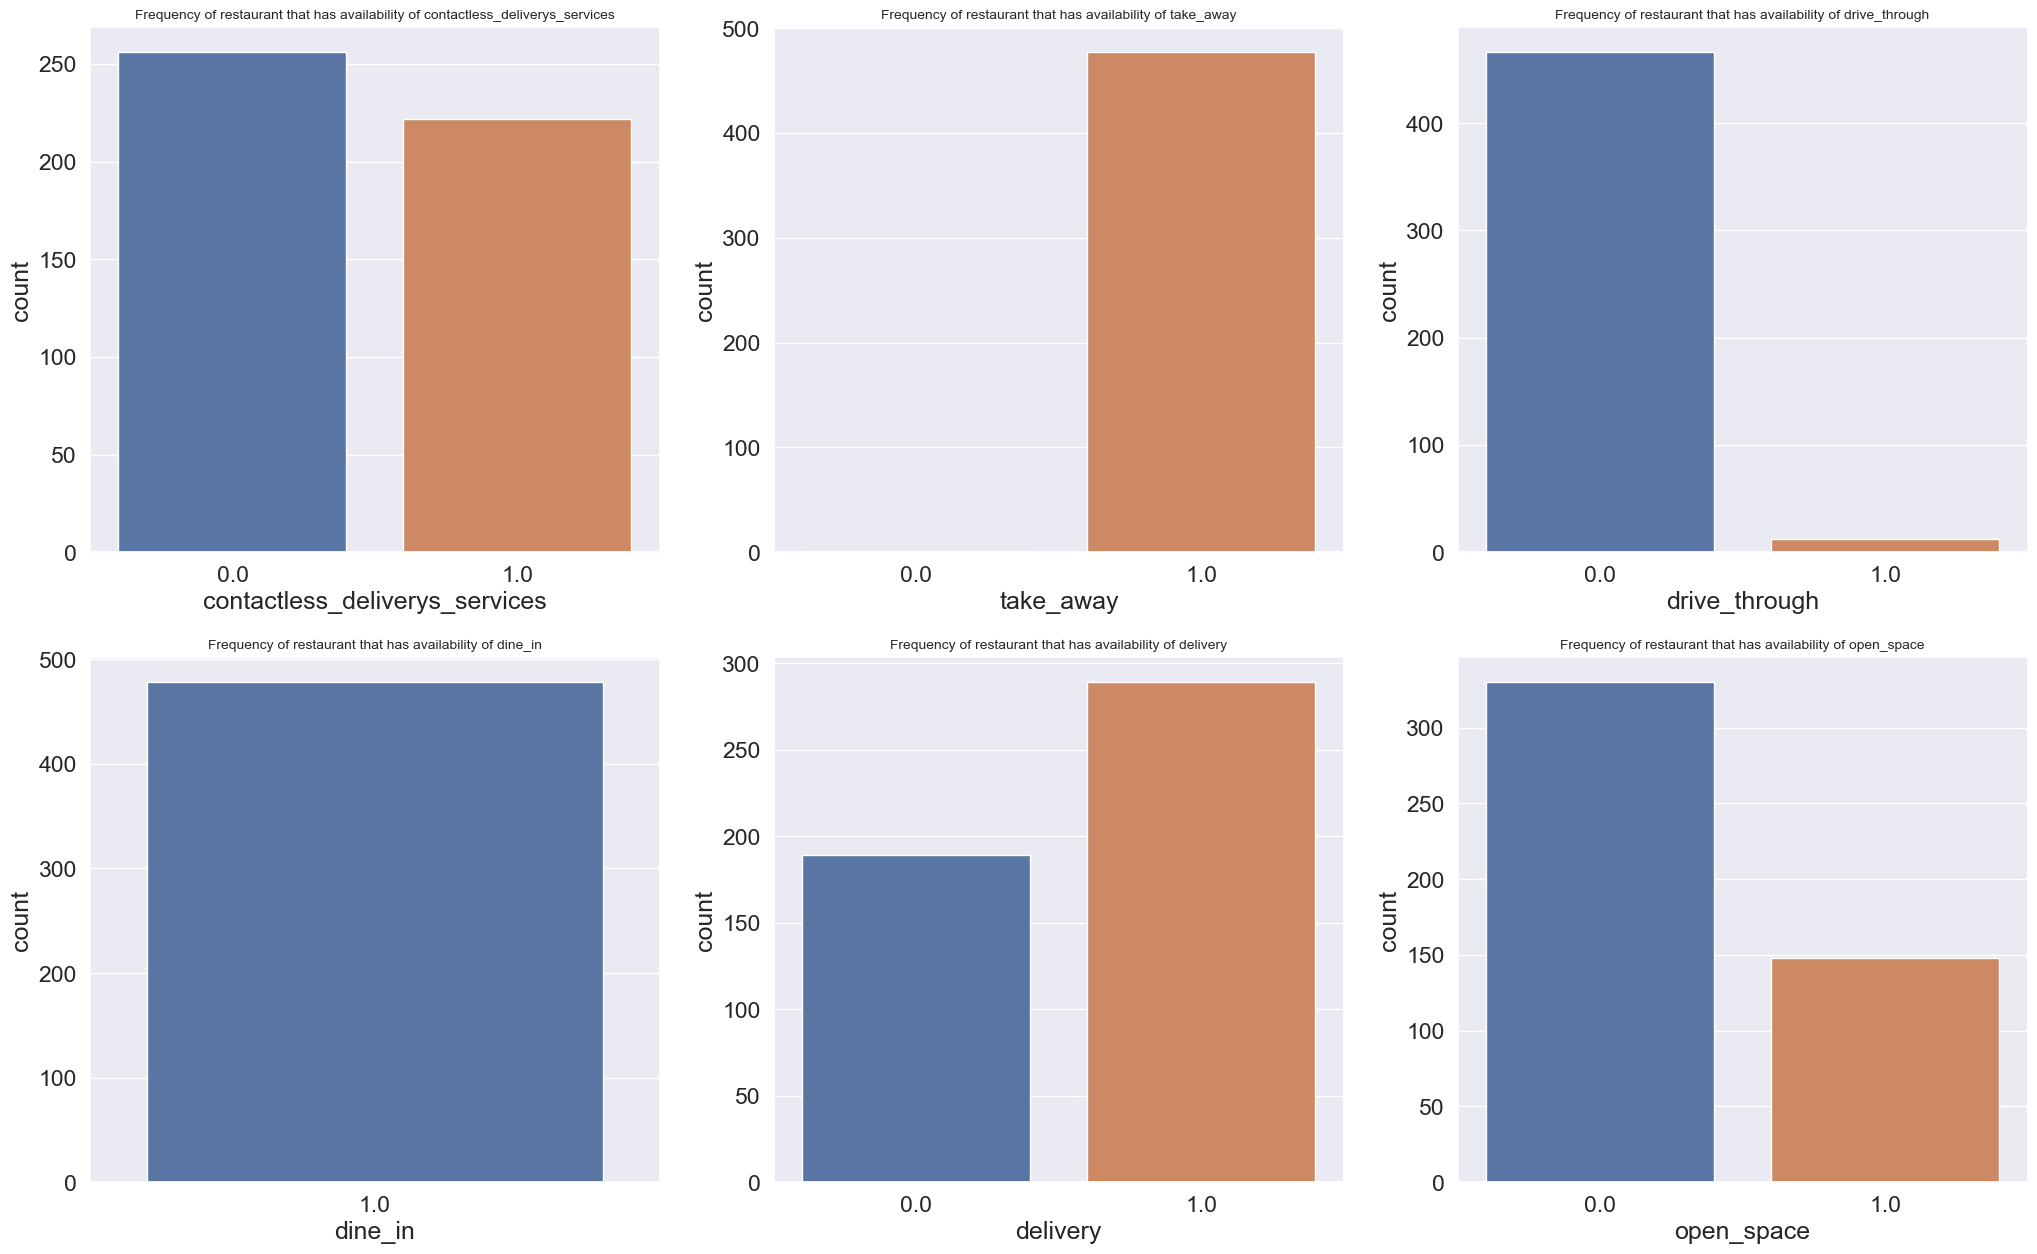

In [226]:
fig, axs = plt.subplots(2, 3, figsize=(25, 15))
sns.set(font_scale = 2)

sns.countplot(ax=axs[0,0],data=df1, x='contactless_deliverys_services')
axs[0,0].set_title('Frequency of restaurant that has availability of contactless_deliverys_services',fontsize=10)
sns.countplot(ax=axs[0,1],data=df1, x='take_away')
axs[0,1].set_title('Frequency of restaurant that has availability of take_away',fontsize=10)
sns.countplot(ax=axs[0,2],data=df1, x='drive_through')
axs[0,2].set_title('Frequency of restaurant that has availability of drive_through',fontsize=10)
sns.countplot(ax=axs[1,0],data=df1, x='dine_in')
axs[1,0].set_title('Frequency of restaurant that has availability of dine_in',fontsize=10)
sns.countplot(ax=axs[1,1],data=df1, x='delivery')
axs[1,1].set_title('Frequency of restaurant that has availability of delivery',fontsize=10)
sns.countplot(ax=axs[1,2],data=df1, x='open_space')
axs[1,2].set_title('Frequency of restaurant that has availability of open_space',fontsize=10)

plt.show()

Text(0.5, 1.0, 'Distribution of real rating in availability of open_space')

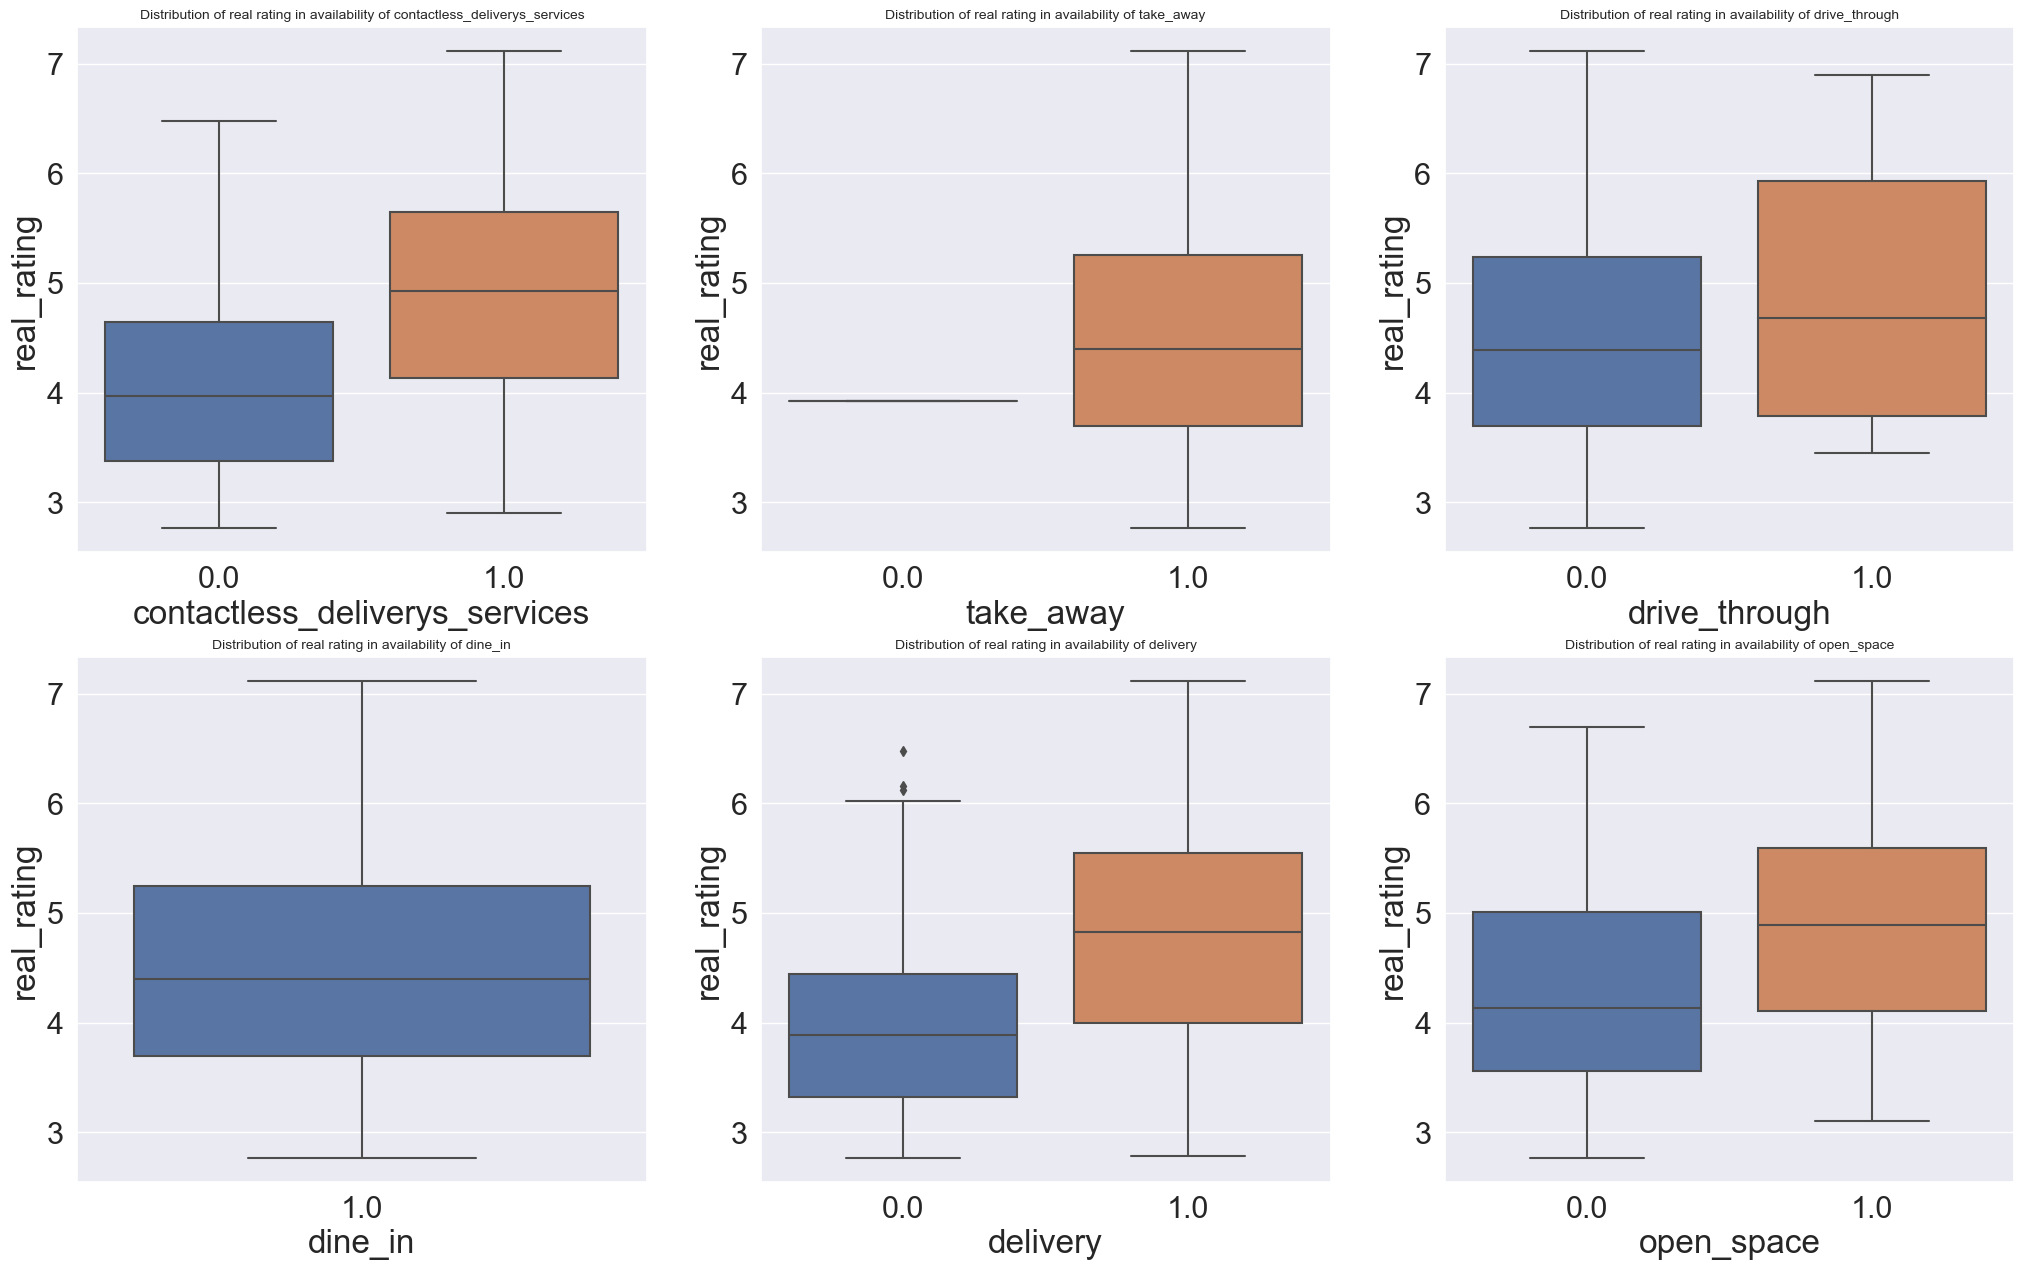

In [231]:
fig, axs = plt.subplots(2, 3, figsize=(25, 15))
sns.set(font_scale = 2)

sns.boxplot(ax=axs[0,0],data=df1, x='contactless_deliverys_services',y='real_rating')
axs[0,0].set_title('Distribution of real rating in availability of contactless_deliverys_services',fontsize=10)
sns.boxplot(ax=axs[0,1],data=df1, x='take_away',y='real_rating')
axs[0,1].set_title('Distribution of real rating in availability of take_away',fontsize=10)
sns.boxplot(ax=axs[0,2],data=df1, x='drive_through',y='real_rating')
axs[0,2].set_title('Distribution of real rating in availability of drive_through',fontsize=10)
sns.boxplot(ax=axs[1,0],data=df1, x='dine_in',y='real_rating')
axs[1,0].set_title('Distribution of real rating in availability of dine_in',fontsize=10)
sns.boxplot(ax=axs[1,1],data=df1, x='delivery',y='real_rating')
axs[1,1].set_title('Distribution of real rating in availability of delivery',fontsize=10)
sns.boxplot(ax=axs[1,2],data=df1, x='open_space',y='real_rating')
axs[1,2].set_title('Distribution of real rating in availability of open_space',fontsize=10)

Text(0.5, 1.0, 'Regression plot availability of open_space to real rating')

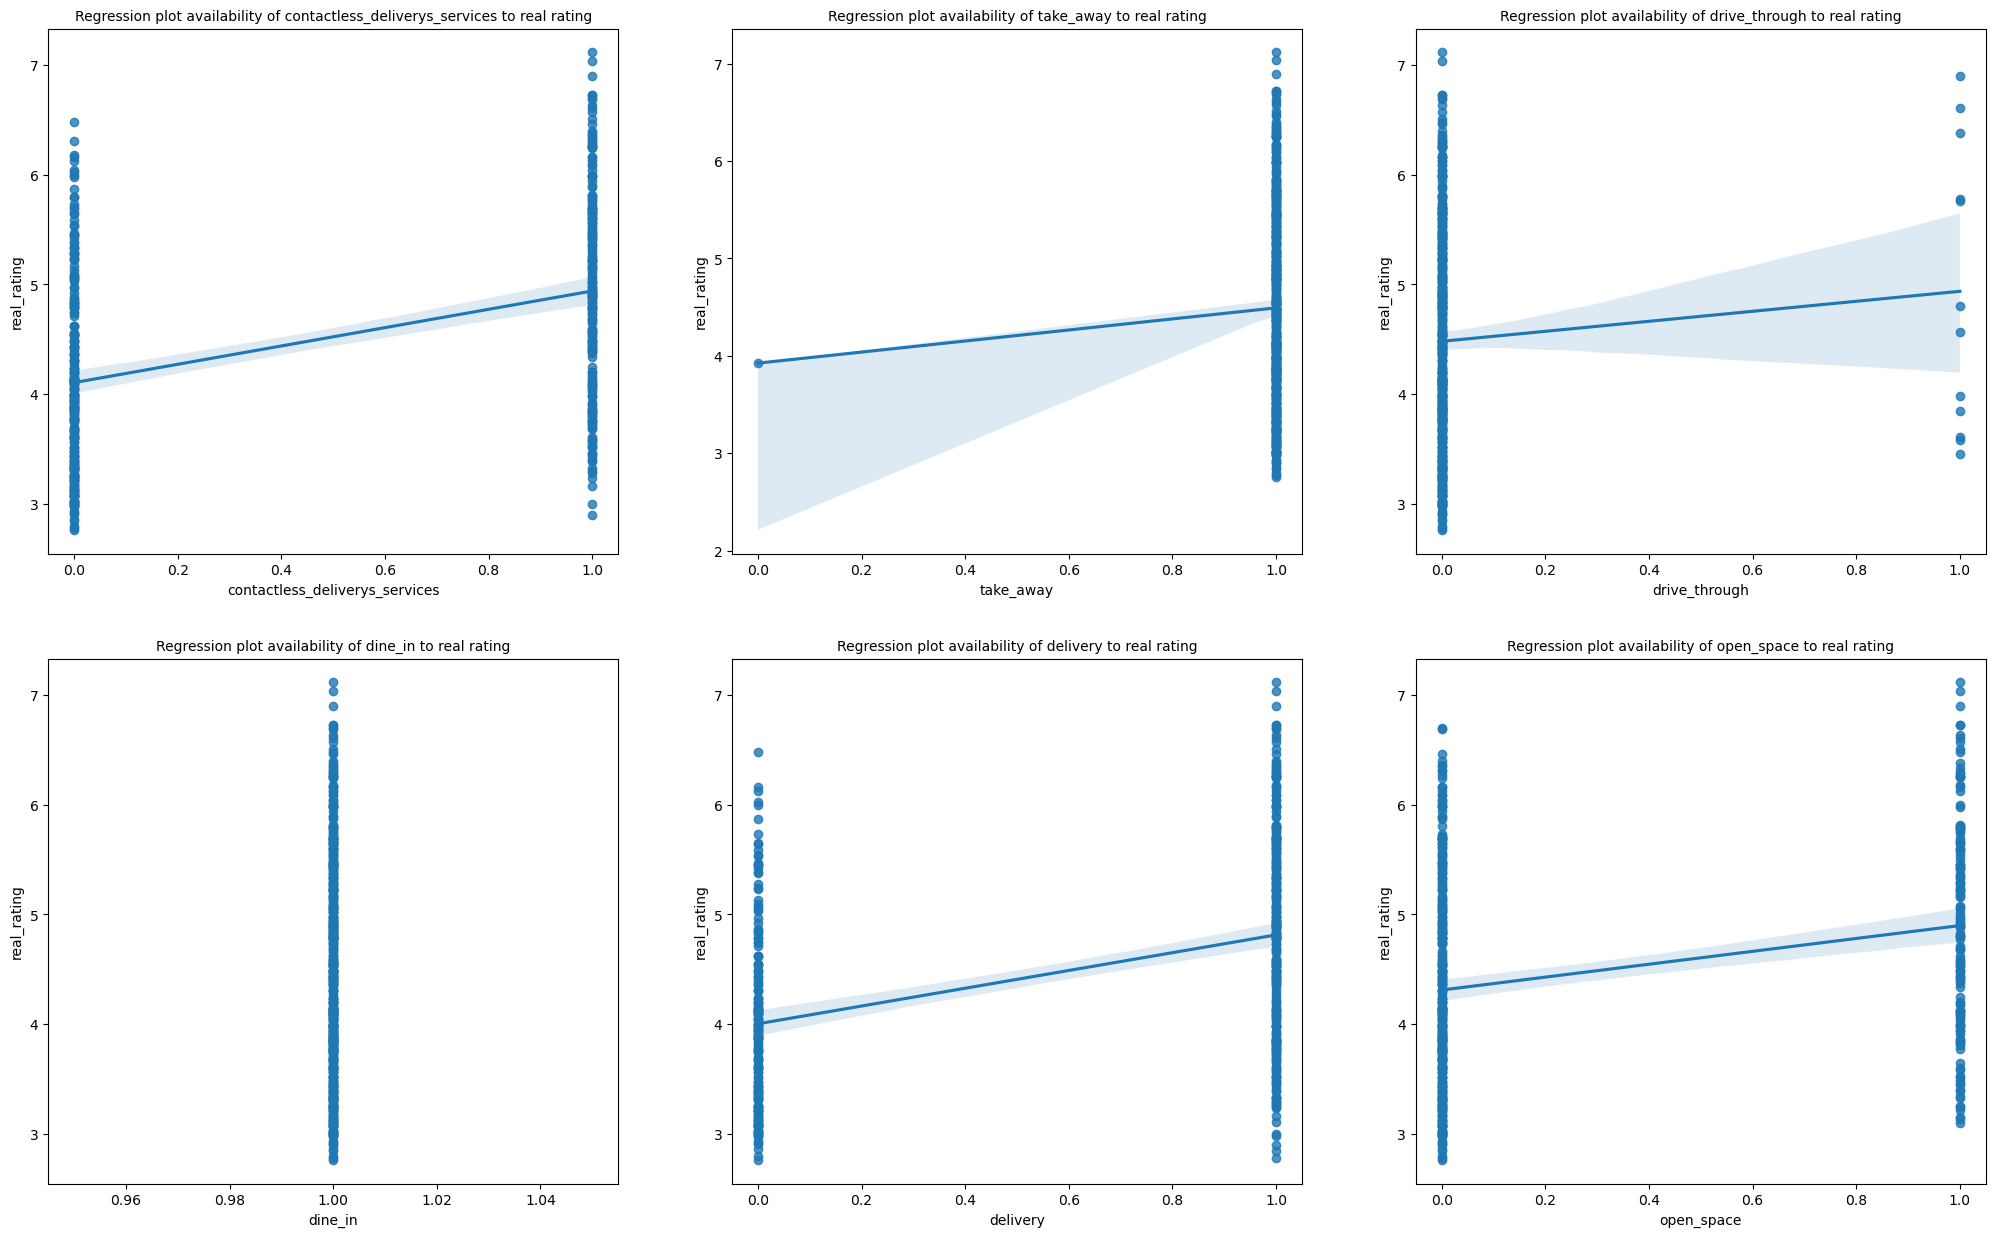

In [173]:
fig, axs = plt.subplots(2, 3, figsize=(25, 15))

sns.regplot(ax=axs[0,0],data=df1, x='contactless_deliverys_services',y='real_rating')
axs[0,0].set_title('Regression plot availability of contactless_deliverys_services to real rating',fontsize=10)
sns.regplot(ax=axs[0,1],data=df1, x='take_away',y='real_rating')
axs[0,1].set_title('Regression plot availability of take_away to real rating',fontsize=10)
sns.regplot(ax=axs[0,2],data=df1, x='drive_through',y='real_rating')
axs[0,2].set_title('Regression plot availability of drive_through to real rating',fontsize=10)
sns.regplot(ax=axs[1,0],data=df1, x='dine_in',y='real_rating')
axs[1,0].set_title('Regression plot availability of dine_in to real rating',fontsize=10)
sns.regplot(ax=axs[1,1],data=df1, x='delivery',y='real_rating')
axs[1,1].set_title('Regression plot availability of delivery to real rating',fontsize=10)
sns.regplot(ax=axs[1,2],data=df1, x='open_space',y='real_rating')
axs[1,2].set_title('Regression plot availability of open_space to real rating',fontsize=10)

In [335]:
X27 = sm.add_constant(df1['contactless_deliverys_services'])
X28 = sm.add_constant(df1['take_away'])
X29 = sm.add_constant(df1['drive_through'])
X30 = sm.add_constant(df1['dine_in'])
X31 = sm.add_constant(df1['delivery'])
X32 = sm.add_constant(df1['open_space'])

# Fit the GLM model
model27 = sm.GLM(df1['real_rating'], X27, family=sm.families.Gaussian()).fit()
model28 = sm.GLM(df1['real_rating'], X28, family=sm.families.Gaussian()).fit()
model29 = sm.GLM(df1['real_rating'], X29, family=sm.families.Gaussian()).fit()
model30 = sm.GLM(df1['real_rating'], X30, family=sm.families.Gaussian()).fit()
model31 = sm.GLM(df1['real_rating'], X31, family=sm.families.Gaussian()).fit()
model32 = sm.GLM(df1['real_rating'], X32, family=sm.families.Gaussian()).fit()

results27 = model27.summary().tables[1]
results28 = model28.summary().tables[1]
results29 = model29.summary().tables[1]
results30 = model30.summary().tables[1]
results31 = model31.summary().tables[1]
results32 = model32.summary().tables[1]

print('\n results_contactless_deliverys_services_rating \n',results27)
print('\n results_take_away_rating \n',results28)
print('\n results_drive_through_rating \n',results29)
print('\n results_dine_in_rating \n',results30)
print('\n results_delivery_rating \n',results31)
print('\n results_open_space_rating \n',results32)


 results_contactless_deliverys_services_rating 
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              4.1032      0.056     72.814      0.000       3.993       4.214
contactless_deliverys_services     0.8360      0.083     10.110      0.000       0.674       0.998

 results_take_away_rating 
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9253      0.993      3.951      0.000       1.978       5.872
take_away      0.5673      0.994      0.571      0.568      -1.382       2.516

 results_drive_through_rating 
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          

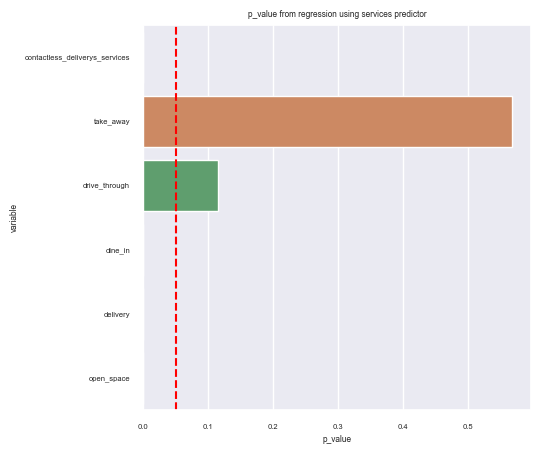

In [336]:
p_value_contactless=float(model27.summary().tables[1].data[2][4])
p_value_take_away=float(model28.summary().tables[1].data[2][4])
p_value_drive_through=float(model29.summary().tables[1].data[2][4])
p_value_dine_in =float(model30.summary().tables[1].data[1][4])
p_value_delivery=float(model31.summary().tables[1].data[2][4])
p_value_open_space=float(model32.summary().tables[1].data[2][4])


var_contactless=model27.summary().tables[1].data[2][0]
var_take_away=model28.summary().tables[1].data[2][0]
var_drive_through=model29.summary().tables[1].data[2][0]
var_dine_in=model30.summary().tables[1].data[1][0]
var_delivery=model31.summary().tables[1].data[2][0]
var_open_space=model32.summary().tables[1].data[2][0]



coeff_contactless=float(model27.summary().tables[1].data[2][1])
coeff_take_away=float(model28.summary().tables[1].data[2][1])
coeff_drive_through=float(model29.summary().tables[1].data[2][1])
coeff_dine_in =float(model30.summary().tables[1].data[1][1])
coeff_delivery=float(model31.summary().tables[1].data[2][1])
coeff_open_space=float(model32.summary().tables[1].data[2][1])


list_p_value=[
    p_value_contactless,
    p_value_take_away,
    p_value_drive_through,
    p_value_dine_in,
    p_value_delivery,
    p_value_open_space   
]

list_var=[
    var_contactless,
    var_take_away,
    var_drive_through,
    var_dine_in,
    var_delivery,
    var_open_space 
]

list_coeff=[
    coeff_contactless,
    coeff_take_away,
    coeff_drive_through,
    coeff_dine_in,
    coeff_delivery,
    coeff_open_space 
]
dataframe_result_services=pd.DataFrame({'variable':list_var,'p_value':list_p_value,'coeff':list_coeff})
fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
sns.set(font_scale = 0.5)
threshold_pvalue=0.05
ax1.axvline(threshold_pvalue, color='red', linestyle='--')
sns.barplot(ax=ax1,data=dataframe_result_services, y='variable', x='p_value')
plt.title('p_value from regression using services predictor')
plt.show()

There are enough evidence conclude that contactless_deliverys_services, delivery, and open_space increase real rating.

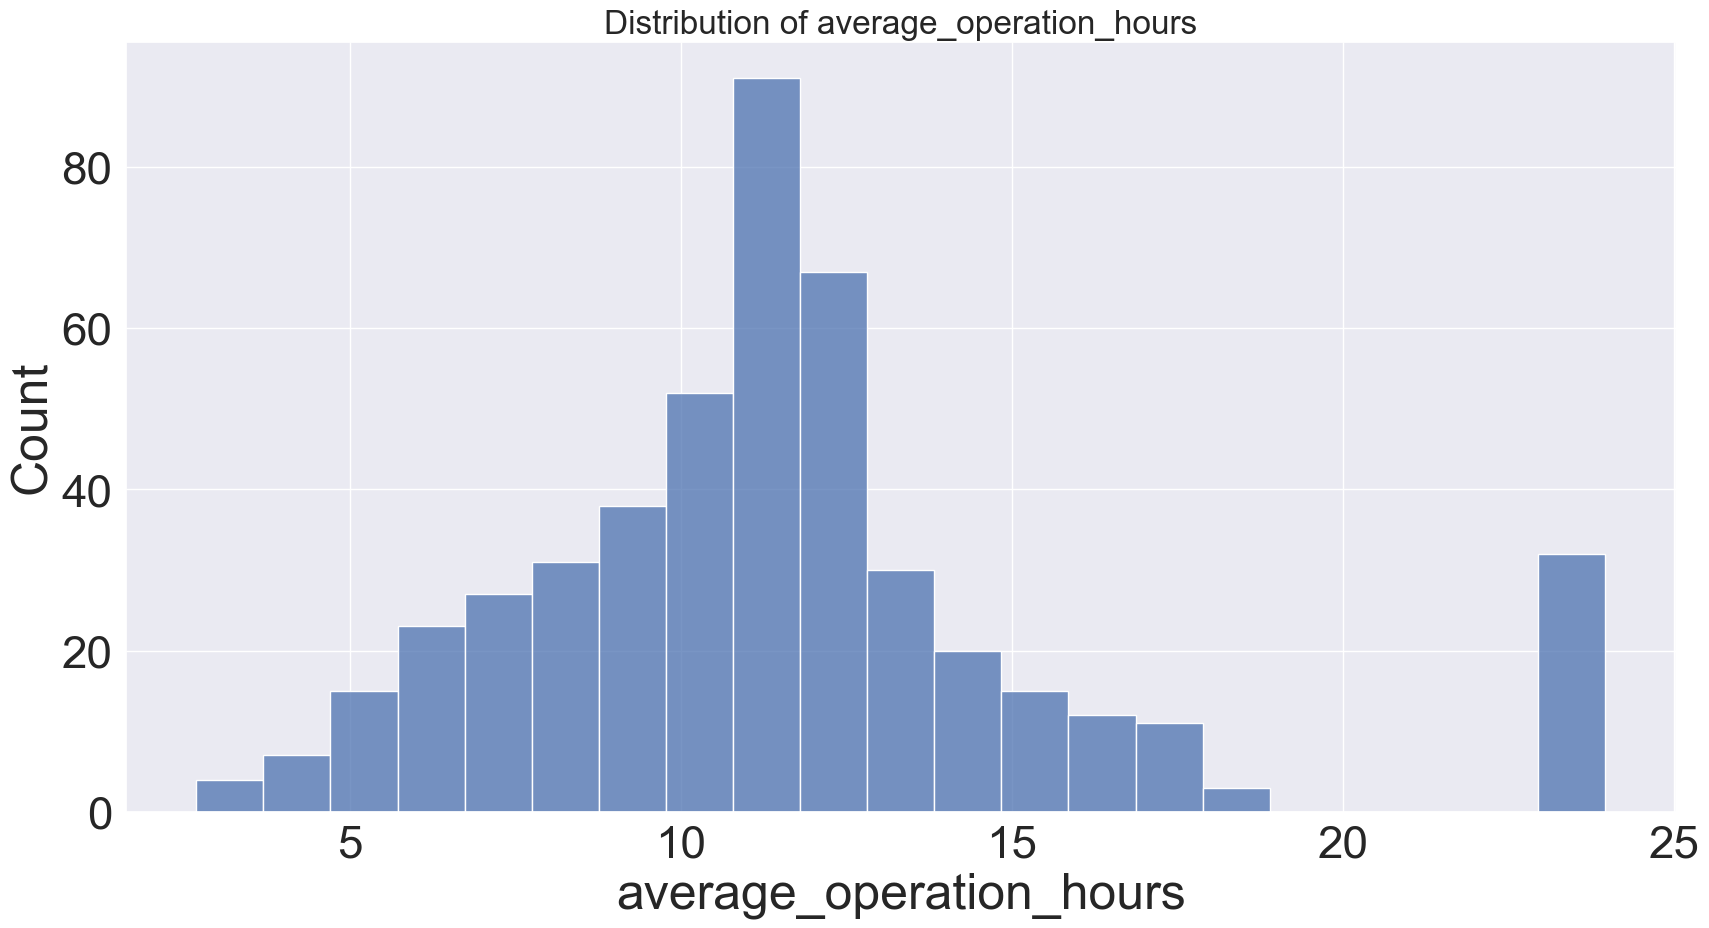

In [200]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

sns.set(font_scale = 2)

sns.histplot(data=df1, x='average_operation_hours')
plt.title('Distribution of average_operation_hours')
plt.show()

In [180]:
df1.average_operation_hours.describe()

count    478.000000
mean      11.539029
std        4.391599
min        2.678571
25%        9.000000
50%       11.000000
75%       13.000000
max       23.966700
Name: average_operation_hours, dtype: float64

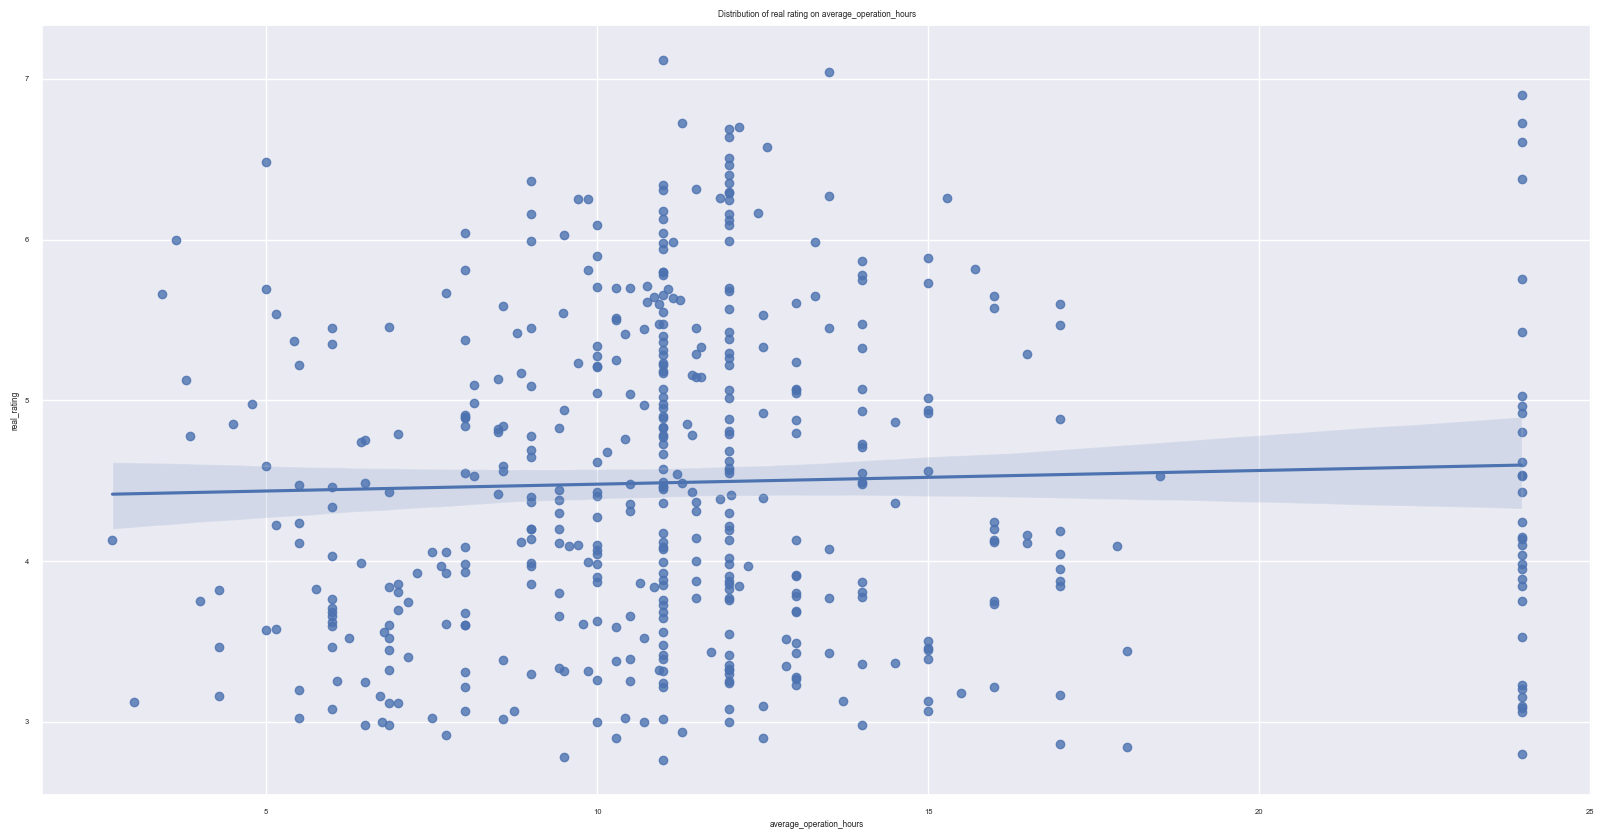

In [304]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

sns.regplot(data=df1, x='average_operation_hours', y='real_rating')
plt.title('Distribution of real rating on average_operation_hours')
plt.show()

In [303]:
pearson_corr = df1['average_operation_hours'].corr(df1['real_rating'])
pearson_corr

0.03761984314802203

In [175]:
X33 = sm.add_constant(df1['average_operation_hours'])
model33 = sm.GLM(df1['real_rating'], X33, family=sm.families.Gaussian()).fit()
results33 = model33.summary().tables[1]
p_value=results33.data[2][4]
print('\n results_average_operation_hours_rating \n',results33)
print('p_value = ',p_value)


 results_average_operation_hours_rating 
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       4.3933      0.128     34.374      0.000       4.143       4.644
average_operation_hours     0.0085      0.010      0.821      0.411      -0.012       0.029
p_value =   0.411


variable Average_operation_hours tidak dapat menjelaskan variasi dari rating yang ada

In [157]:
col_pre=[
    'debit_card_payment',
    'credit_card_payment',
    'voucher_payment',
    'phone_NFC_payment',
    'high_chair_facility',
    'bar_facility',
    'toilet_facility',
    'free_wifi_facility',
    'high_class_atmosphere',
    'relaxed_atmosphere',
    'sell_beer',
    'sell_fast_food',
    'sell_organic_food',
    'sell_cocktail',
    'sell_coffee',
    'sell_alcohol',
    'menu_for_childern',
    'healty_menu',
    'vegetarian_menu',
    'sell_wine',
    'contactless_deliverys_services',
    'delivery',
    'open_space',
    'netral_gender_toilet_facility',
    'all_you_can_eat',
    ''
]

In [350]:
selected_columns2=[
    'resto_id',
    'resto_name',
    'real_rating',
    'debit_card_payment',
    'credit_card_payment',
    'voucher_payment',
    'phone_NFC_payment',
    'high_chair_facility',
    'bar_facility',
    'toilet_facility',
    'free_wifi_facility',
    'wifi_facility',
    'high_class_atmosphere',
    'relaxed_atmosphere',
    'sell_beer',
    'sell_fast_food',
    'sell_organic_food',
    'sell_cocktail',
    'sell_coffee',
    'sell_alcohol',
    'menu_for_childern',
    'healty_menu',
    'vegetarian_menu',
    'sell_wine',
    'contactless_deliverys_services',
    'delivery',
    'open_space',
    'suitable_for_children',
    'all_you_can_eat',
    'sell_late_night_food'
]

In [351]:
df2=df1[selected_columns2]

In [352]:
df2.columns

Index(['resto_id', 'resto_name', 'real_rating', 'debit_card_payment',
       'credit_card_payment', 'voucher_payment', 'phone_NFC_payment',
       'high_chair_facility', 'bar_facility', 'toilet_facility',
       'free_wifi_facility', 'wifi_facility', 'high_class_atmosphere',
       'relaxed_atmosphere', 'sell_beer', 'sell_fast_food',
       'sell_organic_food', 'sell_cocktail', 'sell_coffee', 'sell_alcohol',
       'menu_for_childern', 'healty_menu', 'vegetarian_menu', 'sell_wine',
       'contactless_deliverys_services', 'delivery', 'open_space',
       'suitable_for_children', 'all_you_can_eat', 'sell_late_night_food'],
      dtype='object')

/var/folders/j8/y_9b3dcx03nct600zgv3jf_80000gn/T/ipykernel_8240/2827703974.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df2.corr()


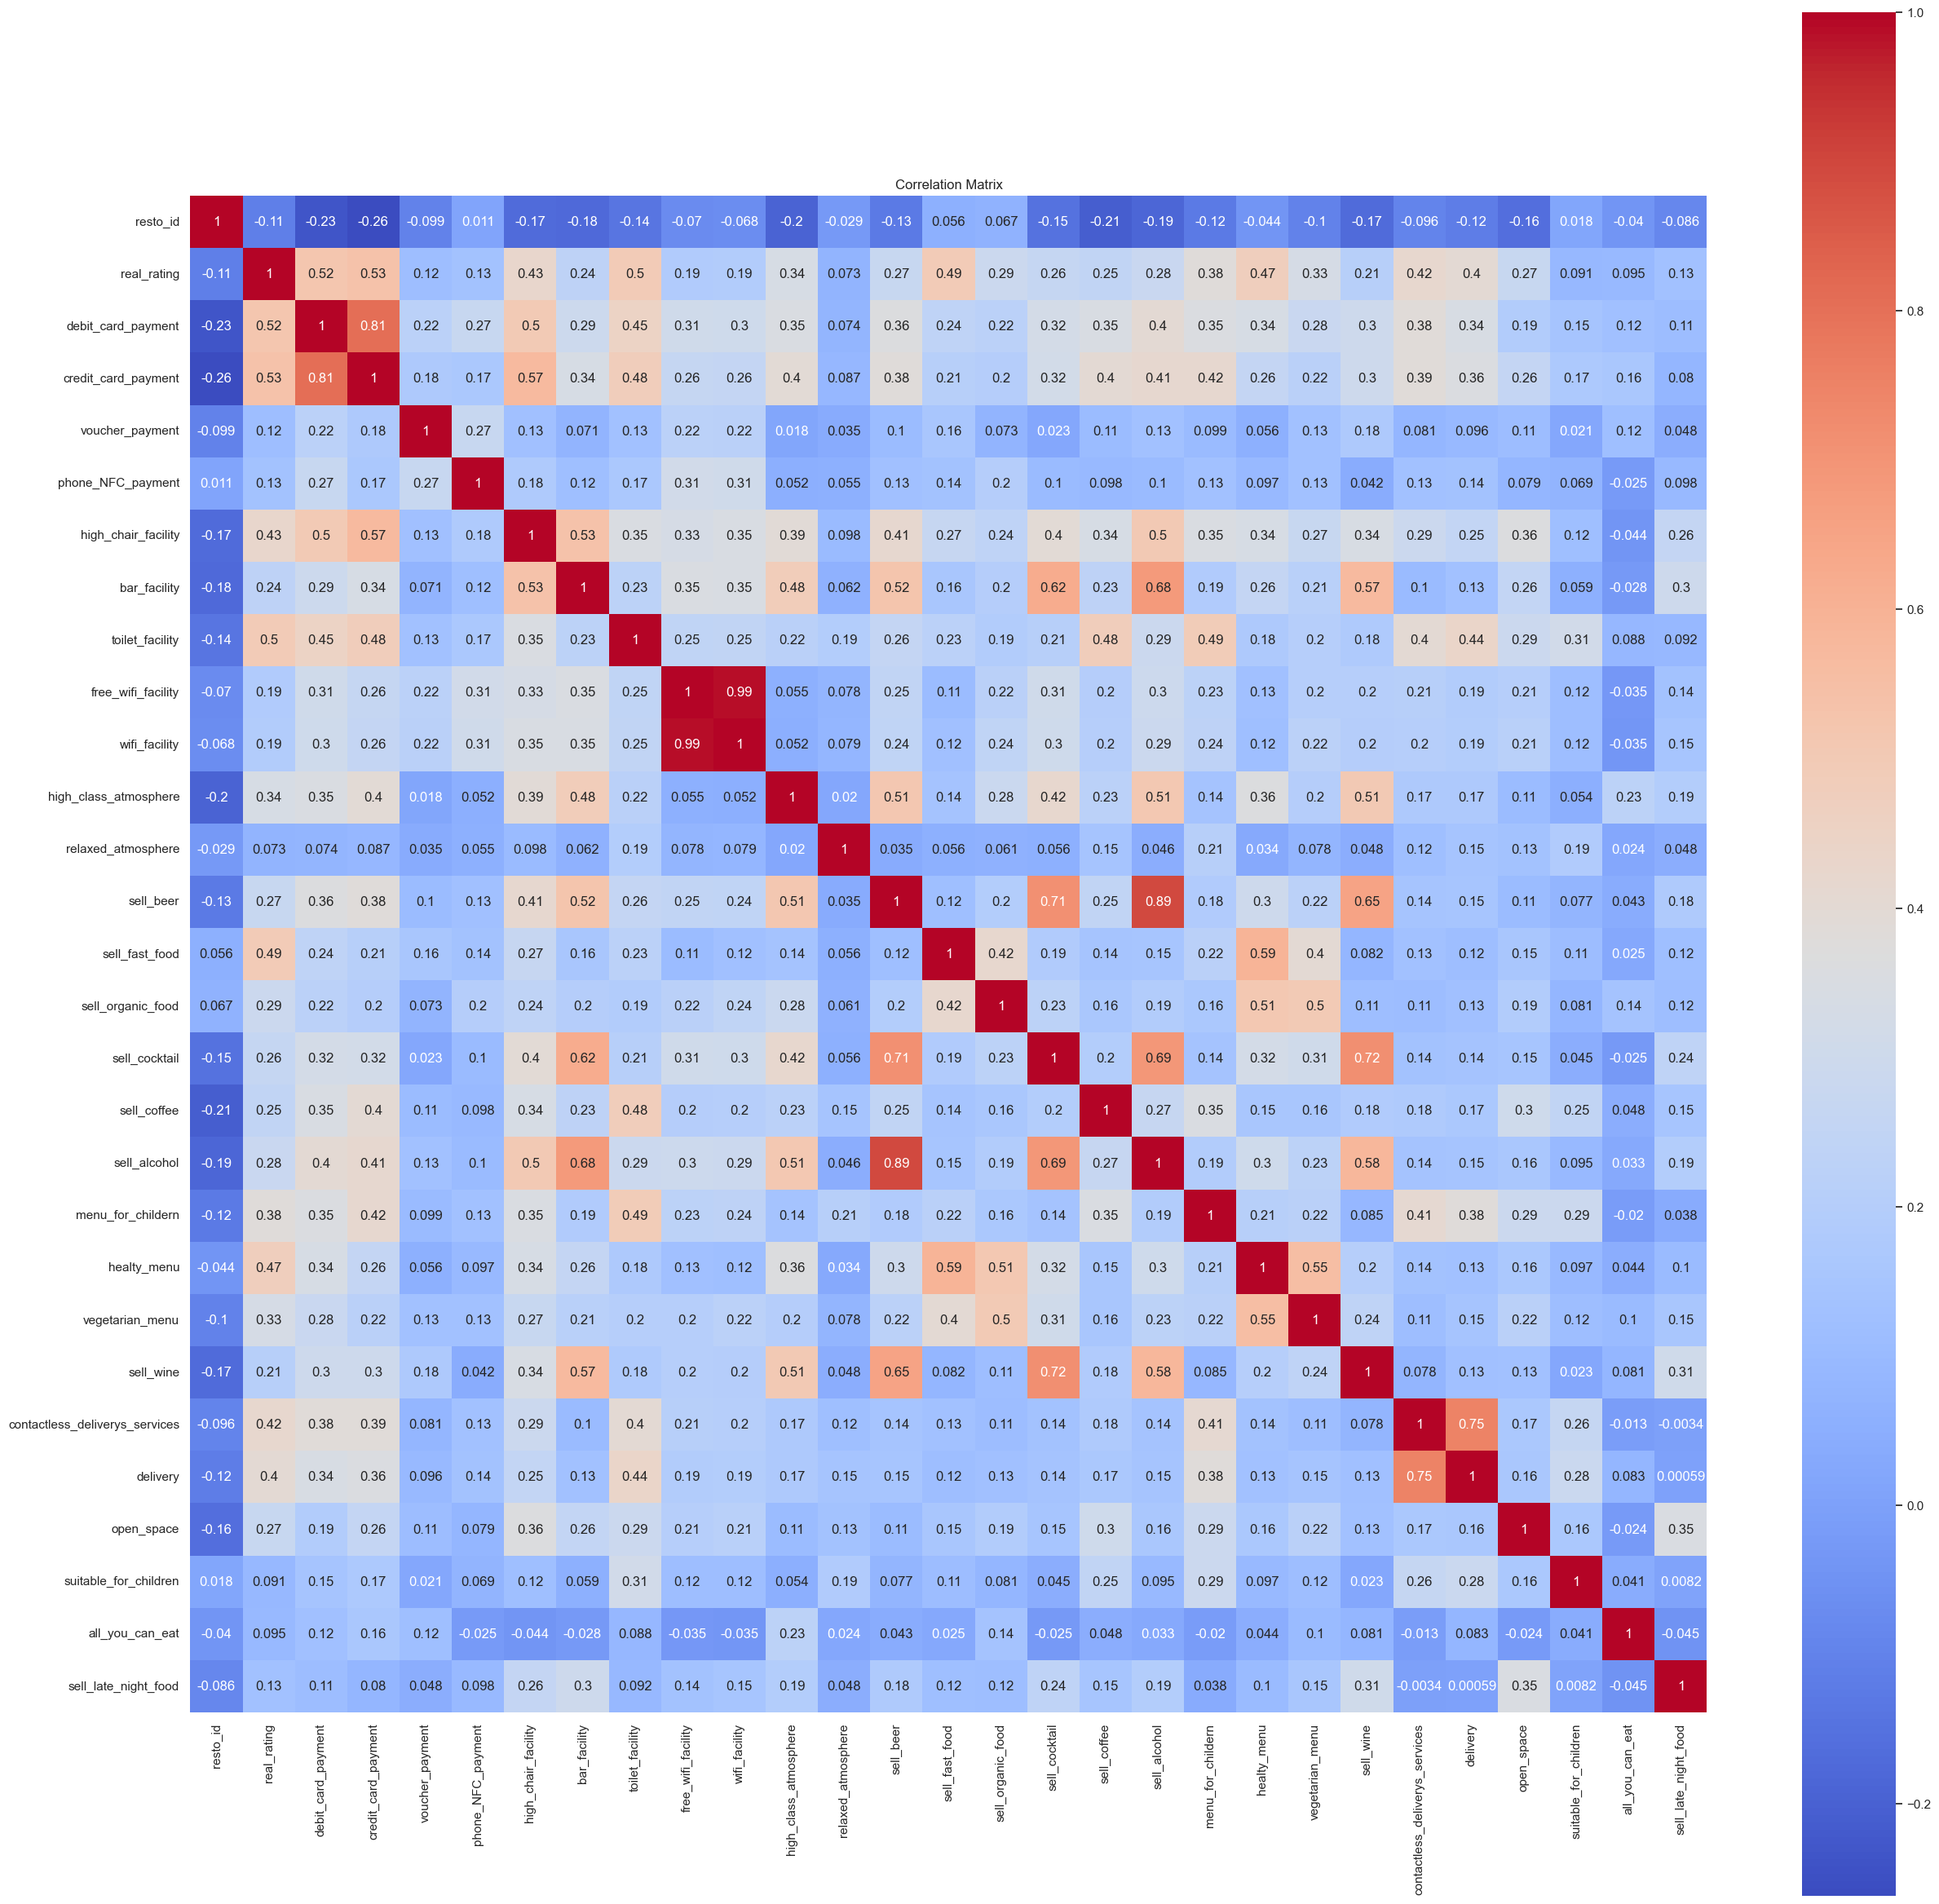

In [353]:
fig, ax = plt.subplots(1, 1, figsize=(30, 30))

# Calculate correlation matrix
corr_matrix = df2.corr()
sns.set(font_scale = 1)
# Create correlation matrix heatmap
sns.heatmap(data=corr_matrix, ax=ax, annot=True, cmap='coolwarm', square=True)

# Set plot title
plt.title('Correlation Matrix')

# Display the plot
plt.show()

From the correlation matric we find that there are some predictor that have high correlation. <br><br>
<b>sell_beer</b> ~ sell_alcohol (0.88) -> sell_alcohol has more statitical significant than sell_beer <br>
<b>sell_cocktail</b> ~ sell_wine (0.73) sell_cocktail has more statitical significant than sell_wine <br>
debit_card_payment ~ <b>credit_card_payment</b> (0.77) credit_card_payment has more statitical significant than debit_card_payment <br>
sell_cocktail ~ <b>sell_bir</b> (0.71) sell_bir has more statitical significant than sell_cocktail<br>
sell_cocktail ~ <b>sell_alcohol</b> (0.67) sell_alcohol has more statitical significant than sell_cocktail <br>
delivery ~ <b>contactless_delivery</b> (0.75) contactless_delivery has more statitical significant than delivery <br>
sell_wine ~ <b>sell_bir</b> (0.65) sell_bir has more statitical significant than sell_wine <br>
<b>sell_alcohol</b> ~ bar facility (0.67) sell_alcohol has more statitical significant than bar_facility<br>
sell_wine ~ <b>sell_alcohol</b> (0.58) sell_alcohol has more statitical significant than sell_wine<br>
<b>high_chair</b> ~ bar facility (0.53) high_chair_facility has more statitical significant than bar_facility  <br>
<b>sell_cocktail</b> ~ bar facility (0.57) sell_cocktail has more statitical significant than bar_facility<br>

So we deleter some variable those have high correlation with other

In [354]:
#Set deleted coloumn
deleted_col=[
    'debit_card_payment',
    'sell_beer',
    'sell_cocktail',
    'delivery',
    'bar_facility',
    'free_wifi_facility',
    'sell_wine',
]

In [355]:
#Select column
selected_column3=[]
for col in df2.columns:
    if col not in deleted_col:
        selected_column3.append(col)
    else:
        continue
        

In [356]:
selected_column3

['resto_id',
 'resto_name',
 'real_rating',
 'credit_card_payment',
 'voucher_payment',
 'phone_NFC_payment',
 'high_chair_facility',
 'toilet_facility',
 'wifi_facility',
 'high_class_atmosphere',
 'relaxed_atmosphere',
 'sell_fast_food',
 'sell_organic_food',
 'sell_coffee',
 'sell_alcohol',
 'menu_for_childern',
 'healty_menu',
 'vegetarian_menu',
 'contactless_deliverys_services',
 'open_space',
 'suitable_for_children',
 'all_you_can_eat',
 'sell_late_night_food']

In [357]:
#Create dataframe with selected columns
df3=df2[selected_column3]

In [358]:
df3.columns

Index(['resto_id', 'resto_name', 'real_rating', 'credit_card_payment',
       'voucher_payment', 'phone_NFC_payment', 'high_chair_facility',
       'toilet_facility', 'wifi_facility', 'high_class_atmosphere',
       'relaxed_atmosphere', 'sell_fast_food', 'sell_organic_food',
       'sell_coffee', 'sell_alcohol', 'menu_for_childern', 'healty_menu',
       'vegetarian_menu', 'contactless_deliverys_services', 'open_space',
       'suitable_for_children', 'all_you_can_eat', 'sell_late_night_food'],
      dtype='object')

In [360]:
# Add a constant term to the predictor variables
X = sm.add_constant(df3[['credit_card_payment',
       'voucher_payment', 'phone_NFC_payment', 'high_chair_facility',
       'toilet_facility', 'wifi_facility', 'high_class_atmosphere',
       'relaxed_atmosphere', 'sell_fast_food', 'sell_organic_food',
       'sell_coffee', 'sell_alcohol', 'menu_for_childern', 'healty_menu',
       'vegetarian_menu', 'contactless_deliverys_services', 'open_space',
       'suitable_for_children', 'all_you_can_eat', 'sell_late_night_food']])

# Fit the multiple regression model
firstmodel = sm.OLS(df3['real_rating'], X).fit()

# Print the model summary
print(firstmodel.summary())

                            OLS Regression Results                            
Dep. Variable:            real_rating   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     29.67
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           8.70e-70
Time:                        16:49:38   Log-Likelihood:                -475.31
No. Observations:                 478   AIC:                             992.6
Df Residuals:                     457   BIC:                             1080.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

/var/folders/j8/y_9b3dcx03nct600zgv3jf_80000gn/T/ipykernel_8240/506031804.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


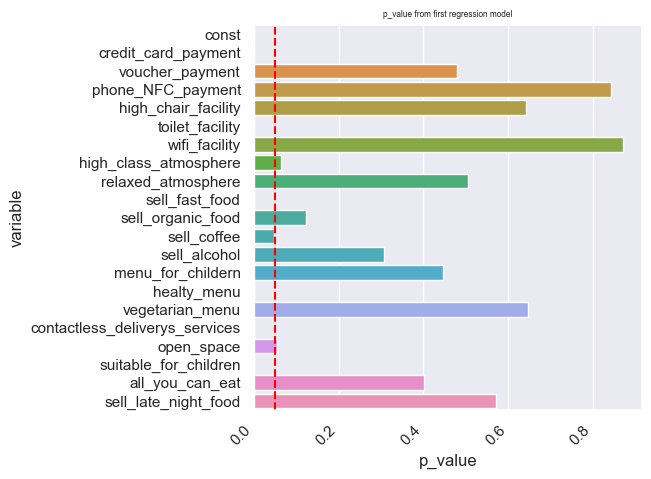

In [361]:
list_of_variable=[]
list_of_pvalue=[]
list_of_coeff=[]
for i in range (len(firstmodel.summary().tables[1].data)-1):
    a=i+1
    list_of_variable.append(firstmodel.summary().tables[1].data[a][0])
    list_of_pvalue.append(float(firstmodel.summary().tables[1].data[a][4]))
    list_of_coeff.append(float(firstmodel.summary().tables[1].data[a][1]))
    
dataframe_result_first_model=pd.DataFrame({'variable':list_of_variable,'p_value':list_of_pvalue,'coeff':list_of_coeff})
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.set(font_scale = 0.5)
threshold=0.05
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.axvline(threshold, color='red', linestyle='--')
sns.barplot(ax=ax,data=dataframe_result_first_model, y='variable', x='p_value')
plt.title('p_value from first regression model')
plt.show()

In [368]:
#Selected column with high statistical significance
col=['credit_card_payment','toilet_facility','sell_fast_food','healty_menu','contactless_deliverys_services','suitable_for_children']

In [369]:
selected_columns4=['resto_id','resto_name','real_rating','credit_card_payment','toilet_facility','sell_fast_food','healty_menu','contactless_deliverys_services','suitable_for_children']

In [370]:
df4=df3[selected_columns4]

In [371]:
# Add a constant term to the predictor variables
Xnew = sm.add_constant(df4[col])

# Fit the multiple regression model
modelnew = sm.OLS(df4['real_rating'], Xnew).fit()

results=modelnew.summary()

# Print the model summary
print(modelnew.summary())

                            OLS Regression Results                            
Dep. Variable:            real_rating   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     95.48
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           3.42e-78
Time:                        17:12:03   Log-Likelihood:                -484.03
No. Observations:                 478   AIC:                             982.1
Df Residuals:                     471   BIC:                             1011.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

/var/folders/j8/y_9b3dcx03nct600zgv3jf_80000gn/T/ipykernel_8240/2161338904.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


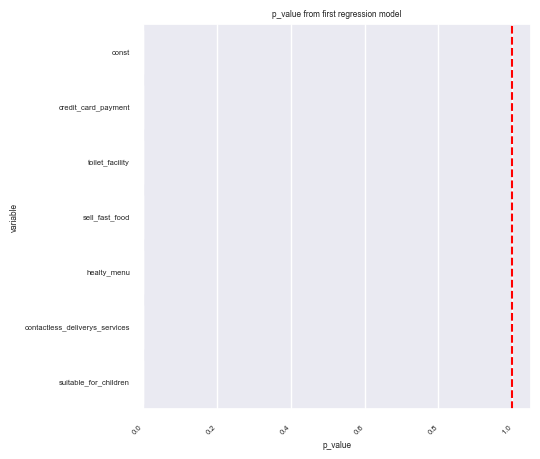

In [372]:
list_of_variable=[]
list_of_pvalue=[]
list_of_coeff=[]
for i in range (len(modelnew.summary().tables[1].data)-1):
    a=i+1
    list_of_variable.append(modelnew.summary().tables[1].data[a][0])
    list_of_pvalue.append(float(modelnew.summary().tables[1].data[a][4]))
    list_of_coeff.append(float(modelnew.summary().tables[1].data[a][1]))
    
dataframe_result_final_model=pd.DataFrame({'variable':list_of_variable,'p_value':list_of_pvalue,'coeff':list_of_coeff})
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.set(font_scale = 0.5)
threshold=0.05
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.axvline(threshold, color='red', linestyle='--')
sns.barplot(ax=ax,data=dataframe_result_final_model, y='variable', x='p_value')
plt.title('p_value from first regression model')
plt.show()

In [238]:
#Create regression equation

Xnew1 = sm.add_constant(df4[col]).drop(columns=['const'])
a_hat=float(modelnew.summary().tables[1].data[1][1])
b1_hat=float(modelnew.summary().tables[1].data[2][1])
b2_hat=float(modelnew.summary().tables[1].data[3][1])
b3_hat=float(modelnew.summary().tables[1].data[4][1])
b4_hat=float(modelnew.summary().tables[1].data[5][1])
b5_hat=float(modelnew.summary().tables[1].data[6][1])
b6_hat=float(modelnew.summary().tables[1].data[7][1])
b7_hat=float(modelnew.summary().tables[1].data[8][1])


coefficients=[b1_hat,b2_hat,b3_hat,b4_hat,b5_hat,b6_hat,b7_hat]
predicted_values = a_hat + Xnew1.dot(coefficients)
residuals=modelnew.resid

In [239]:
df5=df4.copy()

In [240]:
df5['predicted_rating']=predicted_values
df5['residual']=residuals

In [241]:
df5[['resto_id','resto_name','real_rating','predicted_rating','residual']].sort_values(by='predicted_rating',ascending=False).head(100)

resto_id                        resto_name  real_rating  \
239       844  Waroeng Steak and Shake Ngaliyan     6.254556   
361      1363                   Kedai Gula Jawa     6.261470   
90        247       Ayam Goreng Suharti Krapyak     6.246683   
117       384                        The Tavern     6.636848   
122       398    Restoran Kampung Laut Semarang     7.115272   
..        ...                               ...          ...   
108       362                     Commoro Resto     4.884590   
0           2         Adi's Culinary Banyumanik     5.696872   
48        129              Gama Candi Resto BSB     5.209417   
26         72         Putri Noya Coffee & Sushi     3.390969   
50        131                            Phuket     5.234358   

     predicted_rating  residual  
239            6.5828 -0.328145  
361            6.5828 -0.321231  
90             6.5828 -0.336018  
117            6.5828  0.054148  
122            6.5828  0.532571  
..                ...       ...  
108            5.0819 -0.197214  
0              5.0819  0.615068  
48             5.0819  0.127613  
26             5.0819 -1.690836  
50             5.0819  0.152553  

[100 rows x 5 columns]

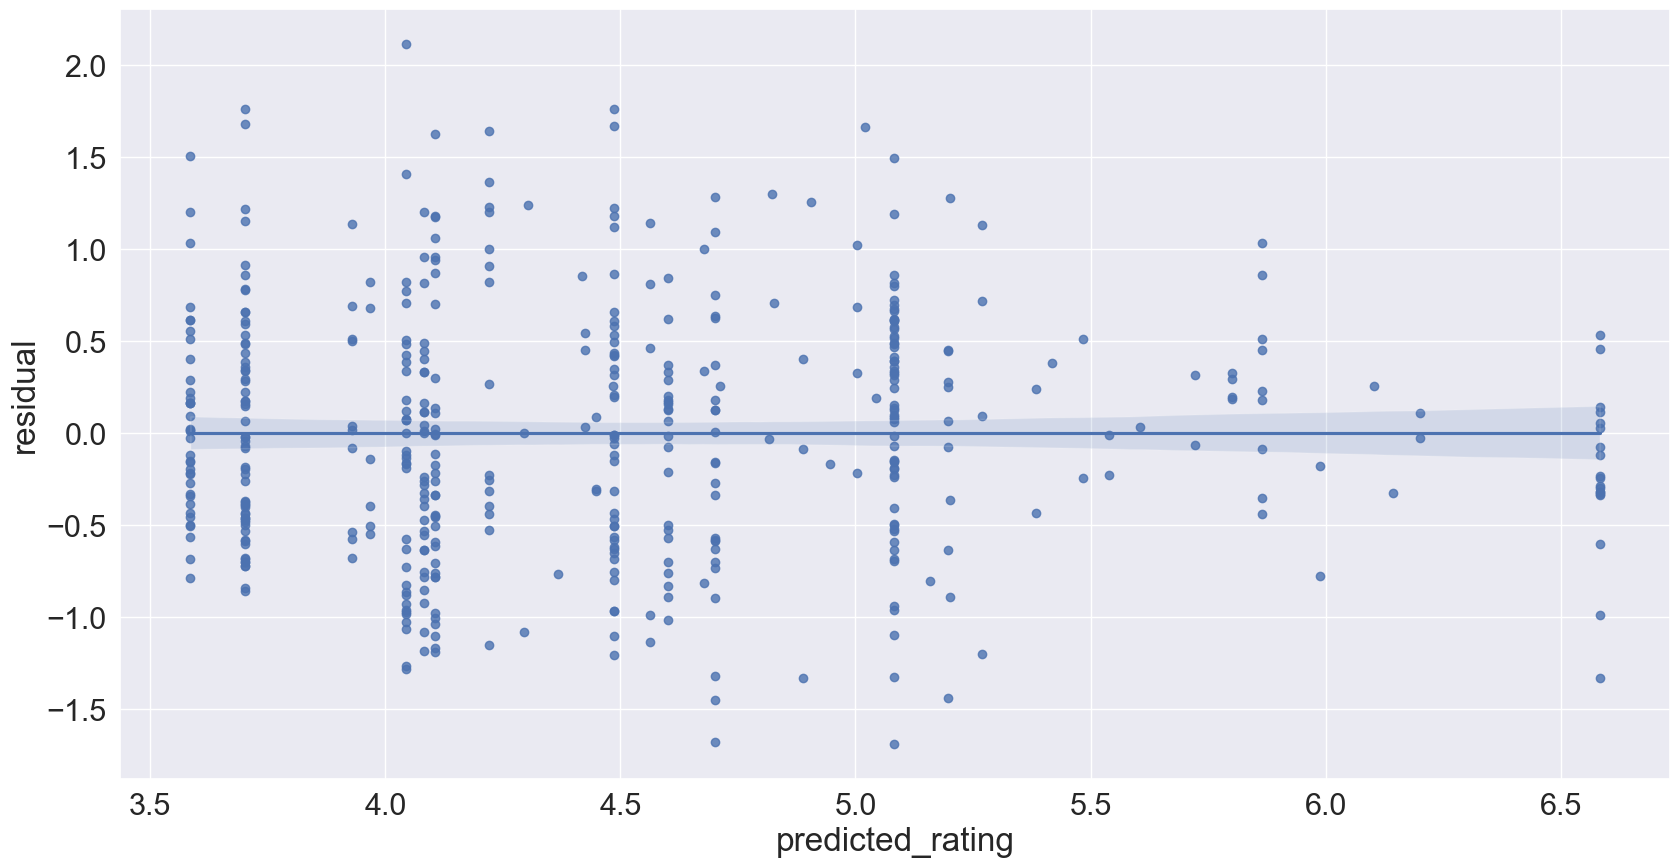

In [242]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

sns.regplot(data=df5, x='predicted_rating', y='residual')
plt.show()

In [236]:
##COMPARISON WITH REGULARIZATION

col=['credit_card_payment','toilet_facility','sell_fast_food','healty_menu','sell_coffee','contactless_deliverys_services','suitable_for_children']
X = df4[col]
y = df4['real_rating']


#Apply OLS
ols_model = sm.OLS(y, sm.add_constant(X)).fit()
ols_predictions = ols_model.predict(sm.add_constant(X))
ols_mse = mean_squared_error(y, ols_predictions)

# Apply Ridge Regression
ridge_model = Ridge(alpha=0.05)  # Adjust the value of alpha as needed
ridge_model.fit(X, y)
ridge_r2 = ridge_model.score(X, y)
ridge_predictions = ridge_model.predict(X)
ridge_mse = mean_squared_error(y, ridge_predictions)

# Apply Lasso Regression
lasso_model = Lasso(alpha=0.05)  # Adjust the value of alpha as needed
lasso_model.fit(X, y)
lasso_r2 = lasso_model.score(X, y)
lasso_predictions = lasso_model.predict(X)
lasso_mse = mean_squared_error(y, lasso_predictions)

# Display OLS results
print("OLS Regression Results:")
print("Intercept:", a_hat)
print("Coefficients:", coefficients)
print("R-squared (OLS):", ols_model.rsquared)
print("Mean Squared Error (OLS):", ols_mse)
print("\n")
print("\n")


# Display Ridge Regression results
print("Ridge Regression Results:")
print("Intercept:", ridge_model.intercept_)
print("Coefficients:", ridge_model.coef_)
print("R-squared (Ridge):", ridge_r2)
print("Mean Squared Error (Ridge):", ridge_mse)
print("\n")
print("\n")

# Display Lasso Regression results
print("Lasso Regression Results:")
print("Intercept:", lasso_model.intercept_)
print("Coefficients:", lasso_model.coef_)
print("R-squared (Lasso):", lasso_r2)
print("Mean Squared Error (Lasso):", lasso_mse)
print("\n")

OLS Regression Results:
Intercept: 4.0436
Coefficients: [0.5952, 0.5199, 0.7827, 0.7182, -0.1154, 0.3815, -0.3429]
R-squared (OLS): 0.5511743836632063
Mean Squared Error (OLS): 0.44135149054326156




Ridge Regression Results:
Intercept: 4.0433210082377125
Coefficients: [ 0.59500571  0.51966734  0.78231666  0.71748892 -0.11515381  0.38139418
 -0.34239166]
R-squared (Ridge): 0.551174253526199
Mean Squared Error (Ridge): 0.4413516185131457




Lasso Regression Results:
Intercept: 3.9295930502861274
Coefficients: [ 0.50745216  0.3538947   0.59828574  0.2312206   0.          0.2466185
 -0.        ]
R-squared (Lasso): 0.49025381163340087
Mean Squared Error (Lasso): 0.5012575749810239


